# Flight delay Analysis and Prediction


## Importing libraries

In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score


pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 70)

### Reading training dataset

In [411]:
train = pd.read_csv('TRAINDATA WEATHER AND PRECIPITATION DATA NEW')
train.drop('Unnamed: 0',axis = 1, inplace = True)
print(train.shape)
train.head()

(7861, 70)


,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime_x,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,FlightDelayStatus,WeatherStationID_Origin,AirportID_x,GroundHeight_x,StationHeight_x,BarometerHeight_x,Latitude_x,Longitude_x,TimeZone_x,AirportID_y,WeatherStationID_Destination,GroundHeight_y,StationHeight_y,BarometerHeight_y,Latitude_y,Longitude_y,TimeZone_y,TrainMonyhDay,Origin_NewWeatherStaID,Destination_NewWeatherStaID_x,WeatherStationID_x,YearMonthDay_x,Time_x,SkyConditions_x,Visibility_x,DBT_x,DewPointTemp_x,RelativeHumidityPercent_x,WindSpeed_x,WindDirection_x,WindGustValue_x,StationPressure_x,Weather_MonthDay_x,New_WeatherStationID_x,Destination_NewWeatherStaID_y,ScheduledArrTime_y,WeatherStationID_y,YearMonthDay_y,Time_y,SkyConditions_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,WindGustValue_y,StationPressure_y,Weather_MonthDay_y,New_WeatherStationID_y,Prept_New_Weatherstat_ID_x,HourlyPrecip_x,Time_x.1,Destination_NewWeatherStaID,ScheduledArrTime,Prept_New_Weatherstat_ID_y,HourlyPrecip_y,Time_y.1
0,DEN_LAS_43741,2004,1,1,4,815,902,107,DEN,LAS,629,01/01/04 09:02,2,3017,DEN,5379,5431,5382,39.5,-104.4,7,LAS,23169,2127,2180,2091,36.05,-115.10,8,101,301701010815,2316901010902,3017,20040101,853,FEW100 SCT150,10SM,37.0,12.0,36.0,6.0,170,0.0,24.55,101,301701010853,2316901010902,902,23169,20040101,856,BKN140 OVC200,10SM,47.0,24.0,41.0,11.0,170,0.0,27.86,101,2316901010856,301701010853,0.00,853,2316901010902,902,2316901010856,0.0,856
1,DEN_GJT_26718,2004,1,1,4,1115,1223,68,DEN,GJT,212,01/01/04 13:35,1,3017,DEN,5379,5431,5382,39.5,-104.4,7,GJT,23066,4823,4839,4826,39.08,-108.32,7,101,301701011115,2306601011223,3017,20040101,1153,FEW090 SCT140 BKN220,10SM,50.0,7.0,17.0,6.0,190,0.0,24.49,101,301701011153,2306601011223,1223,23066,20040101,1253,OVC095,8SM,36.0,31.0,82.0,8.0,290,0.0,25.14,101,2306601011253,301701011153,0.00,1153,2306601011223,1223,2306601011253,0.0,1253
2,DEN_MCO_42612,2004,1,1,4,1245,1802,197,DEN,MCO,1545,01/01/04 18:02,2,3017,DEN,5379,5431,5382,39.5,-104.4,7,MCO,12815,95,106,98,28.26,-81.19,5,101,301701011245,1281501011802,3017,20040101,1253,FEW090 SCT140 BKN200,10SM,50.0,8.0,18.0,8.0,100,0.0,24.45,101,301701011253,1281501011802,1802,12815,20040101,1753,FEW038,10SM,69.0,63.0,81.0,11.0,080,0.0,30.24,101,1281501011753,301701011253,0.00,1253,1281501011802,1802,1281501011753,0.0,1753
3,DEN_SLC_47047,2004,1,3,6,610,735,85,DEN,SLC,391,03/01/04 09:22,1,3017,DEN,5379,5431,5382,39.5,-104.4,7,SLC,24127,4221,4227,4224,40.47,-111.58,7,103,301701030610,2412701030735,3017,20040103,619,BKN020 BKN034 OVC049,2SM,23.0,22.0,96.0,11.0,120,0.0,24.45,103,301701030619,2412701030735,735,24127,20040103,756,BKN031 BKN044 OVC055,9SM,24.0,18.0,77.0,9.0,330,0.0,25.50,103,2412701030756,301701030653,0.01,653,2412701030735,735,2412701030756,0.0,756
4,DEN_RAP_26337,2004,1,3,6,1115,1220,65,DEN,RAP,301,03/01/04 14:49,1,3017,DEN,5379,5431,5382,39.5,-104.4,7,RAP,24090,3150,3168,3153,44.03,-103.03,7,103,301701031115,2409001031220,3017,20040103,1153,SCT009 BKN015 OVC026,1SM,24.0,20.0,84.0,14.0,140,0.0,24.40,103,301701031153,2409001031220,1220,24090,20040103,1221,FEW010 BKN014 OVC033,8SM,9.0,4.0,80.0,5.0,110,0.0,26.72,103,2409001031221,301701031153,0.01,1153,2409001031220,1220,2409001031252,0.0,1252


### Dropping irrelevant and repeated columns 


* FlightNumber has 7861 unique values.


* Year has 0% variance.


* ActualArrivalTimeStamp has 7594 unique values.


* Origin_NewWeatherStaID, Destination_NewWeatherStaID_x, Prept_New_Weatherstat_ID_x all have 7861 unique values.


* Time_x and Time_y columns are repeated. 

####  FlightNumber has 7861 unique values.

In [412]:
 train['FlightNumber'].nunique()

7861

#### Year has 0% variance 

In [413]:
train['Year'].std()

0.0

 #### ActualArrivalTimeStamp has 7594 unique values.

In [414]:
train['ActualArrivalTimeStamp'].nunique()

7594

In [415]:
columns = ['FlightNumber', 'Year', 'ActualArrivalTimeStamp', 'AirportID_x', 'AirportID_y','Origin_NewWeatherStaID',
           'Destination_NewWeatherStaID_x', 'WeatherStationID_x', 'YearMonthDay_x', 'Time_x','Weather_MonthDay_x', 
           'New_WeatherStationID_x', 'Destination_NewWeatherStaID_y', 'WeatherStationID_y', 'YearMonthDay_y','Time_y',
           'Weather_MonthDay_y', 'New_WeatherStationID_y', 'Prept_New_Weatherstat_ID_x',
           'Time_x.1', 'Destination_NewWeatherStaID', 'Time_y.1',
           'Prept_New_Weatherstat_ID_y', 'ScheduledArrTime',  'ScheduledArrTime_y' ]
train1 = train.drop(columns, axis  = 1)
print(train1.shape)
train1.head()

(7861, 45)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime_x,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,WeatherStationID_Origin,GroundHeight_x,StationHeight_x,BarometerHeight_x,Latitude_x,Longitude_x,TimeZone_x,WeatherStationID_Destination,GroundHeight_y,StationHeight_y,BarometerHeight_y,Latitude_y,Longitude_y,TimeZone_y,TrainMonyhDay,SkyConditions_x,Visibility_x,DBT_x,DewPointTemp_x,RelativeHumidityPercent_x,WindSpeed_x,WindDirection_x,WindGustValue_x,StationPressure_x,SkyConditions_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_x,HourlyPrecip_y
0,1,1,4,815,902,107,DEN,LAS,629,2,3017,5379,5431,5382,39.5,-104.4,7,23169,2127,2180,2091,36.05,-115.10,8,101,FEW100 SCT150,10SM,37.0,12.0,36.0,6.0,170,0.0,24.55,BKN140 OVC200,10SM,47.0,24.0,41.0,11.0,170,0.0,27.86,0.00,0.0
1,1,1,4,1115,1223,68,DEN,GJT,212,1,3017,5379,5431,5382,39.5,-104.4,7,23066,4823,4839,4826,39.08,-108.32,7,101,FEW090 SCT140 BKN220,10SM,50.0,7.0,17.0,6.0,190,0.0,24.49,OVC095,8SM,36.0,31.0,82.0,8.0,290,0.0,25.14,0.00,0.0
2,1,1,4,1245,1802,197,DEN,MCO,1545,2,3017,5379,5431,5382,39.5,-104.4,7,12815,95,106,98,28.26,-81.19,5,101,FEW090 SCT140 BKN200,10SM,50.0,8.0,18.0,8.0,100,0.0,24.45,FEW038,10SM,69.0,63.0,81.0,11.0,080,0.0,30.24,0.00,0.0
3,1,3,6,610,735,85,DEN,SLC,391,1,3017,5379,5431,5382,39.5,-104.4,7,24127,4221,4227,4224,40.47,-111.58,7,103,BKN020 BKN034 OVC049,2SM,23.0,22.0,96.0,11.0,120,0.0,24.45,BKN031 BKN044 OVC055,9SM,24.0,18.0,77.0,9.0,330,0.0,25.50,0.01,0.0
4,1,3,6,1115,1220,65,DEN,RAP,301,1,3017,5379,5431,5382,39.5,-104.4,7,24090,3150,3168,3153,44.03,-103.03,7,103,SCT009 BKN015 OVC026,1SM,24.0,20.0,84.0,14.0,140,0.0,24.40,FEW010 BKN014 OVC033,8SM,9.0,4.0,80.0,5.0,110,0.0,26.72,0.01,0.0


# Datatypes

#### Origin, Destination, SkyConditions, Visibility, and WindDirection belong to categorical datatypes and all the remaining are numerical.

In [416]:
train1.dtypes

Month                             int64
DayofMonth                        int64
DayOfWeek                         int64
ScheduledDepTime                  int64
ScheduledArrTime_x                int64
ScheduledTravelTime               int64
Origin                           object
Destination                      object
Distance                          int64
FlightDelayStatus                 int64
WeatherStationID_Origin           int64
GroundHeight_x                    int64
StationHeight_x                   int64
BarometerHeight_x                 int64
Latitude_x                      float64
Longitude_x                     float64
TimeZone_x                        int64
WeatherStationID_Destination      int64
GroundHeight_y                    int64
StationHeight_y                   int64
BarometerHeight_y                 int64
Latitude_y                      float64
Longitude_y                     float64
TimeZone_y                        int64
TrainMonyhDay                     int64


## Checking Null Values 

In [417]:
tr_null = train1.isnull().sum()
print('Total number of null values in the training data set :',len(tr_null[tr_null>0]))

Total number of null values in the training data set : 0


# Changing column names

* **X** as **Origin** and **y** as **Destination** 

for examaple 
 
*  **WindSpeed_x**  = **WindSpeed_Origin**


* **WindSpeed_y**   = **WindSpeed_Destination**

In [418]:
train1.columns = ['Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightDelayStatus', 'WeatherStationID_Origin',
       'GroundHeight_Origin', 'StationHeight_Origin', 'BarometerHeight_Origin', 'Latitude_Origin',
       'Longitude_Origin', 'TimeZone_Origin', 'WeatherStationID_Destination',
       'GroundHeight_Destination', 'StationHeight_Destination', 'BarometerHeight_Destination', 'Latitude_Destination',
       'Longitude_Destination', 'TimeZone_Destination', 'MonthDay', 
       'SkyConditions_Origin', 'Visibility_Origin', 'DBT_Origin', 'DewPointTemp_Origin',
       'RelativeHumidityPercent_Origin', 'WindSpeed_Origin', 'WindDirection_Origin',
       'WindGustValue_Origin', 'StationPressure_Origin', 
       'SkyConditions_Destination', 'Visibility_Destination', 'DBT_Destination', 'DewPointTemp_Destination',
       'RelativeHumidityPercent_Destination', 'WindSpeed_Destination', 'WindDirection_Destination',
       'WindGustValue_Destination', 'StationPressure_Destination', 'HourlyPrecip_Origin',
       'HourlyPrecip_Destination']

In [419]:
print(train1.shape)
train1.head()

(7861, 45)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,WeatherStationID_Origin,GroundHeight_Origin,StationHeight_Origin,BarometerHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,StationHeight_Destination,BarometerHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,MonthDay,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
0,1,1,4,815,902,107,DEN,LAS,629,2,3017,5379,5431,5382,39.5,-104.4,7,23169,2127,2180,2091,36.05,-115.10,8,101,FEW100 SCT150,10SM,37.0,12.0,36.0,6.0,170,0.0,24.55,BKN140 OVC200,10SM,47.0,24.0,41.0,11.0,170,0.0,27.86,0.00,0.0
1,1,1,4,1115,1223,68,DEN,GJT,212,1,3017,5379,5431,5382,39.5,-104.4,7,23066,4823,4839,4826,39.08,-108.32,7,101,FEW090 SCT140 BKN220,10SM,50.0,7.0,17.0,6.0,190,0.0,24.49,OVC095,8SM,36.0,31.0,82.0,8.0,290,0.0,25.14,0.00,0.0
2,1,1,4,1245,1802,197,DEN,MCO,1545,2,3017,5379,5431,5382,39.5,-104.4,7,12815,95,106,98,28.26,-81.19,5,101,FEW090 SCT140 BKN200,10SM,50.0,8.0,18.0,8.0,100,0.0,24.45,FEW038,10SM,69.0,63.0,81.0,11.0,080,0.0,30.24,0.00,0.0
3,1,3,6,610,735,85,DEN,SLC,391,1,3017,5379,5431,5382,39.5,-104.4,7,24127,4221,4227,4224,40.47,-111.58,7,103,BKN020 BKN034 OVC049,2SM,23.0,22.0,96.0,11.0,120,0.0,24.45,BKN031 BKN044 OVC055,9SM,24.0,18.0,77.0,9.0,330,0.0,25.50,0.01,0.0
4,1,3,6,1115,1220,65,DEN,RAP,301,1,3017,5379,5431,5382,39.5,-104.4,7,24090,3150,3168,3153,44.03,-103.03,7,103,SCT009 BKN015 OVC026,1SM,24.0,20.0,84.0,14.0,140,0.0,24.40,FEW010 BKN014 OVC033,8SM,9.0,4.0,80.0,5.0,110,0.0,26.72,0.01,0.0


# Test Dataset

In [420]:
#test = pd.read_csv('/content/TESTDATA WEATHER PRECIPITATION NEW')

test = pd.read_csv('TESTDATA WEATHER PRECIPITATION NEW')
test.drop('Unnamed: 0',axis = 1, inplace = True)
print(test.shape)
test.head()

(6566, 67)


,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime_x,ScheduledTravelTime,Origin,Destination,Distance,WeatherStationID_Origin,AirportID,GroundHeight_x,StationHeight_x,BarometerHeight_x,Latitude_x,Longitude_x,TimeZone_x,WeatherStationID_Destination,GroundHeight_y,StationHeight_y,BarometerHeight_y,Latitude_y,Longitude_y,TimeZone_y,TestMonyhDay,Origin_NewWeatherStaID,Destination_NewWeatherStaID_x,WeatherStationID_x,YearMonthDay_x,Time_x,SkyConditions_x,Visibility_x,DBT_x,DewPointTemp_x,RelativeHumidityPercent_x,WindSpeed_x,WindDirection_x,WindGustValue_x,StationPressure_x,Weather_MonthDay_x,New_WeatherStationID_x,Destination_NewWeatherStaID_y,ScheduledArrTime_y,WeatherStationID_y,YearMonthDay_y,Time_y,SkyConditions_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,WindGustValue_y,StationPressure_y,Weather_MonthDay_y,New_WeatherStationID_y,Prept_New_Weatherstat_ID_x,HourlyPrecip_x,Time_x.1,Destination_NewWeatherStaID,ScheduledArrTime,Prept_New_Weatherstat_ID_y,HourlyPrecip_y,Time_y.1
0,DEN_ORD_85794,2005,3,1,2,824,1144,140,DEN,ORD,888,3017,DEN,5379,5431,5382,39.5,-104.4,7,94846,655,674,658,41.59,-87.55,6,301,301703010824,9484603011144,3017,20050301,853,FEW090 SCT140 BKN250,10SM,43.0,14.0,31.0,7.0,240,0.0,24.57,301,301703010853,9484603011144,1144,94846,20050301,1156,SCT033 BKN300,10SM,25.0,12.0,58.0,15.0,320,30.0,29.12,301,9484603011156,301703010853,0.0,853,9484603011144,1144,9484603011156,0.0,1156
1,DEN_EUG_96414,2005,3,2,3,1120,1302,162,DEN,EUG,997,3017,DEN,5379,5431,5382,39.5,-104.4,7,24221,360,373,363,44.08,-123.13,8,302,301703021120,2422103021302,3017,20050302,1153,FEW065,10SM,50.0,13.0,23.0,9.0,340,15.0,24.62,302,301703021153,2422103021302,1302,24221,20050302,1254,FEW037 OVC060,10SM,58.0,43.0,58.0,8.0,190,0.0,29.71,302,2422103021254,301703021153,0.0,1153,2422103021302,1302,2422103021254,0.0,1254
2,DEN_MIA_83933,2005,3,3,4,1005,1548,223,DEN,MIA,1709,3017,DEN,5379,5431,5382,39.5,-104.4,7,12839,26,30,29,25.49,-80.18,5,303,301703031005,1283903031548,3017,20050303,1053,FEW065 SCT200,10SM,50.0,10.0,20.0,6.0,320,0.0,24.64,303,301703031053,1283903031548,1548,12839,20050303,1553,BKN095 OVC200,10SM,67.0,52.0,59.0,8.0,050,0.0,29.98,303,1283903031553,301703031053,0.0,1053,1283903031548,1548,1283903031553,0.0,1553
3,DEN_SAN_57400,2005,3,3,4,1115,1229,134,DEN,SAN,853,3017,DEN,5379,5431,5382,39.5,-104.4,7,23188,78,28,81,32.44,-117.10,8,303,301703031115,2318803031229,3017,20050303,1153,FEW065 SCT200,10SM,52.0,8.0,17.0,4.0,340,0.0,24.63,303,301703031153,2318803031229,1229,23188,20050303,1251,FEW040 BKN250,10SM,63.0,45.0,52.0,8.0,230,0.0,30.05,303,2318803031251,301703031153,0.0,1153,2318803031229,1229,2318803031251,0.0,1251
4,DEN_MSP_93389,2005,3,4,5,855,1150,115,DEN,MSP,680,3017,DEN,5379,5431,5382,39.5,-104.4,7,14922,871,838,874,44.53,-93.14,6,304,301703040855,1492203041150,3017,20050304,853,FEW070 SCT130,10SM,47.0,9.0,21.0,10.0,240,0.0,24.67,304,301703040853,1492203041150,1150,14922,20050304,1153,BKN060 BKN090 BKN150,9SM,41.0,29.0,62.0,14.0,320,0.0,28.84,304,1492203041153,301703040853,0.0,853,1492203041150,1150,1492203041153,0.0,1153


## Dropping the same columns as we dropped on the train dataset

In [421]:
columns = ['FlightNumber', 'Year', 'AirportID','Origin_NewWeatherStaID',
           'Destination_NewWeatherStaID_x', 'WeatherStationID_x', 'YearMonthDay_x', 'Time_x','Weather_MonthDay_x', 
           'New_WeatherStationID_x', 'Destination_NewWeatherStaID_y', 'WeatherStationID_y', 'YearMonthDay_y','Time_y',
           'Weather_MonthDay_y', 'New_WeatherStationID_y', 'Prept_New_Weatherstat_ID_x', 'Destination_NewWeatherStaID', 
           'Prept_New_Weatherstat_ID_y', 'ScheduledArrTime',  'ScheduledArrTime_y', 'Time_x.1', 'Time_y.1' ]
test1 = test.drop(columns, axis  = 1)
print(test1.shape)
test1.head()

(6566, 44)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime_x,ScheduledTravelTime,Origin,Destination,Distance,WeatherStationID_Origin,GroundHeight_x,StationHeight_x,BarometerHeight_x,Latitude_x,Longitude_x,TimeZone_x,WeatherStationID_Destination,GroundHeight_y,StationHeight_y,BarometerHeight_y,Latitude_y,Longitude_y,TimeZone_y,TestMonyhDay,SkyConditions_x,Visibility_x,DBT_x,DewPointTemp_x,RelativeHumidityPercent_x,WindSpeed_x,WindDirection_x,WindGustValue_x,StationPressure_x,SkyConditions_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_x,HourlyPrecip_y
0,3,1,2,824,1144,140,DEN,ORD,888,3017,5379,5431,5382,39.5,-104.4,7,94846,655,674,658,41.59,-87.55,6,301,FEW090 SCT140 BKN250,10SM,43.0,14.0,31.0,7.0,240,0.0,24.57,SCT033 BKN300,10SM,25.0,12.0,58.0,15.0,320,30.0,29.12,0.0,0.0
1,3,2,3,1120,1302,162,DEN,EUG,997,3017,5379,5431,5382,39.5,-104.4,7,24221,360,373,363,44.08,-123.13,8,302,FEW065,10SM,50.0,13.0,23.0,9.0,340,15.0,24.62,FEW037 OVC060,10SM,58.0,43.0,58.0,8.0,190,0.0,29.71,0.0,0.0
2,3,3,4,1005,1548,223,DEN,MIA,1709,3017,5379,5431,5382,39.5,-104.4,7,12839,26,30,29,25.49,-80.18,5,303,FEW065 SCT200,10SM,50.0,10.0,20.0,6.0,320,0.0,24.64,BKN095 OVC200,10SM,67.0,52.0,59.0,8.0,050,0.0,29.98,0.0,0.0
3,3,3,4,1115,1229,134,DEN,SAN,853,3017,5379,5431,5382,39.5,-104.4,7,23188,78,28,81,32.44,-117.10,8,303,FEW065 SCT200,10SM,52.0,8.0,17.0,4.0,340,0.0,24.63,FEW040 BKN250,10SM,63.0,45.0,52.0,8.0,230,0.0,30.05,0.0,0.0
4,3,4,5,855,1150,115,DEN,MSP,680,3017,5379,5431,5382,39.5,-104.4,7,14922,871,838,874,44.53,-93.14,6,304,FEW070 SCT130,10SM,47.0,9.0,21.0,10.0,240,0.0,24.67,BKN060 BKN090 BKN150,9SM,41.0,29.0,62.0,14.0,320,0.0,28.84,0.0,0.0


In [422]:
test1.columns = ['Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance','WeatherStationID_Origin','GroundHeight_Origin', 'StationHeight_Origin', 'BarometerHeight_Origin',
       'Latitude_Origin','Longitude_Origin', 'TimeZone_Origin', 'WeatherStationID_Destination',
       'GroundHeight_Destination', 'StationHeight_Destination', 'BarometerHeight_Destination', 'Latitude_Destination',
       'Longitude_Destination', 'TimeZone_Destination', 'MonthDay',
       'SkyConditions_Origin', 'Visibility_Origin', 'DBT_Origin', 'DewPointTemp_Origin',
       'RelativeHumidityPercent_Origin', 'WindSpeed_Origin', 'WindDirection_Origin',
       'WindGustValue_Origin', 'StationPressure_Origin', 
       'SkyConditions_Destination', 'Visibility_Destination', 'DBT_Destination', 'DewPointTemp_Destination',
       'RelativeHumidityPercent_Destination', 'WindSpeed_Destination', 'WindDirection_Destination',
       'WindGustValue_Destination', 'StationPressure_Destination', 'HourlyPrecip_Origin', 
       'HourlyPrecip_Destination']

In [423]:
test = test1.copy()
print(test.shape)
test.head()

(6566, 44)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,WeatherStationID_Origin,GroundHeight_Origin,StationHeight_Origin,BarometerHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,StationHeight_Destination,BarometerHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,MonthDay,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
0,3,1,2,824,1144,140,DEN,ORD,888,3017,5379,5431,5382,39.5,-104.4,7,94846,655,674,658,41.59,-87.55,6,301,FEW090 SCT140 BKN250,10SM,43.0,14.0,31.0,7.0,240,0.0,24.57,SCT033 BKN300,10SM,25.0,12.0,58.0,15.0,320,30.0,29.12,0.0,0.0
1,3,2,3,1120,1302,162,DEN,EUG,997,3017,5379,5431,5382,39.5,-104.4,7,24221,360,373,363,44.08,-123.13,8,302,FEW065,10SM,50.0,13.0,23.0,9.0,340,15.0,24.62,FEW037 OVC060,10SM,58.0,43.0,58.0,8.0,190,0.0,29.71,0.0,0.0
2,3,3,4,1005,1548,223,DEN,MIA,1709,3017,5379,5431,5382,39.5,-104.4,7,12839,26,30,29,25.49,-80.18,5,303,FEW065 SCT200,10SM,50.0,10.0,20.0,6.0,320,0.0,24.64,BKN095 OVC200,10SM,67.0,52.0,59.0,8.0,050,0.0,29.98,0.0,0.0
3,3,3,4,1115,1229,134,DEN,SAN,853,3017,5379,5431,5382,39.5,-104.4,7,23188,78,28,81,32.44,-117.10,8,303,FEW065 SCT200,10SM,52.0,8.0,17.0,4.0,340,0.0,24.63,FEW040 BKN250,10SM,63.0,45.0,52.0,8.0,230,0.0,30.05,0.0,0.0
4,3,4,5,855,1150,115,DEN,MSP,680,3017,5379,5431,5382,39.5,-104.4,7,14922,871,838,874,44.53,-93.14,6,304,FEW070 SCT130,10SM,47.0,9.0,21.0,10.0,240,0.0,24.67,BKN060 BKN090 BKN150,9SM,41.0,29.0,62.0,14.0,320,0.0,28.84,0.0,0.0


In [424]:
df = train1.copy()
print(df.shape)
df.head()

(7861, 45)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,WeatherStationID_Origin,GroundHeight_Origin,StationHeight_Origin,BarometerHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,StationHeight_Destination,BarometerHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,MonthDay,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
0,1,1,4,815,902,107,DEN,LAS,629,2,3017,5379,5431,5382,39.5,-104.4,7,23169,2127,2180,2091,36.05,-115.10,8,101,FEW100 SCT150,10SM,37.0,12.0,36.0,6.0,170,0.0,24.55,BKN140 OVC200,10SM,47.0,24.0,41.0,11.0,170,0.0,27.86,0.00,0.0
1,1,1,4,1115,1223,68,DEN,GJT,212,1,3017,5379,5431,5382,39.5,-104.4,7,23066,4823,4839,4826,39.08,-108.32,7,101,FEW090 SCT140 BKN220,10SM,50.0,7.0,17.0,6.0,190,0.0,24.49,OVC095,8SM,36.0,31.0,82.0,8.0,290,0.0,25.14,0.00,0.0
2,1,1,4,1245,1802,197,DEN,MCO,1545,2,3017,5379,5431,5382,39.5,-104.4,7,12815,95,106,98,28.26,-81.19,5,101,FEW090 SCT140 BKN200,10SM,50.0,8.0,18.0,8.0,100,0.0,24.45,FEW038,10SM,69.0,63.0,81.0,11.0,080,0.0,30.24,0.00,0.0
3,1,3,6,610,735,85,DEN,SLC,391,1,3017,5379,5431,5382,39.5,-104.4,7,24127,4221,4227,4224,40.47,-111.58,7,103,BKN020 BKN034 OVC049,2SM,23.0,22.0,96.0,11.0,120,0.0,24.45,BKN031 BKN044 OVC055,9SM,24.0,18.0,77.0,9.0,330,0.0,25.50,0.01,0.0
4,1,3,6,1115,1220,65,DEN,RAP,301,1,3017,5379,5431,5382,39.5,-104.4,7,24090,3150,3168,3153,44.03,-103.03,7,103,SCT009 BKN015 OVC026,1SM,24.0,20.0,84.0,14.0,140,0.0,24.40,FEW010 BKN014 OVC033,8SM,9.0,4.0,80.0,5.0,110,0.0,26.72,0.01,0.0


## Description of the data 

* Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

###  Right skewed: The mean is greater than the median. 

* The mean overestimates the most common values in a positively skewed distribution.

   
   * ScheduledTravelTime
   
   * Distance
   
   * StationHeight_Origin
   
   * GroundHeight_Destination
   
   * StationHeight_Destination
   
   * BarometerHeight_Destination
   
   
### Left skewed: The mean is less than the median. 

*  The mean underestimates the most common values in a negatively skewed distribution.


   * DewPointTemp_Origin
   
   * RelativeHumidityPercent_Origin
   
   * DBT_Destination
   
   * DewPointTemp_Destination
   


In [425]:
df.describe()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance,FlightDelayStatus,WeatherStationID_Origin,GroundHeight_Origin,StationHeight_Origin,BarometerHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,StationHeight_Destination,BarometerHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,MonthDay,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindGustValue_Origin,StationPressure_Origin,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
count,7861.00000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,7.12085,15.441292,3.960946,1198.225417,1412.232922,129.623839,743.764025,1.806768,29694.178730,807.426409,814.286223,813.319807,36.931773,-92.065419,5.931434,30346.915405,834.865920,843.882076,840.098461,36.687598,-92.156701,5.929144,727.526269,67.398168,52.514566,63.771785,8.325786,2.930798,29.187662,68.744943,52.715431,61.494594,8.301488,2.774838,29.152516,0.015859,0.008697
std,2.82233,9.049019,1.980921,354.923067,369.739052,63.272072,522.629372,0.394859,31350.978593,1189.453726,1199.343863,1186.735634,5.290656,15.724649,1.094402,31699.932666,1202.390869,1212.530498,1199.485756,5.290329,16.075175,1.124305,283.177647,15.610909,15.450280,21.789143,4.784260,7.670275,1.216134,15.228487,15.355178,21.339736,4.663068,7.444891,1.227459,0.088336,0.058228
min,1.00000,1.000000,1.000000,215.000000,553.000000,61.000000,69.000000,1.000000,3017.000000,0.000000,0.000000,0.000000,17.420000,-157.560000,4.000000,3017.000000,0.000000,0.000000,0.000000,18.200000,-162.360000,4.000000,101.000000,6.000000,-4.000000,4.000000,0.000000,0.000000,23.640000,-21.000000,-27.000000,4.000000,0.000000,0.000000,23.690000,0.000000,0.000000
25%,5.00000,7.000000,2.000000,900.000000,1111.000000,83.000000,368.000000,2.000000,13739.000000,87.000000,65.000000,98.000000,33.380000,-98.280000,5.000000,13739.000000,87.000000,65.000000,98.000000,33.380000,-100.290000,5.000000,514.000000,58.000000,42.000000,49.000000,5.000000,0.000000,29.060000,59.000000,43.000000,47.000000,5.000000,0.000000,29.040000,0.000000,0.000000
50%,7.00000,15.000000,4.000000,1215.000000,1430.000000,112.000000,595.000000,2.000000,14739.000000,559.000000,596.000000,562.000000,37.430000,-87.540000,6.000000,14739.000000,559.000000,596.000000,562.000000,37.370000,-87.450000,6.000000,718.000000,70.000000,56.000000,65.000000,8.000000,0.000000,29.480000,71.000000,56.000000,63.000000,8.000000,0.000000,29.440000,0.000000,0.000000
75%,9.00000,23.000000,6.000000,1518.000000,1728.000000,155.000000,951.000000,2.000000,23293.000000,882.000000,883.000000,885.000000,40.470000,-80.560000,6.000000,23293.000000,901.000000,899.000000,904.000000,40.470000,-81.040000,6.000000,924.000000,79.000000,65.000000,81.000000,11.000000,0.000000,29.890000,80.000000,65.000000,78.000000,11.000000,0.000000,29.870000,0.000000,0.000000
max,11.00000,31.000000,7.000000,1800.000000,2300.000000,562.000000,4962.000000,2.000000,94860.000000,6674.000000,6685.000000,6677.000000,64.490000,-64.480000,10.000000,94860.000000,6180.000000,6535.000000,6183.000000,71.170000,-64.580000,10.000000,1130.000000,109.000000,80.000000,100.000000,45.000000,62.000000,30.810000,108.000000,79.000000,100.000000,39.000000,68.000000,30.850000,1.780000,1.780000


## Correlation

* Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.


* Correlation is a statistical method used to assess a possible linear association between two continuous variables.

### Highly Correlated features are listed below. (above 90%)

* ScheduledArrTime : ScheduledDepTime : 0.9288288743953684
        
        
* Distance : ScheduledTravelTime : 0.9841159873433635
        
        
* StationHeight_Origin : GroundHeight_Origin : 0.9975438900891671
        
        
* BarometerHeight_Origin : GroundHeight_Origin : 0.9993068011783427
        
        
* BarometerHeight_Origin : StationHeight_Origin : 0.9969820240085437
        
        
* StationHeight_Destination : GroundHeight_Destination : 0.9975219262283443
        
        
* BarometerHeight_Destination : GroundHeight_Destination : 0.9993889131908203


* BarometerHeight_Destination : StationHeight_Destination : 0.9970300052837952


* MonthDay : Month : 0.999499609152752

In [426]:
df.corr()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance,FlightDelayStatus,WeatherStationID_Origin,GroundHeight_Origin,StationHeight_Origin,BarometerHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,StationHeight_Destination,BarometerHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,MonthDay,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindGustValue_Origin,StationPressure_Origin,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
Month,1.000000,0.088537,-0.082216,-0.017100,-0.026640,-0.033815,-0.034575,-0.050281,0.066205,0.011215,0.010152,0.011284,0.011844,0.032033,-0.034718,0.108840,-0.015709,-0.015750,-0.015721,0.049285,0.034904,-0.026570,0.999493,-0.036593,0.001982,0.049898,-0.121542,-0.066530,0.001097,-0.067236,-0.000856,0.073103,-0.132386,-0.075603,0.026926,0.009846,0.019229
DayofMonth,0.088537,1.000000,-0.029615,-0.011317,-0.006508,-0.002715,-0.003778,-0.033566,0.000735,0.008498,0.007383,0.008262,0.000207,0.012915,-0.012052,-0.006377,0.001289,0.001938,0.001438,-0.002538,0.018411,-0.018748,0.120197,-0.001224,0.049487,0.060503,-0.009684,0.000644,-0.024137,0.015529,0.047533,0.043266,-0.031903,-0.014966,-0.016259,0.018392,0.023221
DayOfWeek,-0.082216,-0.029615,1.000000,0.003546,0.011408,0.032836,0.034860,0.024834,0.041824,0.015495,0.015859,0.015207,0.013517,-0.008087,0.007274,0.041029,0.020516,0.020427,0.020358,0.028076,-0.000274,0.005155,-0.082888,0.000437,0.008081,-0.001111,0.053456,0.038741,-0.015783,-0.004539,-0.005761,-0.011124,0.058076,0.041477,-0.018563,-0.014702,-0.016964
ScheduledDepTime,-0.017100,-0.011317,0.003546,1.000000,0.928916,-0.048108,-0.063890,-0.061573,0.002393,0.007126,0.008776,0.006806,-0.046143,0.063224,-0.083984,-0.000853,-0.029482,-0.029729,-0.028808,0.008526,0.031358,-0.024827,-0.017405,0.212272,0.039682,-0.238937,0.198658,0.089736,-0.033749,0.023264,0.018144,0.006784,0.009180,-0.011461,0.009350,0.068777,0.053660
ScheduledArrTime,-0.026640,-0.006508,0.011408,0.928916,1.000000,0.180846,0.185344,-0.038174,-0.010223,0.003694,0.004980,0.003169,-0.049003,-0.056067,0.054293,0.002583,-0.070020,-0.070207,-0.069024,-0.008462,0.091125,-0.092208,-0.026759,0.204473,0.013354,-0.254310,0.195783,0.086495,-0.031384,0.025841,0.045671,0.029918,0.017463,-0.011218,0.051332,0.062864,0.056350
ScheduledTravelTime,-0.033815,-0.002715,0.032836,-0.048108,0.180846,1.000000,0.984547,0.057751,-0.005347,-0.106179,-0.106174,-0.105479,-0.021474,-0.058213,0.089778,-0.043523,-0.061368,-0.062844,-0.061672,-0.106472,-0.206980,0.221891,-0.033789,-0.012868,0.001408,0.014810,0.046543,0.029098,0.107365,0.043612,0.014971,-0.031032,0.039292,0.010195,0.057852,0.013053,-0.014478
Distance,-0.034575,-0.003778,0.034860,-0.063890,0.185344,0.984547,1.000000,0.070790,-0.015274,-0.069631,-0.070041,-0.069380,-0.040129,-0.152227,0.175605,-0.051738,-0.054331,-0.056099,-0.054464,-0.106031,-0.202225,0.218141,-0.034581,0.001129,-0.001674,-0.002276,0.040733,0.024492,0.068980,0.045147,0.011937,-0.037378,0.039355,0.012918,0.050951,0.008788,-0.016006
FlightDelayStatus,-0.050281,-0.033566,0.024834,-0.061573,-0.038174,0.057751,0.070790,1.000000,-0.051145,0.040676,0.038960,0.040142,-0.037797,-0.143323,0.152167,-0.052069,0.048032,0.047904,0.047618,-0.020940,-0.129740,0.129928,-0.051186,0.130791,-0.088410,-0.319790,-0.020819,-0.034325,-0.019983,0.108257,-0.090298,-0.289246,0.041110,0.016272,-0.033920,-0.156404,-0.082387
WeatherStationID_Origin,0.066205,0.000735,0.041824,0.002393,-0.010223,-0.005347,-0.015274,-0.051145,1.000000,-0.071546,-0.070925,-0.072986,0.298639,0.093860,-0.079149,-0.006391,-0.034775,-0.035948,-0.034757,0.041271,0.047409,-0.035436,0.066008,-0.053550,-0.010473,0.051893,-0.062773,-0.028373,0.064482,0.036087,0.053110,0.024100,-0.008654,-0.

## Number of unique values in the column.

In [427]:
for cols in df.columns :
    print(cols, df[cols].nunique())

Month 6
DayofMonth 31
DayOfWeek 7
ScheduledDepTime 681
ScheduledArrTime 912
ScheduledTravelTime 324
Origin 223
Destination 215
Distance 984
FlightDelayStatus 2
WeatherStationID_Origin 223
GroundHeight_Origin 199
StationHeight_Origin 187
BarometerHeight_Origin 198
Latitude_Origin 201
Longitude_Origin 211
TimeZone_Origin 7
WeatherStationID_Destination 215
GroundHeight_Destination 193
StationHeight_Destination 183
BarometerHeight_Destination 193
Latitude_Destination 197
Longitude_Destination 205
TimeZone_Destination 7
MonthDay 157
SkyConditions_Origin 3541
Visibility_Origin 20
DBT_Origin 98
DewPointTemp_Origin 82
RelativeHumidityPercent_Origin 93
WindSpeed_Origin 32
WindDirection_Origin 38
WindGustValue_Origin 33
StationPressure_Origin 517
SkyConditions_Destination 3484
Visibility_Destination 20
DBT_Destination 102
DewPointTemp_Destination 83
RelativeHumidityPercent_Destination 94
WindSpeed_Destination 31
WindDirection_Destination 38
WindGustValue_Destination 33
StationPressure_Destinatio

## Target Variable Countplot

### Dataset is **imbalanced** 


* most of the Flight Delay status are **not delayed** (class 2 = 6342) and a very few classes are **delayed** (class 1 = 1519).

C:\Users\pramod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


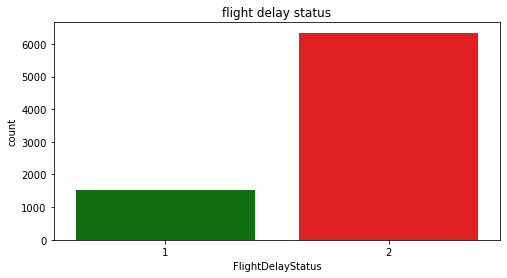

In [431]:
plt.figure(figsize = (8,4))
sns.countplot(df['FlightDelayStatus'], palette= ['green','red'])
plt.title('flight delay status')
plt.ylabel('count')
plt.show()

In [429]:
df['FlightDelayStatus'].value_counts()

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64

In [21]:
df['FlightDelayStatus'].value_counts(normalize= True)*100

2    80.676759
1    19.323241
Name: FlightDelayStatus, dtype: float64

# Categorical_features

In [22]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Total numbers of categorical columns : ', len(categorical_feature))
print(categorical_feature)

Total numbers of categorical columns :  8
['Origin', 'Destination', 'SkyConditions_Origin', 'Visibility_Origin', 'WindDirection_Origin', 'SkyConditions_Destination', 'Visibility_Destination', 'WindDirection_Destination']


# Numerical_features

In [23]:
numerical_feature = [feature for feature in df.columns if feature not in categorical_feature]
print('Total numbers of numerical columns : ', len(numerical_feature))

print(numerical_feature)

Total numbers of numerical columns :  37
['Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Distance', 'FlightDelayStatus', 'WeatherStationID_Origin', 'GroundHeight_Origin', 'StationHeight_Origin', 'BarometerHeight_Origin', 'Latitude_Origin', 'Longitude_Origin', 'TimeZone_Origin', 'WeatherStationID_Destination', 'GroundHeight_Destination', 'StationHeight_Destination', 'BarometerHeight_Destination', 'Latitude_Destination', 'Longitude_Destination', 'TimeZone_Destination', 'MonthDay', 'DBT_Origin', 'DewPointTemp_Origin', 'RelativeHumidityPercent_Origin', 'WindSpeed_Origin', 'WindGustValue_Origin', 'StationPressure_Origin', 'DBT_Destination', 'DewPointTemp_Destination', 'RelativeHumidityPercent_Destination', 'WindSpeed_Destination', 'WindGustValue_Destination', 'StationPressure_Destination', 'HourlyPrecip_Origin', 'HourlyPrecip_Destination']


## Discrete_features

* Discrete features are discontinuous and have definite feature boundaries.


* Discrete data includes discrete variables that are finite, numeric, countable, and non-negative integers (5, 10, 15, and so on).


* Discrete data can be easily visualized and demonstrated using simple statistical methods such as bar charts, line charts, or pie charts.

In [24]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<=31 and feature not in ['FlightDelayStatus','WindSpeed_Destination']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 5
['Month', 'DayofMonth', 'DayOfWeek', 'TimeZone_Origin', 'TimeZone_Destination']


In [25]:
df[discrete_feature].head()

,Month,DayofMonth,DayOfWeek,TimeZone_Origin,TimeZone_Destination
0,1,1,4,7,8
1,1,1,4,7,7
2,1,1,4,7,5
3,1,3,6,7,7
4,1,3,6,7,7


## Continuous_features

* Continuous data is a type of numerical data that refers to the unspecified number of possible measurements between two realistic points.


* Continuous data changes over time and can have different values at different time intervals.


* Continuous data is made up of random variables, which may or may not be whole numbers.

In [26]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+[ 'WeatherStationID_Origin',
                            'WeatherStationID_Destination','FlightDelayStatus','MonthDay']]
print("Continuous features Count {}".format(len(continuous_feature)))
print()
print(continuous_feature)

Continuous features Count 28

['ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Distance', 'GroundHeight_Origin', 'StationHeight_Origin', 'BarometerHeight_Origin', 'Latitude_Origin', 'Longitude_Origin', 'GroundHeight_Destination', 'StationHeight_Destination', 'BarometerHeight_Destination', 'Latitude_Destination', 'Longitude_Destination', 'DBT_Origin', 'DewPointTemp_Origin', 'RelativeHumidityPercent_Origin', 'WindSpeed_Origin', 'WindGustValue_Origin', 'StationPressure_Origin', 'DBT_Destination', 'DewPointTemp_Destination', 'RelativeHumidityPercent_Destination', 'WindSpeed_Destination', 'WindGustValue_Destination', 'StationPressure_Destination', 'HourlyPrecip_Origin', 'HourlyPrecip_Destination']


In [27]:
for col in categorical_feature:
    print(col, df[col].nunique())
    print()

Origin 223

Destination 215

SkyConditions_Origin 3541

Visibility_Origin 20

WindDirection_Origin 38

SkyConditions_Destination 3484

Visibility_Destination 20

WindDirection_Destination 38



## Countplot

* ***Month*** : Number of flights are traveled less in the month of **January** and more in **May , July , September and November**.


* ***Visibility*** : Most of the time, **10SM visibility** is present compared to others in both the **origin and destination** of the flights**.
     
   
* ***WindDirection*** : **Zero and VRB** windDirection apprears most of the time.

    -> a wind blowing from the **north** has a wind direction referred to as **0° (360°)** (wind is calm)
    
    -> a wind blowing from the **east** has a wind direction referred to as **90°**
    
      
* **Variable (VRB) winds** (variations in wind direction **greater than or equal to 30 degrees**) may be forecast when a mean direction is impossible to predict such as the case with light and variable winds or **winds associated with a thunderstorm.**

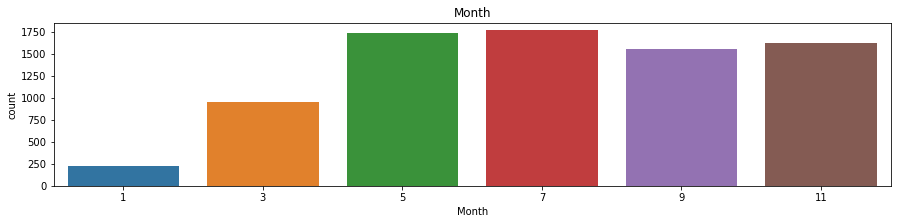

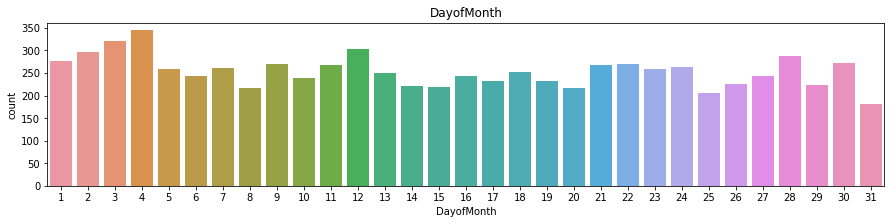

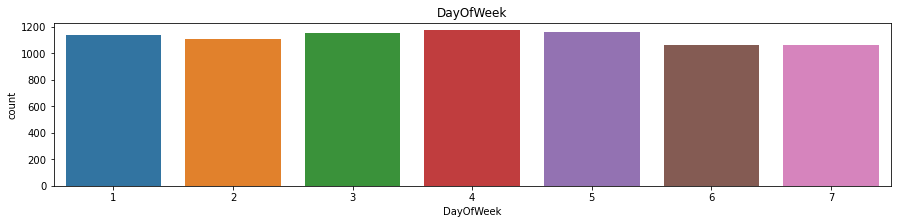

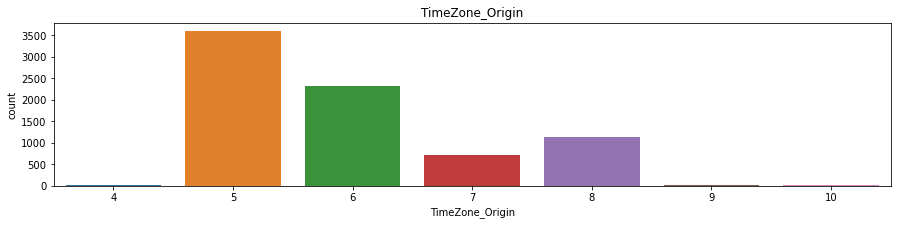

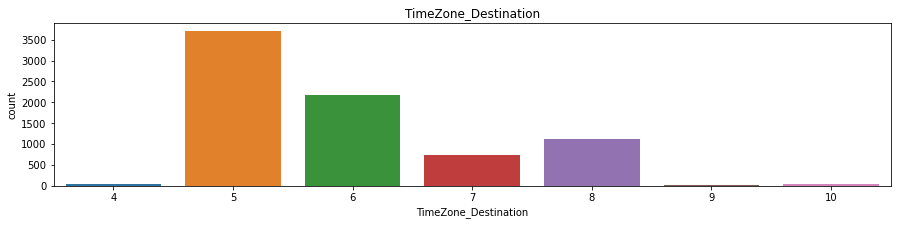

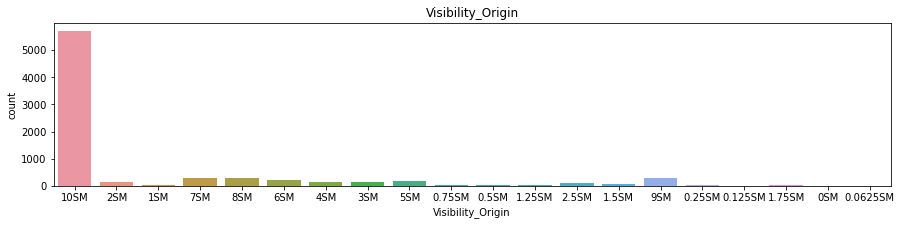

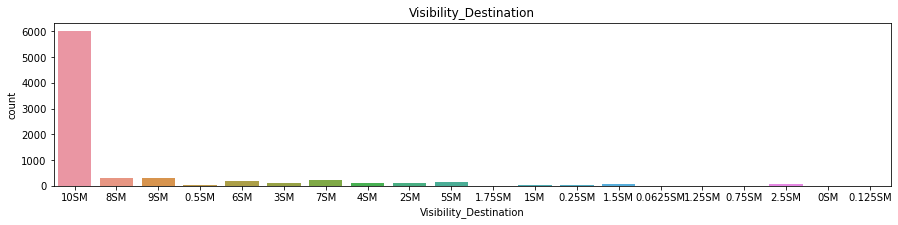

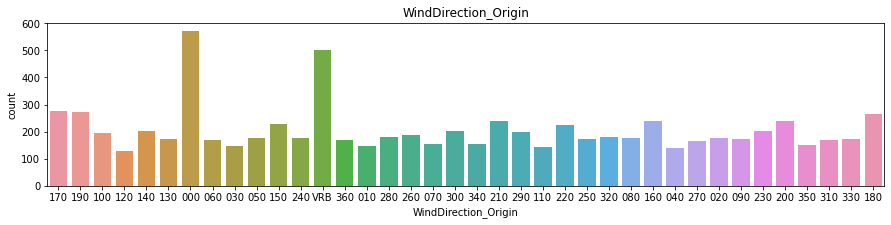

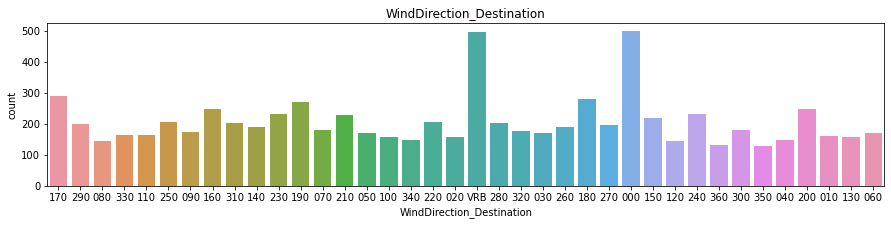

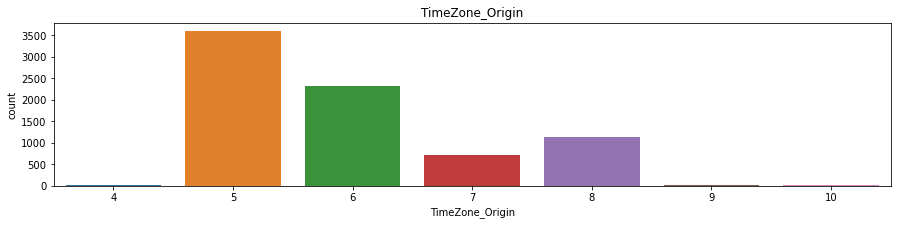

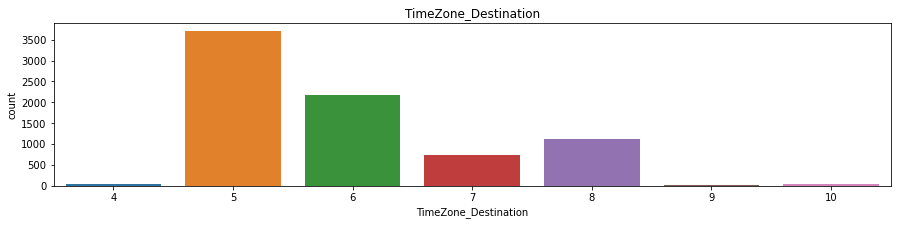

In [28]:
cat_var = discrete_feature+['Visibility_Origin','Visibility_Destination', 'WindDirection_Origin', 'WindDirection_Destination',
                            'TimeZone_Origin', 'TimeZone_Destination']
for col in cat_var :
    data = df.copy()
    plt.figure(figsize = (15,3)) # adjusting the figuresize
    sns.countplot(x = col, data = data)  # countplot for dicrete and categorical variables 
    plt.title(col)
    plt.ylabel('count')
    plt.show()

## Histplot

* A histogram is a classic visualization tool that represents the distribution
  of one or more variables by counting the number of observations that fall within
  disrete bins.


* **stat** : str
    Aggregate statistic to compute in each bin.
    
    **count** : show the number of observations in each bin
    
    **frequency** : show the number of observations divided by the bin width
    
    **probability** : or **proportion** : normalize such that bar heights sum to 1
    
    **percent** : normalize such that bar heights sum to 100

* ***Month*** : From the graph, we can see that most of the flights are delayed in **November**. Compared to other months.


* ***Visibility*** : For **10SM visibility** numbers of flights delayed are less and for less than **0SM visibility** number of Flights are delayed more (0.55SM, 0.0625SM)


-> minimum visibility for takeoff and landing :   **1 statute mile visibility** 

 

                     

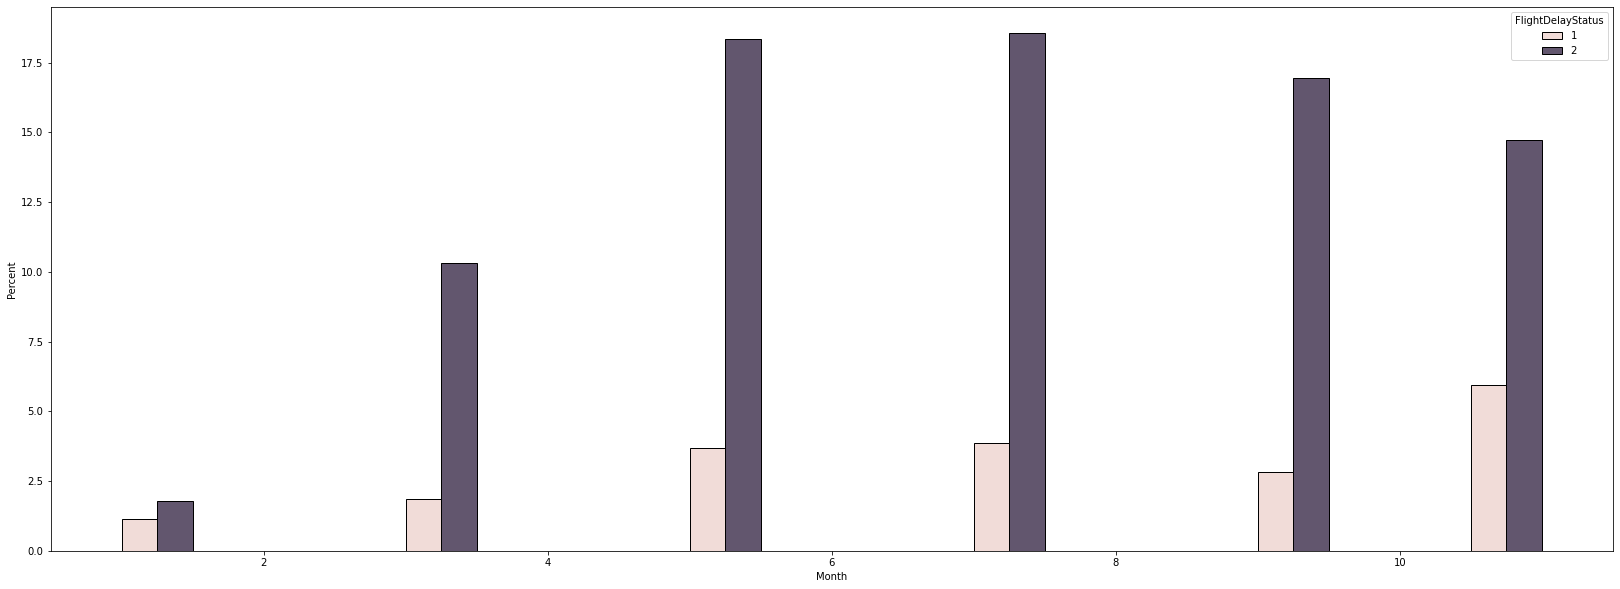

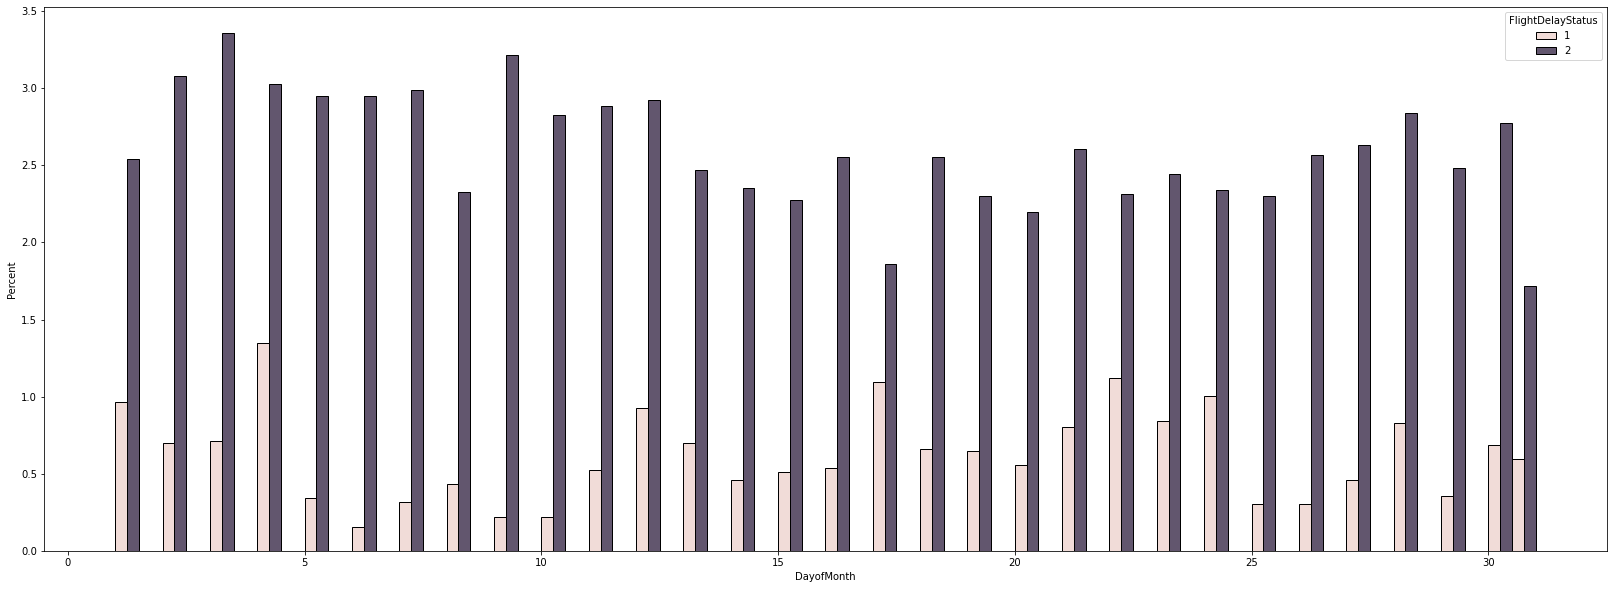

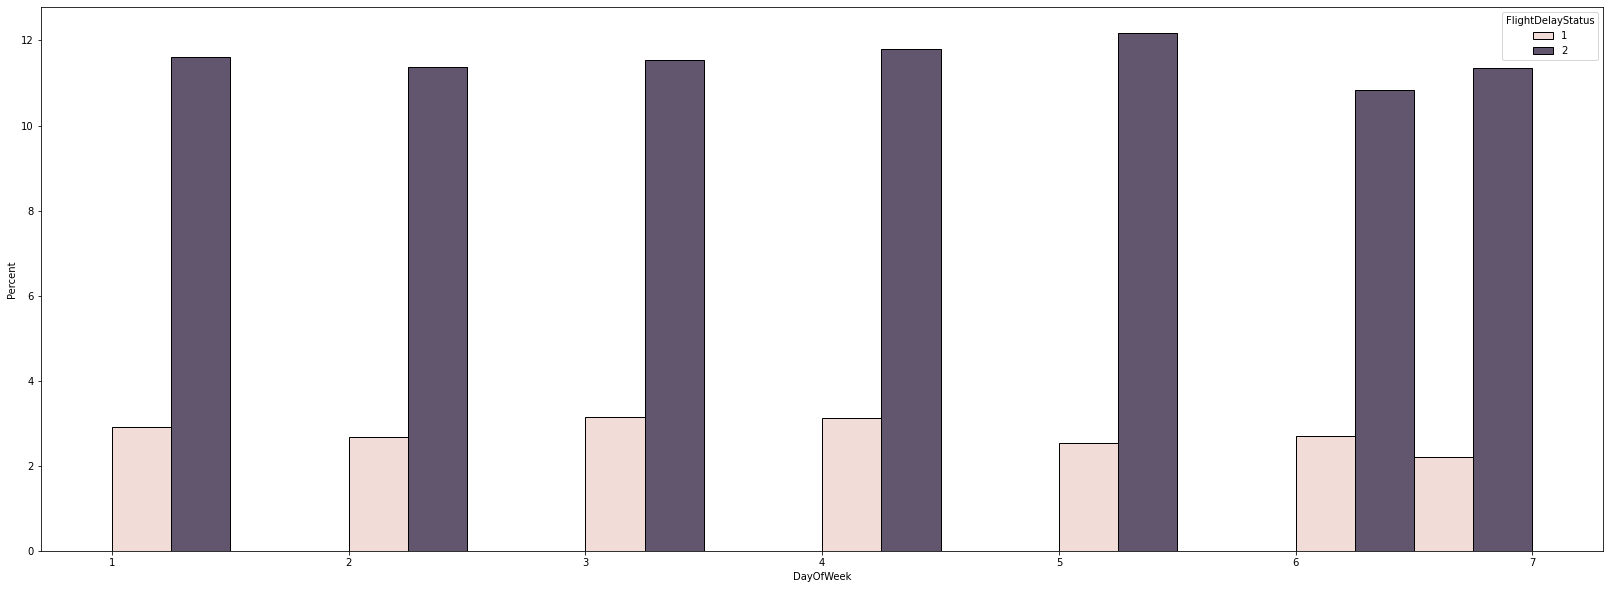

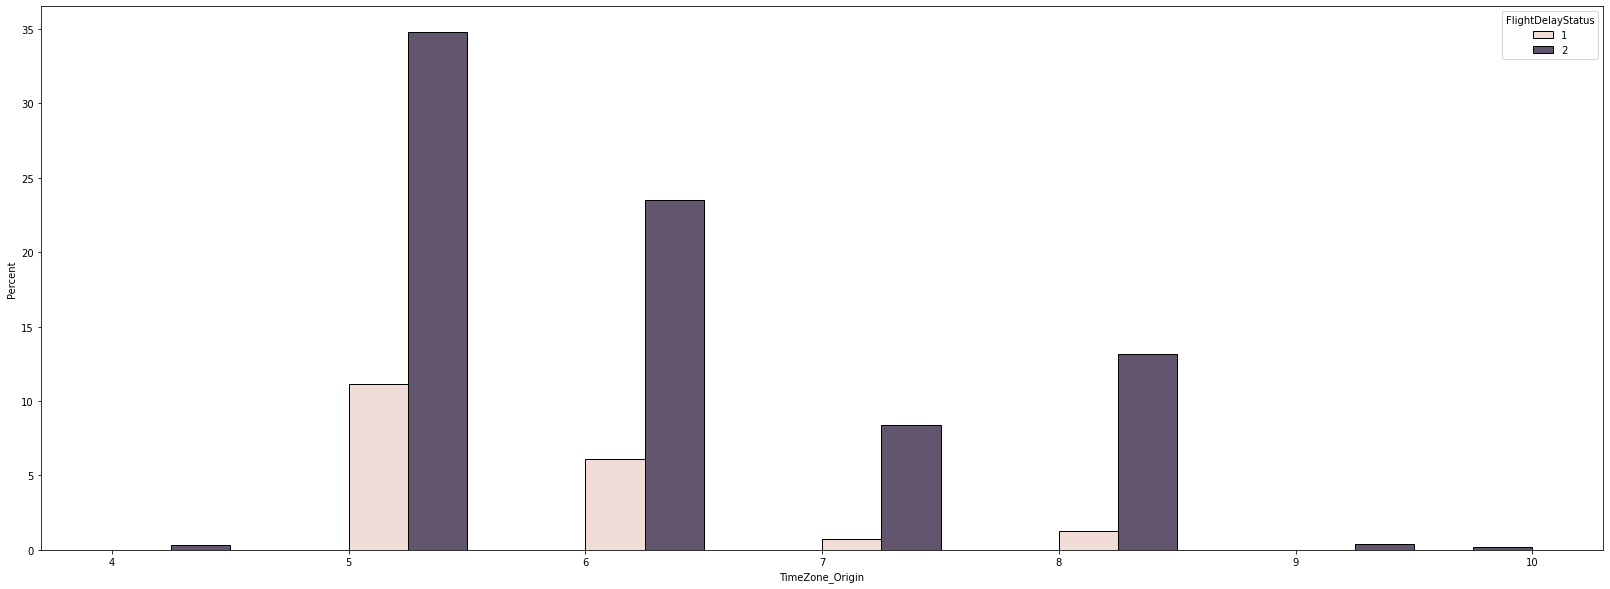

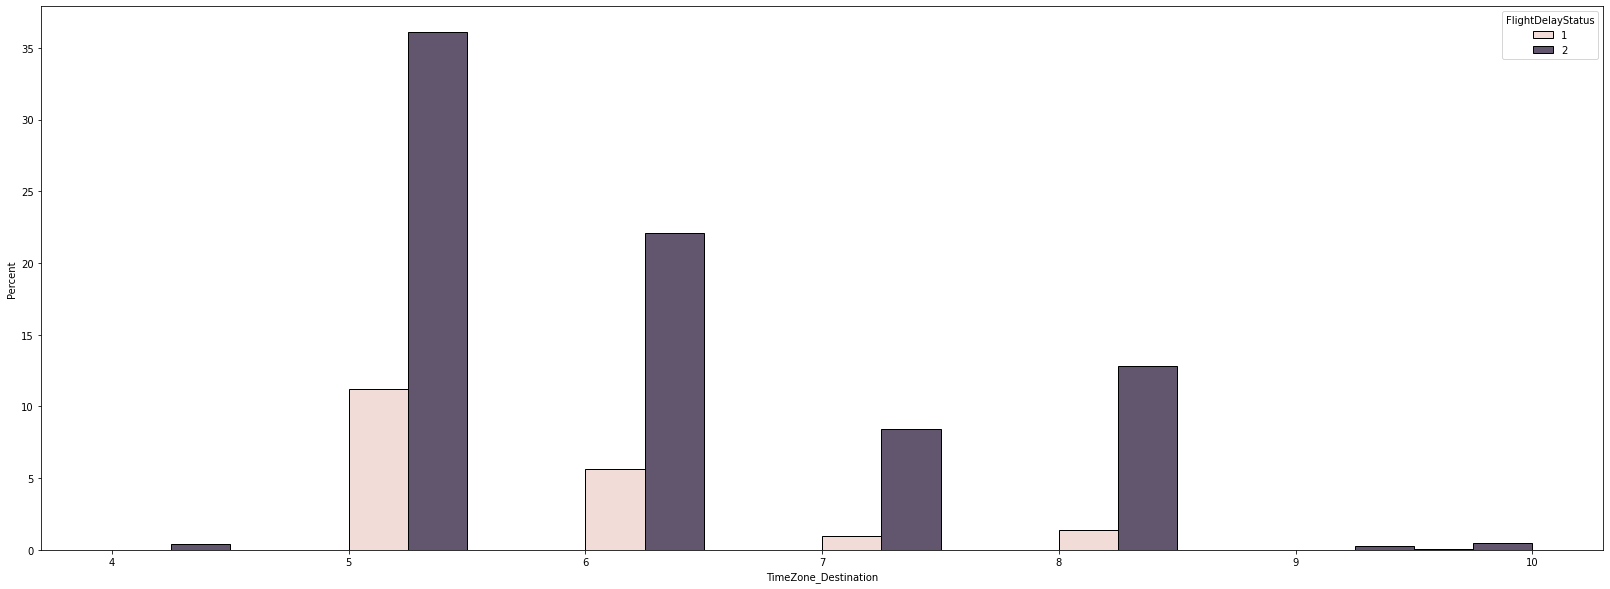

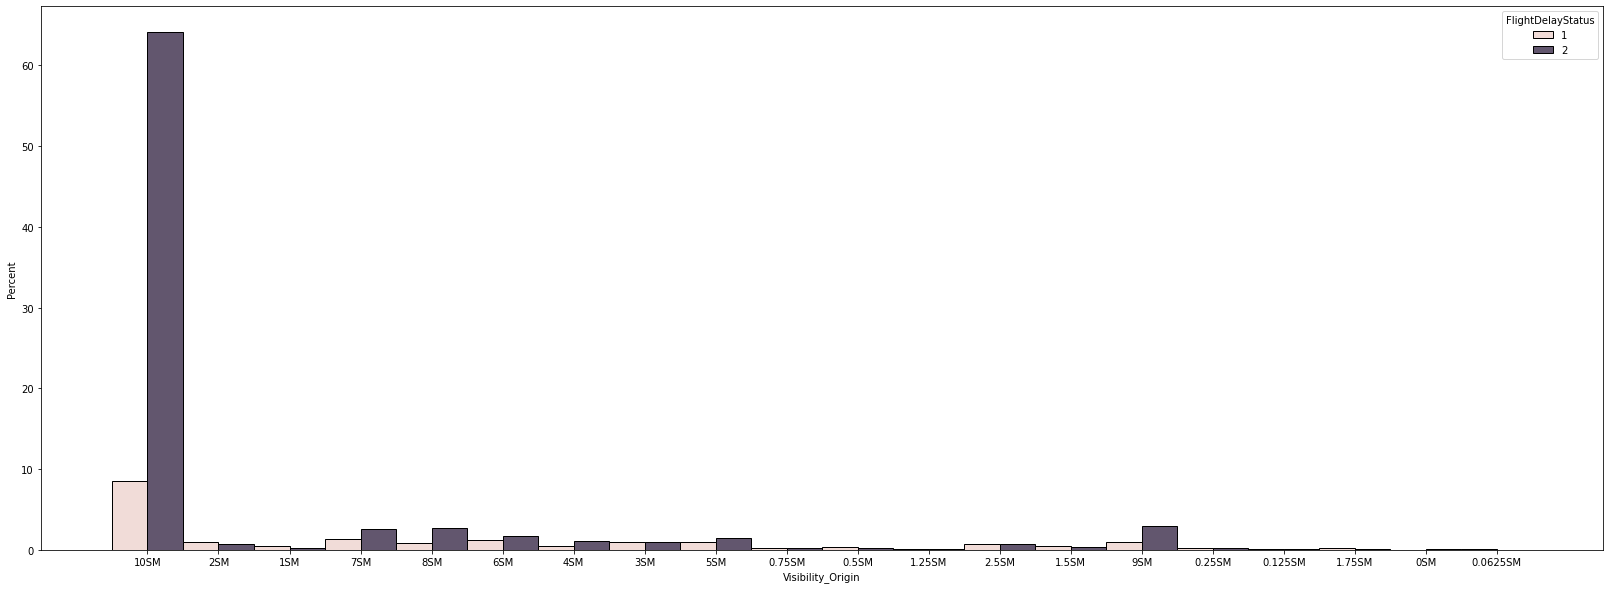

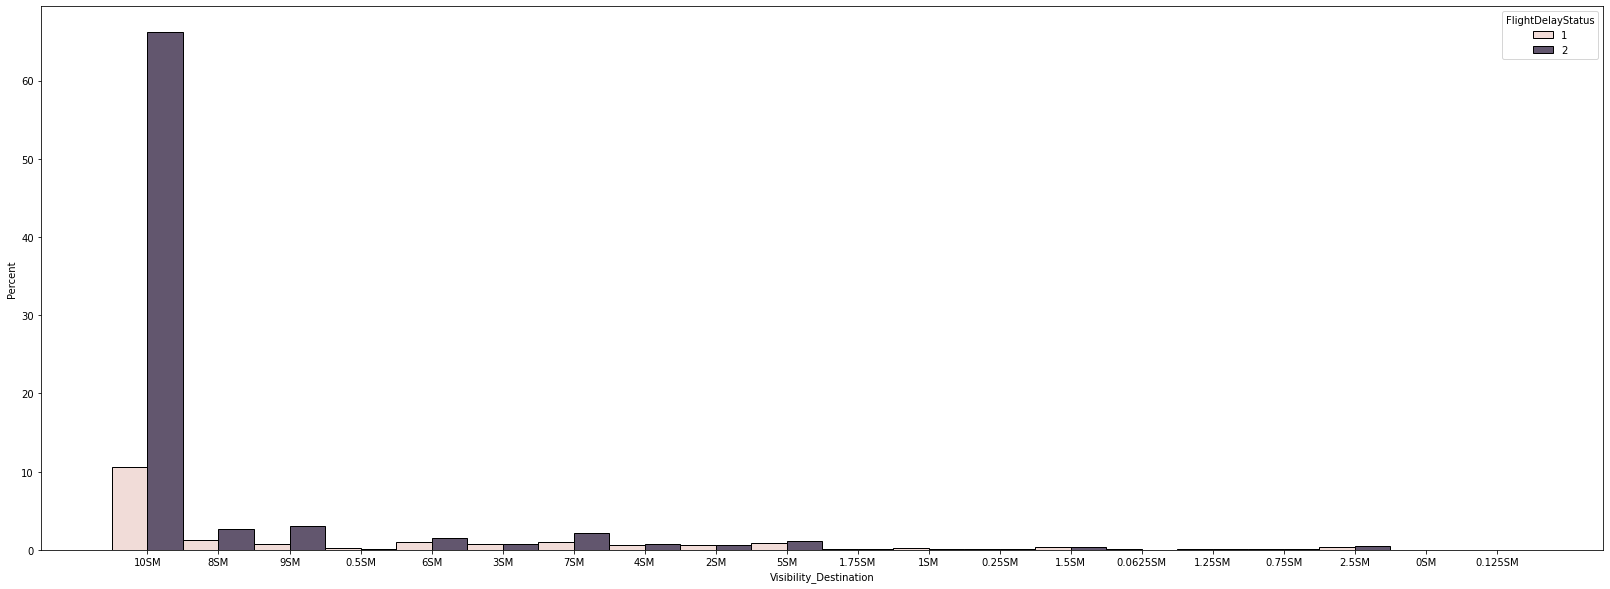

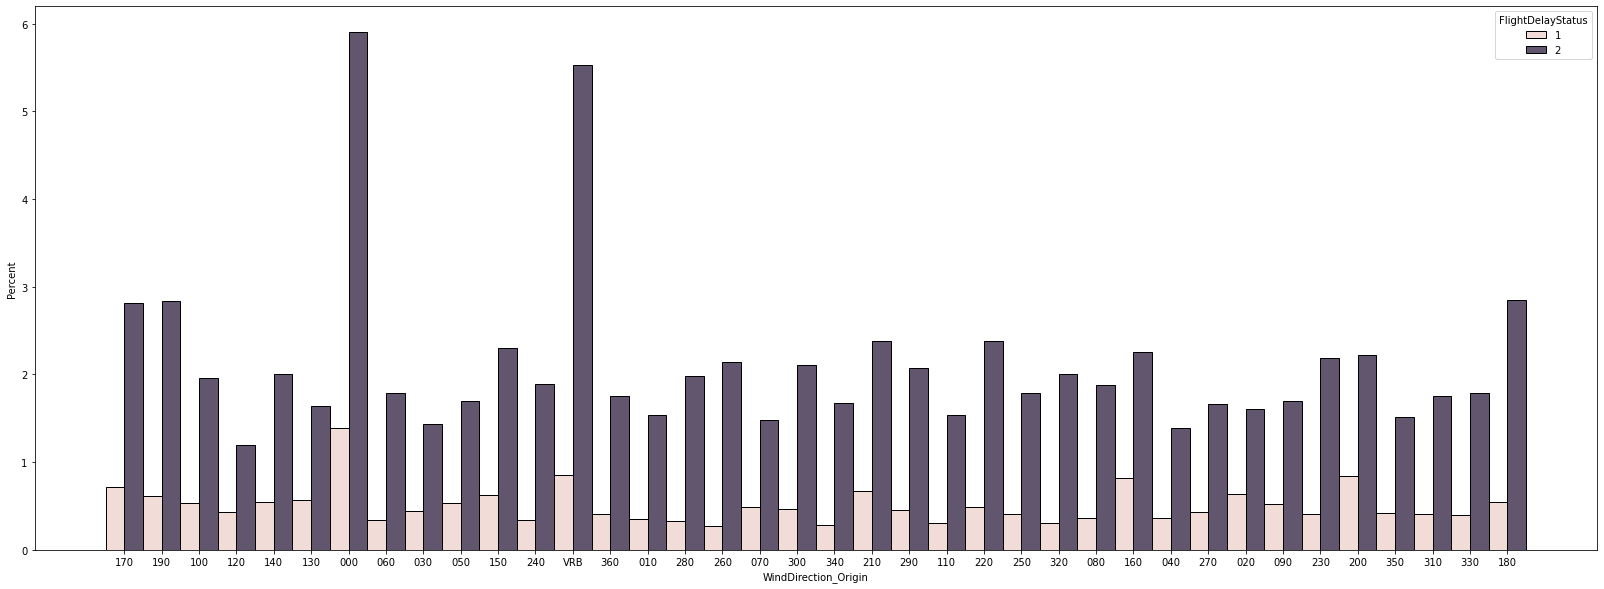

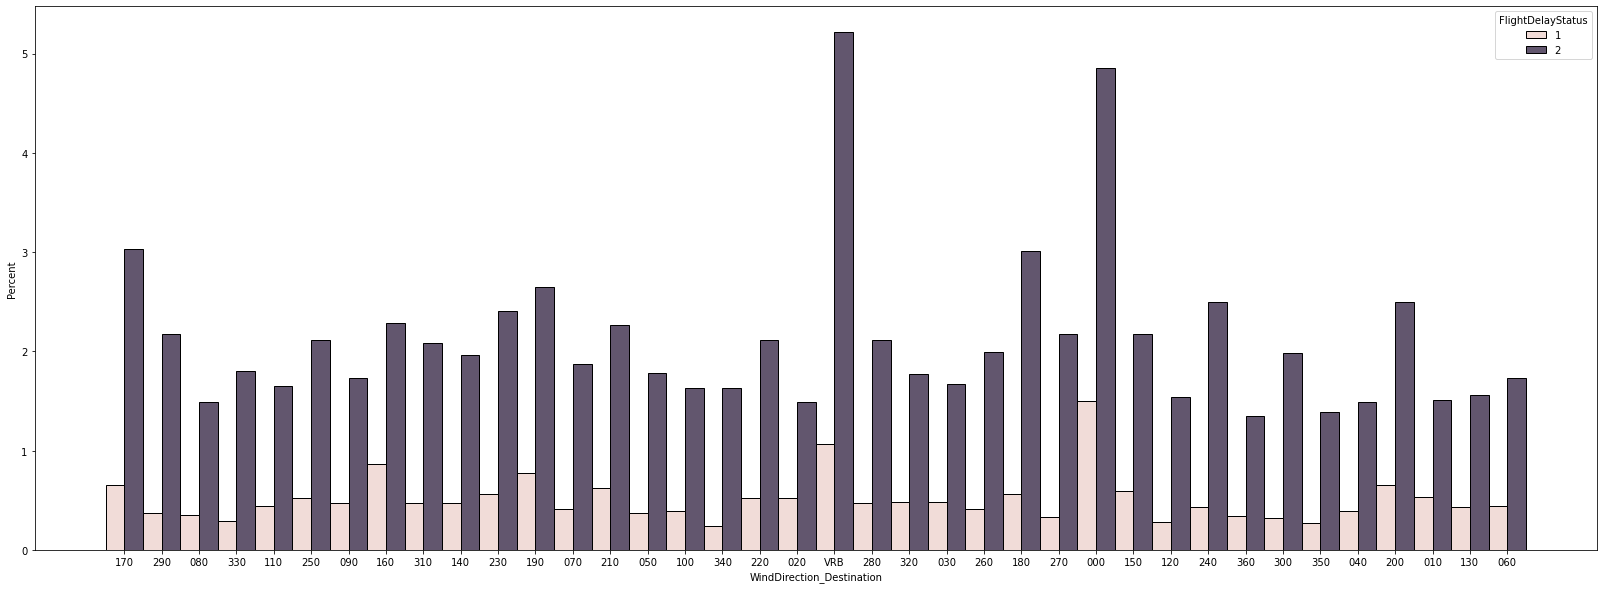

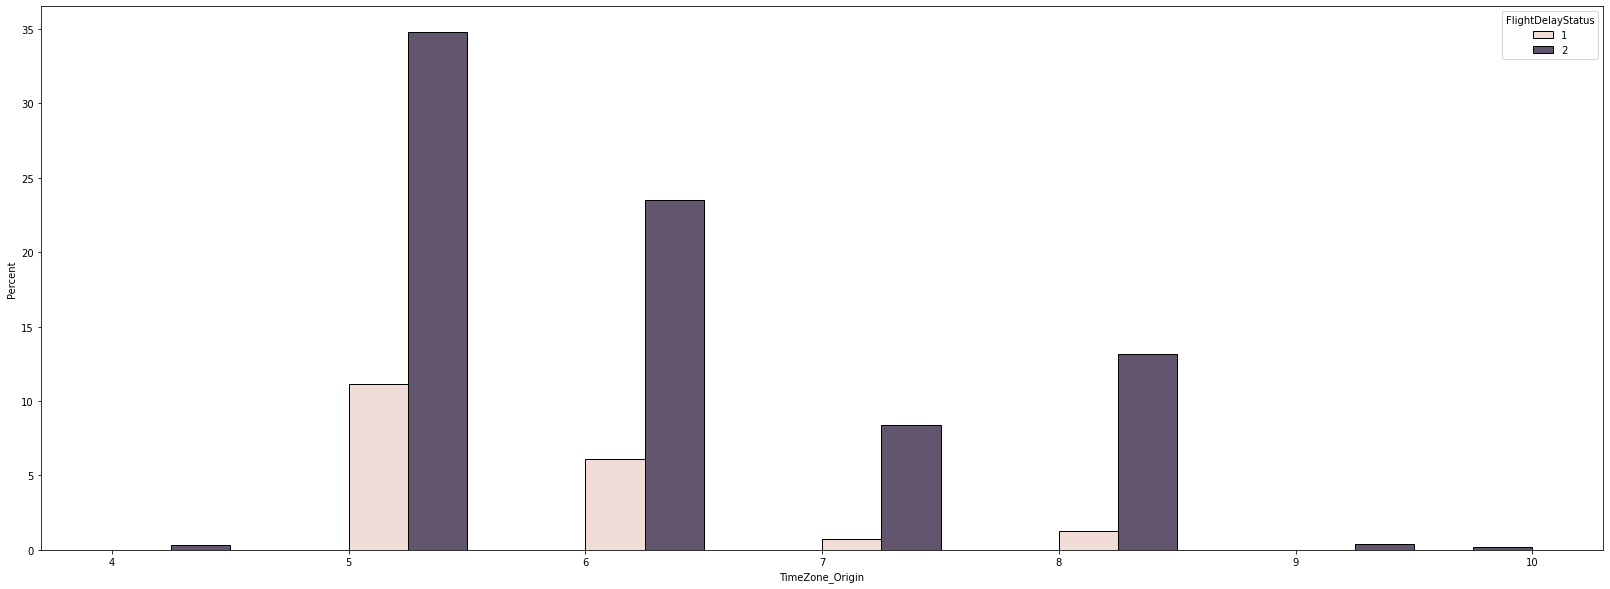

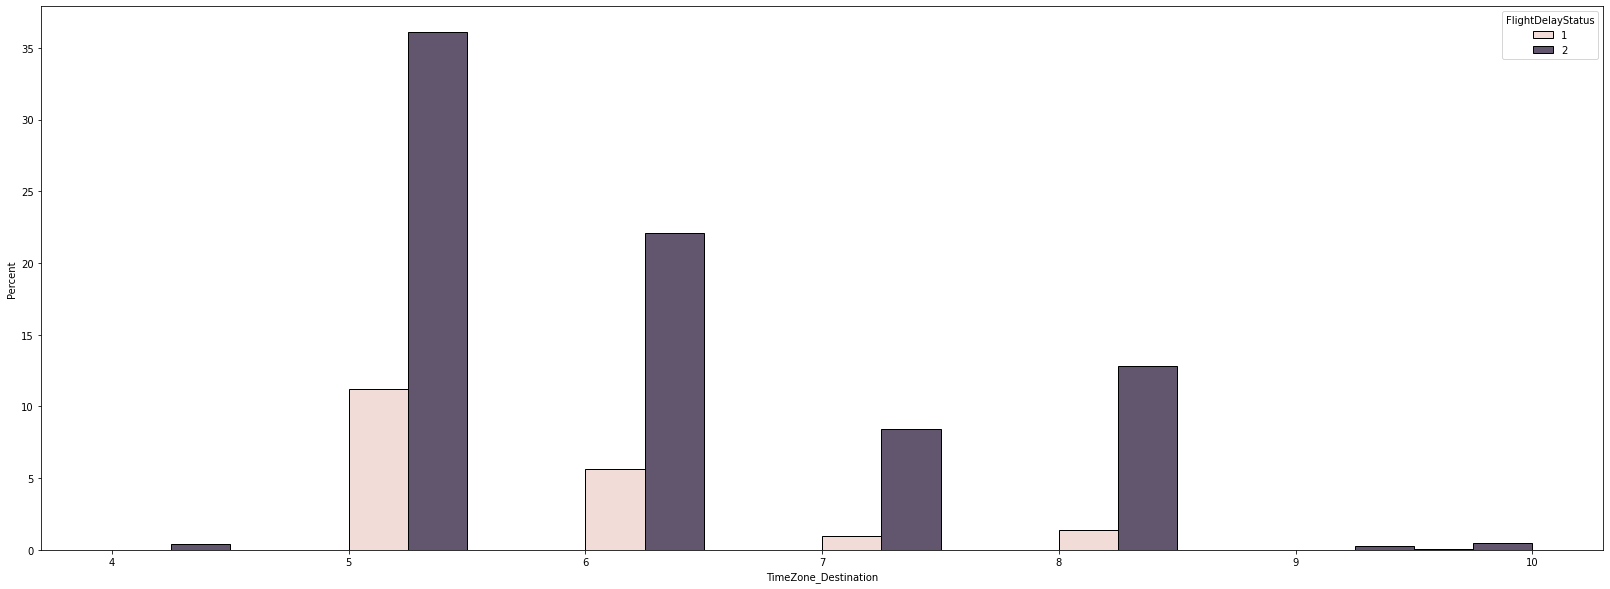

In [29]:
for feature in cat_var:
    
    plt.figure(figsize = (28,10))

    sns.histplot(binwidth= 0.5,
    x= feature,
    hue="FlightDelayStatus",
    data=df,
    stat="percent",
    multiple="dodge")

## Barplot

* In GroundHeight, BarometerHeight, HourlyPrecip_Origin and HourlyPrecip_Destination columns the mean value is **more in class 1 and less in class 2**.

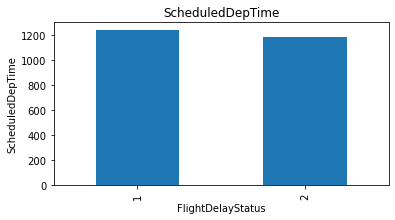

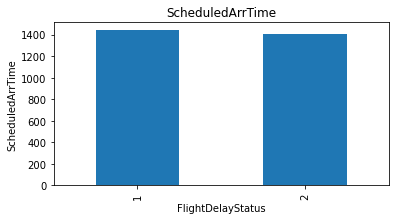

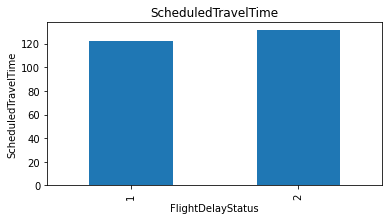

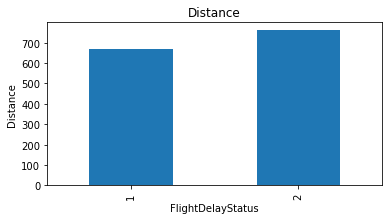

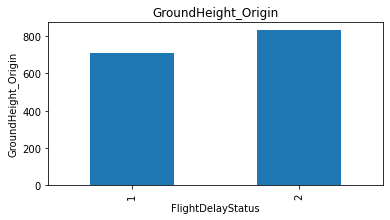

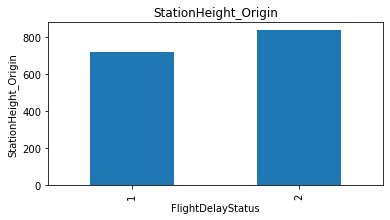

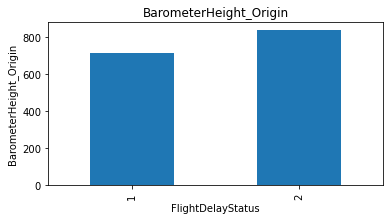

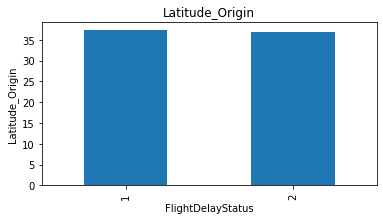

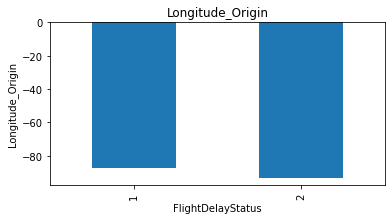

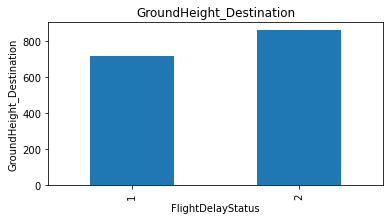

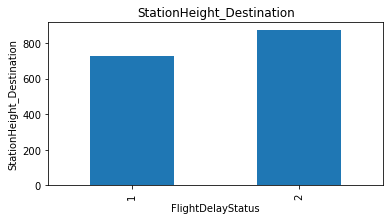

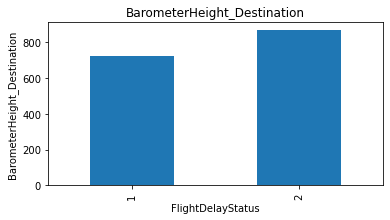

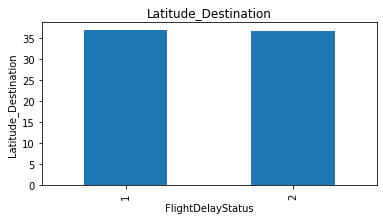

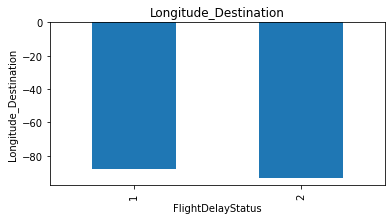

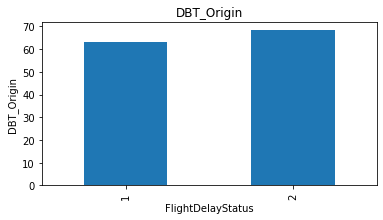

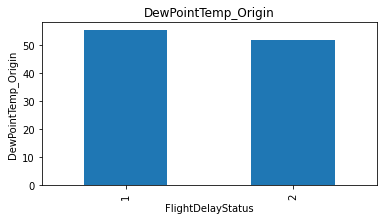

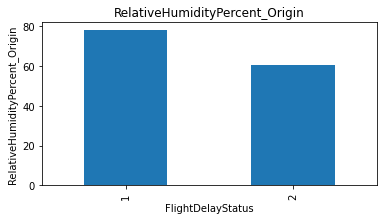

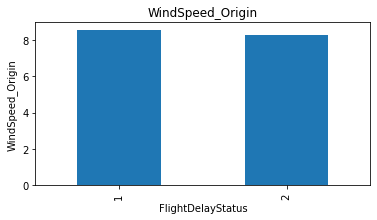

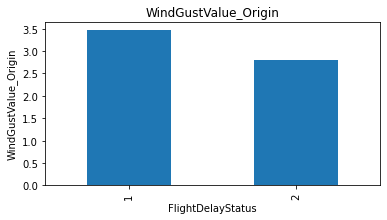

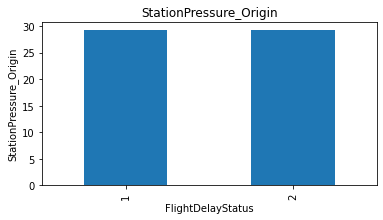

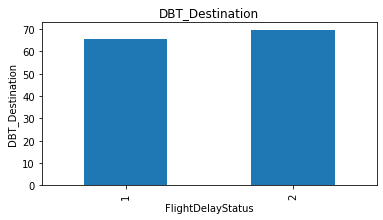

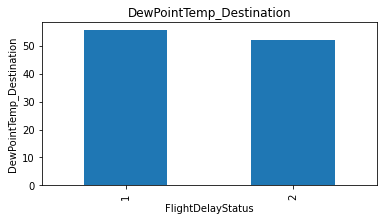

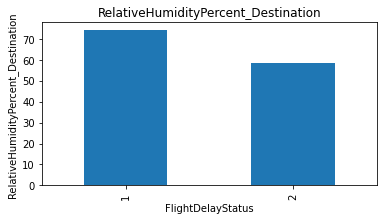

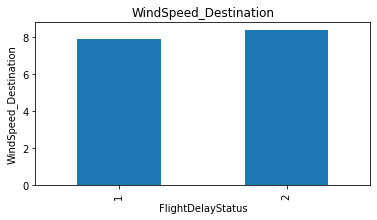

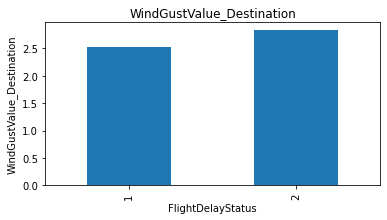

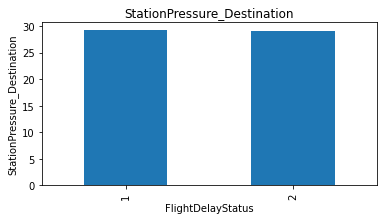

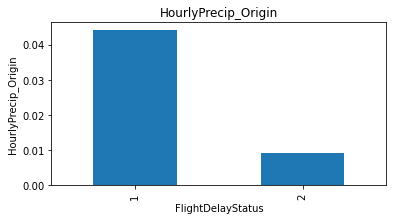

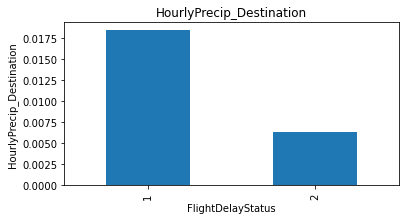

In [30]:
for feature in continuous_feature:
    plt.figure(figsize = (6,3))

    data=df.copy()
    data.groupby('FlightDelayStatus')[feature].mean().plot.bar()
    plt.xlabel('FlightDelayStatus')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Considering TimeZone as Categorical data 

In [34]:
df['TimeZone_Destination'] = df['TimeZone_Destination'].astype(str) 
df['TimeZone_Origin'] = df['TimeZone_Origin'].astype(str) 

test['TimeZone_Destination'] = test['TimeZone_Destination'].astype(str) 
test['TimeZone_Origin'] = test['TimeZone_Origin'].astype(str) 

In [35]:
train = df.drop('FlightDelayStatus', axis = 1)
y = df['FlightDelayStatus']

In [36]:
print(train.shape)
train.head()

(7861, 44)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,WeatherStationID_Origin,GroundHeight_Origin,StationHeight_Origin,BarometerHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,StationHeight_Destination,BarometerHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,MonthDay,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
0,1,1,4,815,902,107,DEN,LAS,629,3017,5379,5431,5382,39.5,-104.4,7,23169,2127,2180,2091,36.05,-115.10,8,101,FEW100 SCT150,10SM,37.0,12.0,36.0,6.0,170,0.0,24.55,BKN140 OVC200,10SM,47.0,24.0,41.0,11.0,170,0.0,27.86,0.00,0.0
1,1,1,4,1115,1223,68,DEN,GJT,212,3017,5379,5431,5382,39.5,-104.4,7,23066,4823,4839,4826,39.08,-108.32,7,101,FEW090 SCT140 BKN220,10SM,50.0,7.0,17.0,6.0,190,0.0,24.49,OVC095,8SM,36.0,31.0,82.0,8.0,290,0.0,25.14,0.00,0.0
2,1,1,4,1245,1802,197,DEN,MCO,1545,3017,5379,5431,5382,39.5,-104.4,7,12815,95,106,98,28.26,-81.19,5,101,FEW090 SCT140 BKN200,10SM,50.0,8.0,18.0,8.0,100,0.0,24.45,FEW038,10SM,69.0,63.0,81.0,11.0,080,0.0,30.24,0.00,0.0
3,1,3,6,610,735,85,DEN,SLC,391,3017,5379,5431,5382,39.5,-104.4,7,24127,4221,4227,4224,40.47,-111.58,7,103,BKN020 BKN034 OVC049,2SM,23.0,22.0,96.0,11.0,120,0.0,24.45,BKN031 BKN044 OVC055,9SM,24.0,18.0,77.0,9.0,330,0.0,25.50,0.01,0.0
4,1,3,6,1115,1220,65,DEN,RAP,301,3017,5379,5431,5382,39.5,-104.4,7,24090,3150,3168,3153,44.03,-103.03,7,103,SCT009 BKN015 OVC026,1SM,24.0,20.0,84.0,14.0,140,0.0,24.40,FEW010 BKN014 OVC033,8SM,9.0,4.0,80.0,5.0,110,0.0,26.72,0.01,0.0


# Outlier detection


*  An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.


*  Outliers are present in most of the **continuous features.**



**The extreme values beyond which an observation is considered
an outlier are determined using:**

- a Gaussian approximation
- the inter-quantile range proximity rule (IQR)
- percentiles

**Gaussian limits:**

- right tail: **mean + 3* std**
- left tail: **mean - 3* std**

**IQR limits:**

- right tail: **75th quantile + 3* IQR**
- left tail:  **25th quantile - 3* IQR**

where IQR is the inter-quartile range: **75th quantile - 25th quantile.**

**percentiles:**

- right tail: **95th percentile**
- left tail:  **5th percentile**

In [37]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [38]:
print('Total number of continuous variables :', len(continuous_feature))

Total number of continuous variables : 28


In [39]:
continuous_feature

['ScheduledDepTime',
 'ScheduledArrTime',
 'ScheduledTravelTime',
 'Distance',
 'GroundHeight_Origin',
 'StationHeight_Origin',
 'BarometerHeight_Origin',
 'Latitude_Origin',
 'Longitude_Origin',
 'GroundHeight_Destination',
 'StationHeight_Destination',
 'BarometerHeight_Destination',
 'Latitude_Destination',
 'Longitude_Destination',
 'DBT_Origin',
 'DewPointTemp_Origin',
 'RelativeHumidityPercent_Origin',
 'WindSpeed_Origin',
 'WindGustValue_Origin',
 'StationPressure_Origin',
 'DBT_Destination',
 'DewPointTemp_Destination',
 'RelativeHumidityPercent_Destination',
 'WindSpeed_Destination',
 'WindGustValue_Destination',
 'StationPressure_Destination',
 'HourlyPrecip_Origin',
 'HourlyPrecip_Destination']

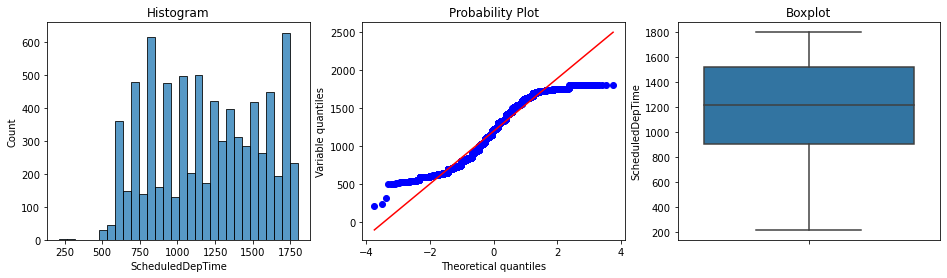

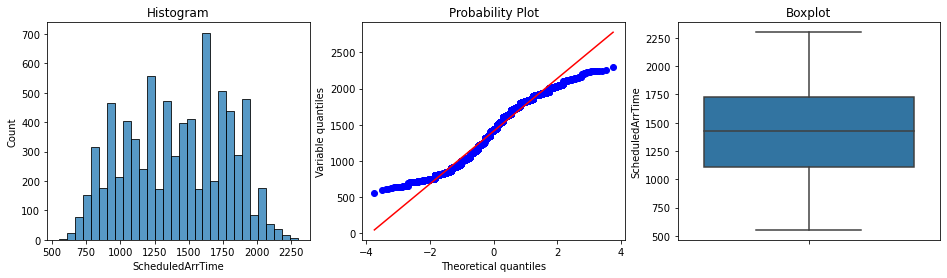

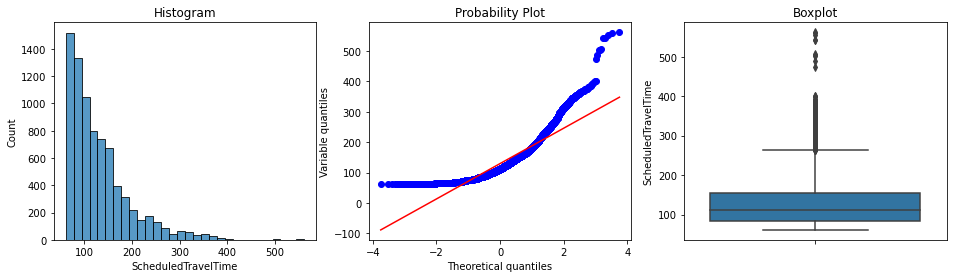

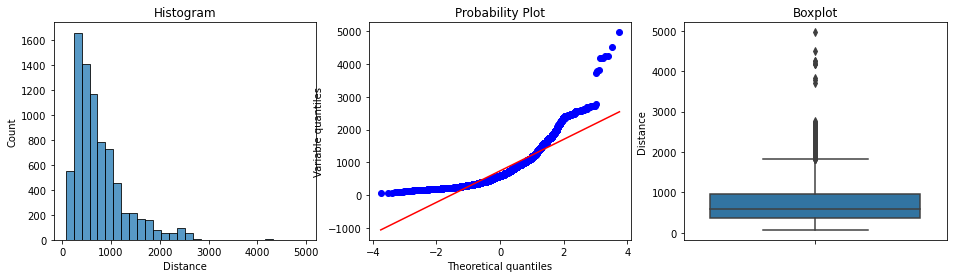

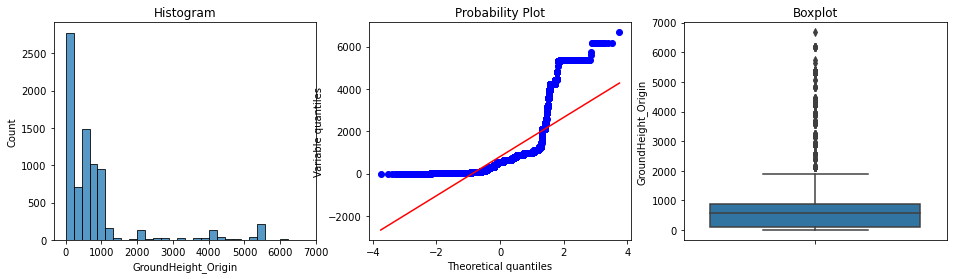

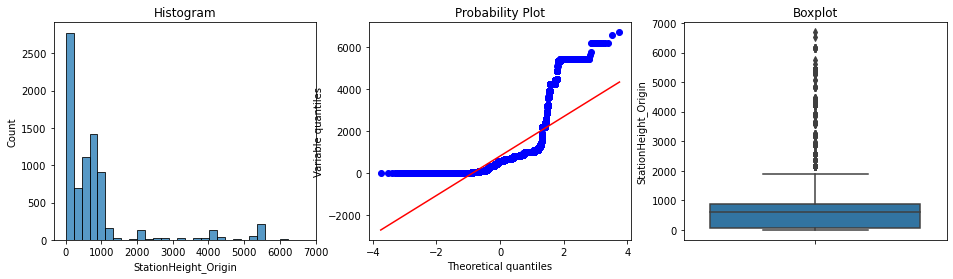

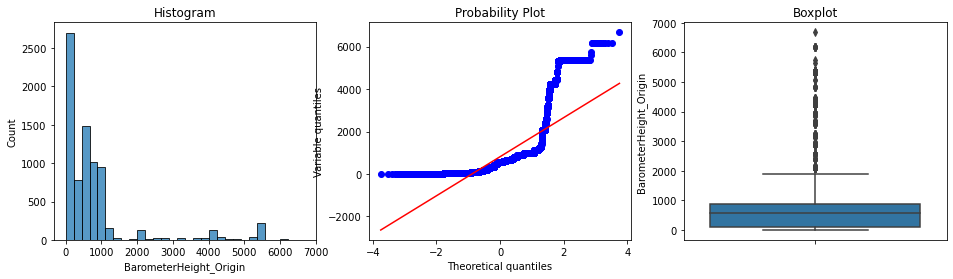

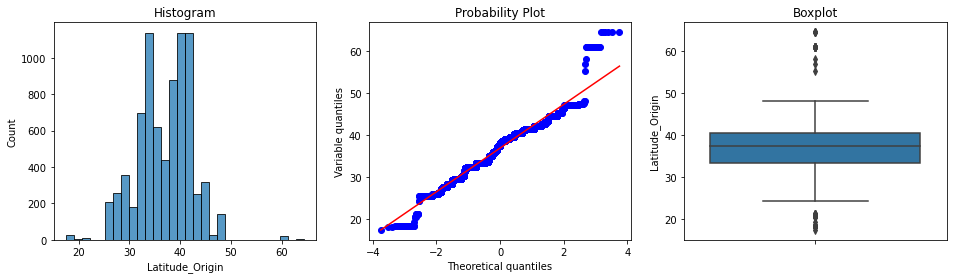

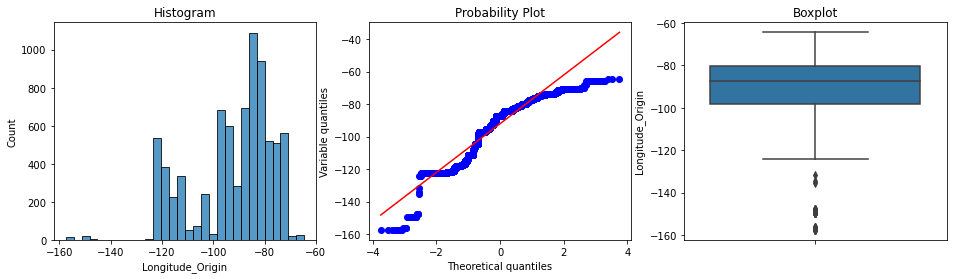

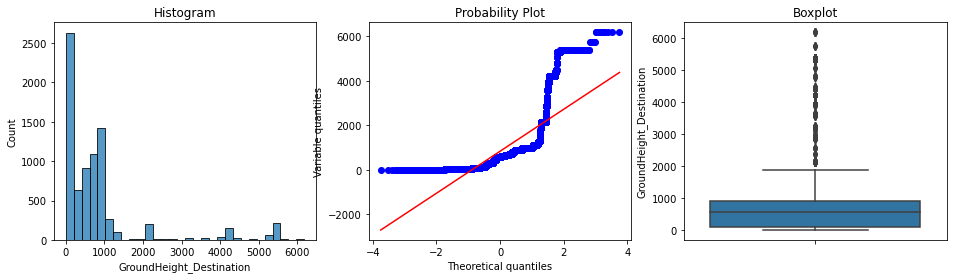

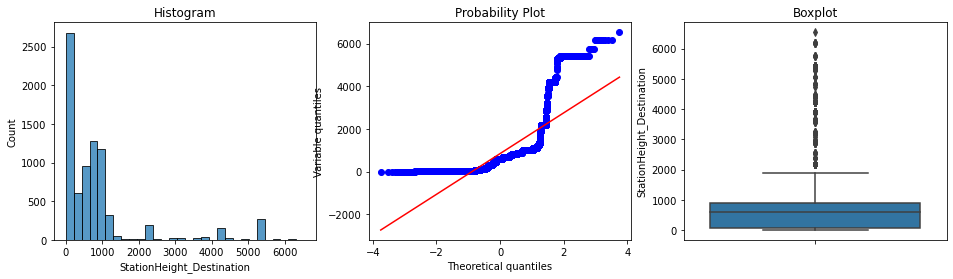

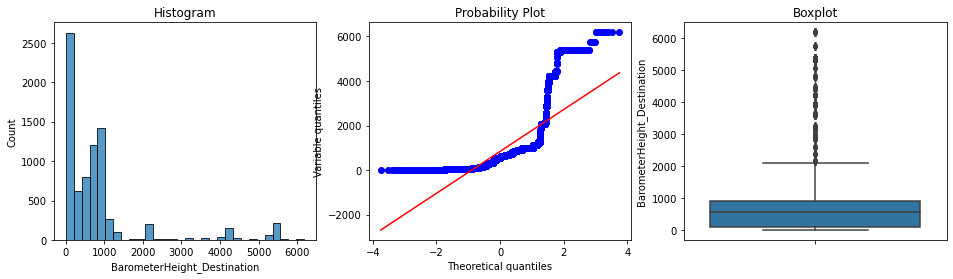

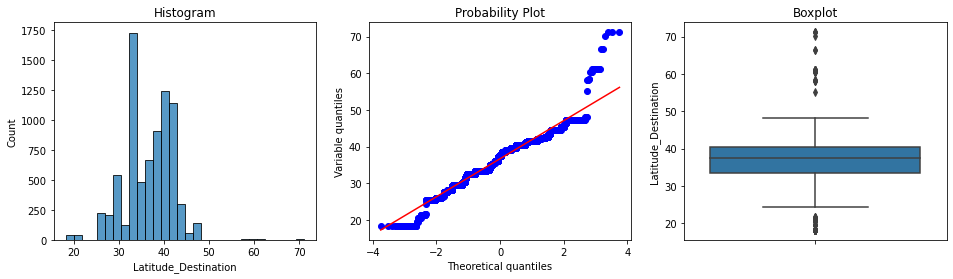

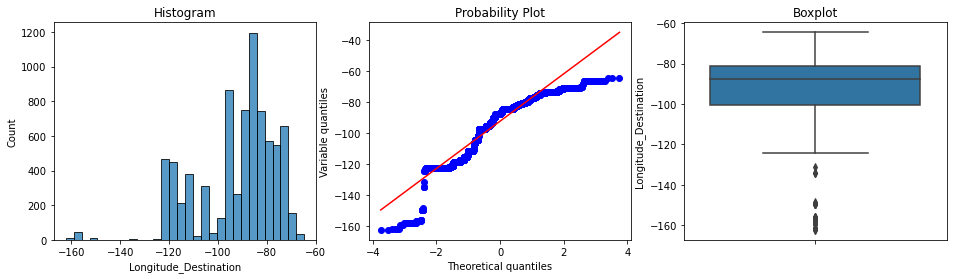

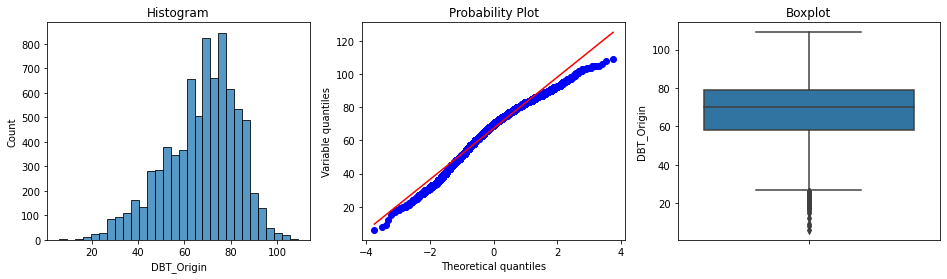

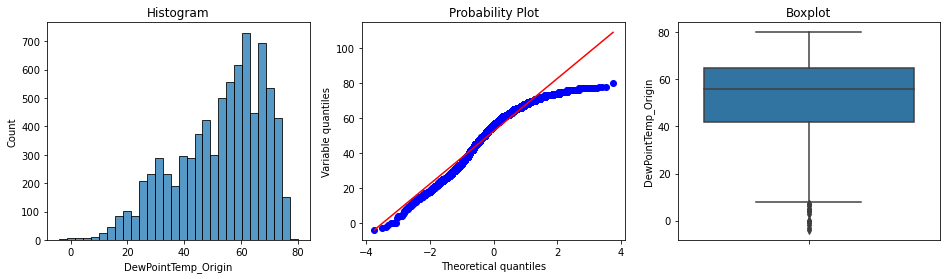

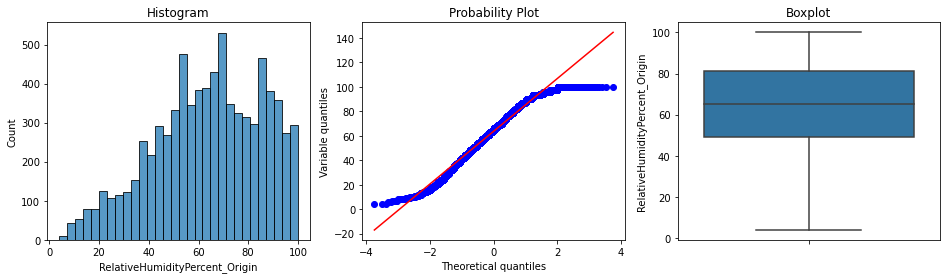

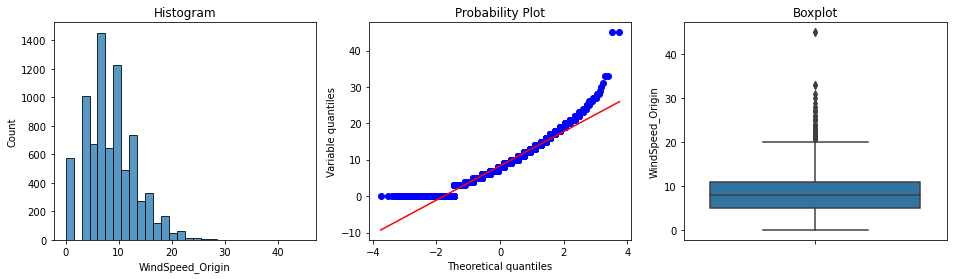

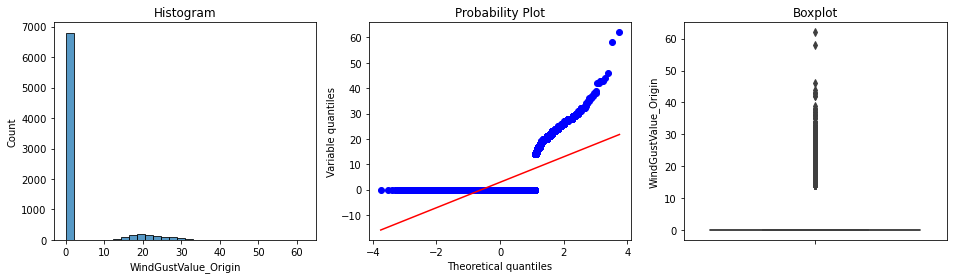

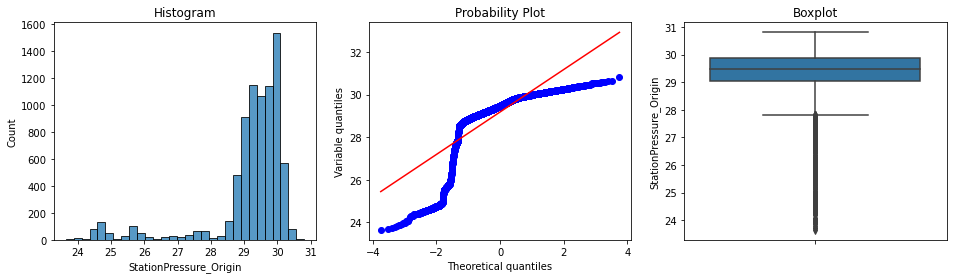

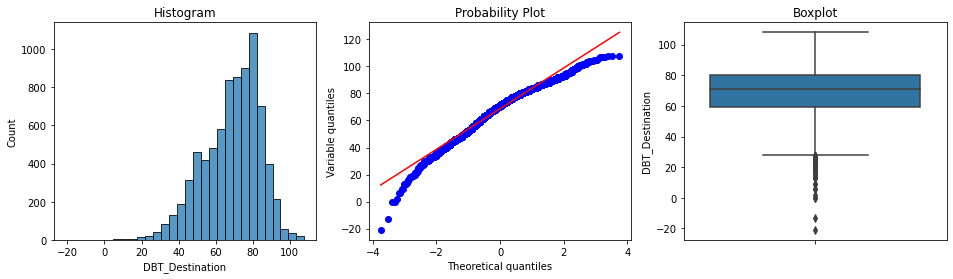

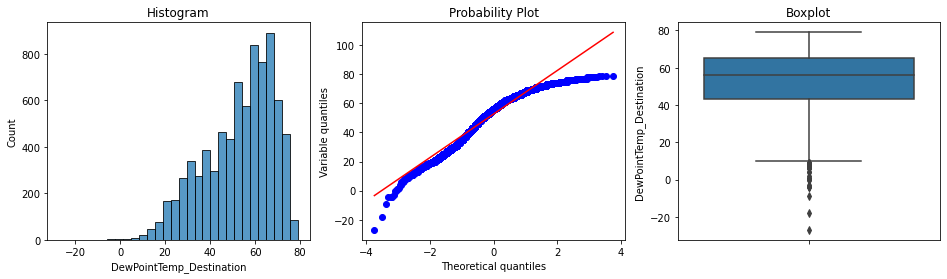

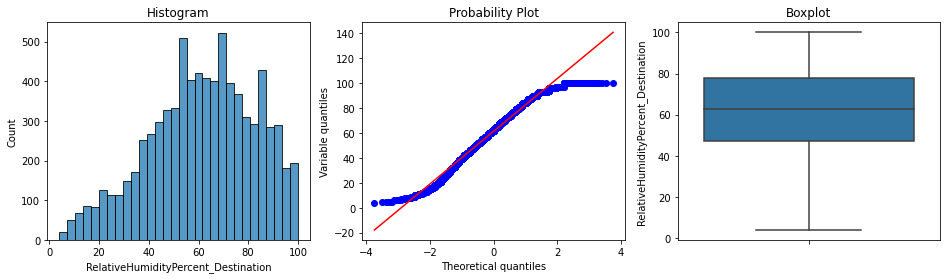

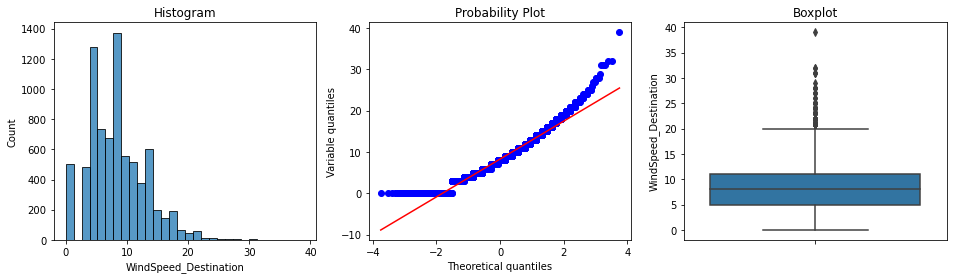

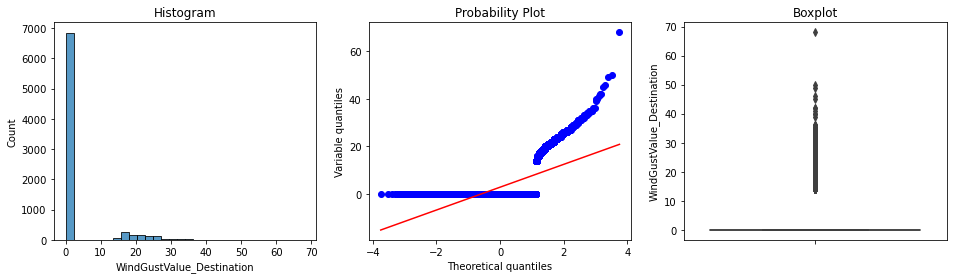

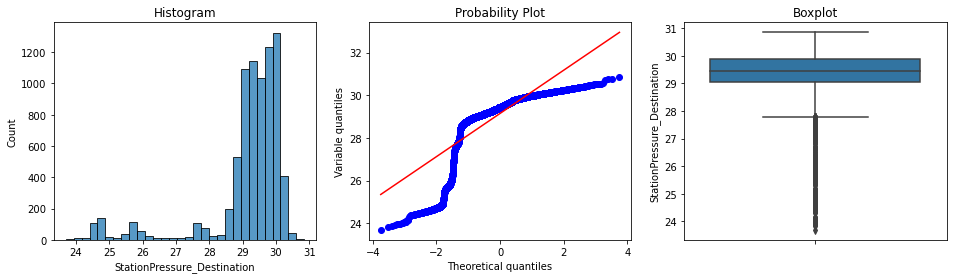

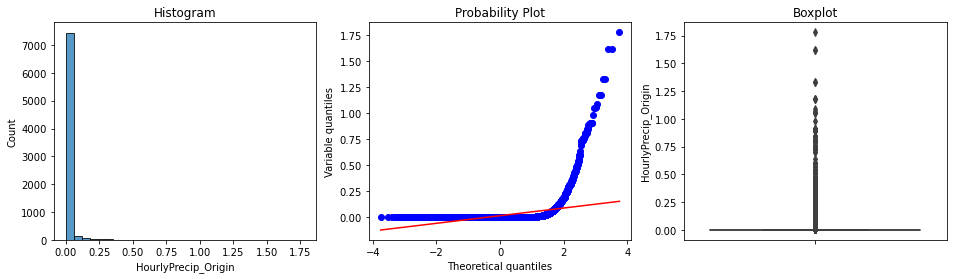

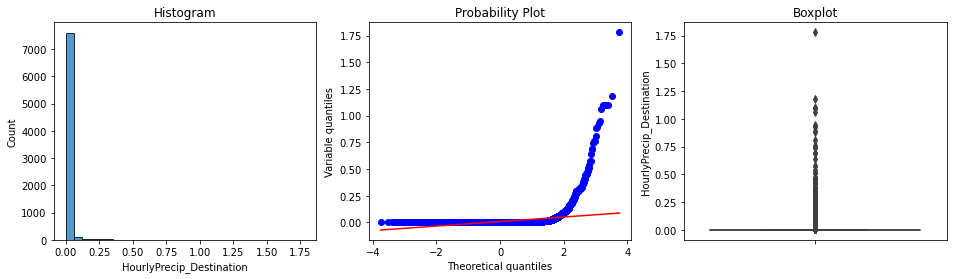

In [40]:
for feature in continuous_feature :

    diagnostic_plots(train, feature)

## Gaussian approximation

In [41]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 2 times or 3 times the std to calculate the boundaries.  


    lower_boundary = df[variable].mean() - (distance)* (df[variable].std())
    upper_boundary = df[variable].mean() + (distance)* (df[variable].std())

    return upper_boundary, lower_boundary

## ScheduledTravelTime

In [42]:
# find limits for ScheduledTravelTime

ScheduledTravelTime_upper_limit, ScheduledTravelTime_lower_limit = find_skewed_boundaries(train, 'ScheduledTravelTime', 2)
ScheduledTravelTime_upper_limit, ScheduledTravelTime_lower_limit

(256.1679824913168, 3.079695921098889)

### Replace the outliers by the maximum and minimum limit

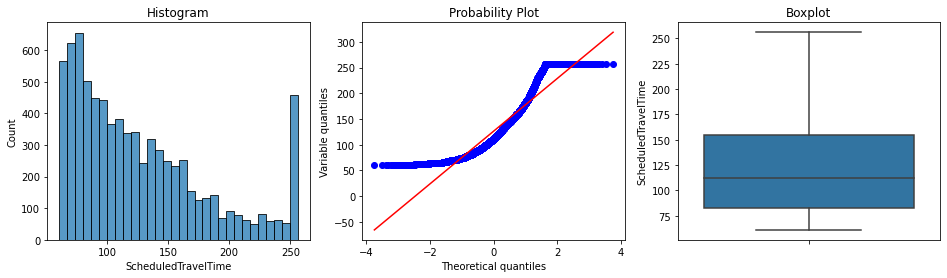

In [43]:
# Now let's replace the outliers by the maximum and minimum limit
import numpy as np
train['ScheduledTravelTime']= np.where(train['ScheduledTravelTime'] > ScheduledTravelTime_upper_limit, ScheduledTravelTime_upper_limit,
                       np.where(train['ScheduledTravelTime'] < ScheduledTravelTime_lower_limit, ScheduledTravelTime_lower_limit, train['ScheduledTravelTime']))
diagnostic_plots(train, 'ScheduledTravelTime')

### Distance

In [44]:
# find limits for Distance

Distance_upper_limit, Distance_lower_limit = find_skewed_boundaries(train, 'Distance', 2)
Distance_upper_limit, Distance_lower_limit

(1789.0227693996712, -301.494719533242)

### Replace the outliers by the maximum and minimum limit

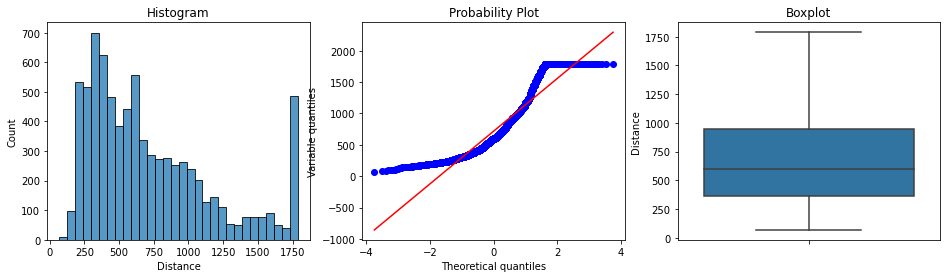

In [45]:
train['Distance']= np.where(train['Distance'] > Distance_upper_limit, Distance_upper_limit,
                       np.where(train['Distance'] < Distance_lower_limit, Distance_lower_limit, train['Distance']))
diagnostic_plots(train, 'Distance')

# Winsorizer

*  The Winsorizer() caps maximum and/or minimum values of a variable at automatically
   determined values, and optionally adds indicators.
   
* You can select how far out to cap the maximum or minimum values with the
  parameter **fold**.
  

  -> If **capping_method = 'gaussian** fold gives the value to multiply the std.


  ->If **capping_method = 'iqr** fold is the value to multiply the IQR.


  -> If **capping_method = 'quantiles**, fold is the percentile on each tail that should
   be censored. 


* fold: int or float, default=3
    The factor used to multiply the std or IQR to calculate the maximum or minimum
    allowed values. Recommended values are 2 or 3 for the gaussian approximation,
    and 1.5 or 3 for the IQR proximity rule.


In [46]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold= 1.5,
                          variables=[ 'GroundHeight_Origin','StationHeight_Origin','BarometerHeight_Origin','Latitude_Origin',
                                     'Longitude_Origin','GroundHeight_Destination','StationHeight_Destination',
                                     'BarometerHeight_Destination','Latitude_Destination','Longitude_Destination',
                                     'DBT_Origin','DewPointTemp_Origin','RelativeHumidityPercent_Origin',
                                     'WindSpeed_Origin','StationPressure_Origin','DBT_Destination', 'DewPointTemp_Destination', 
                                     'RelativeHumidityPercent_Destination', 'WindSpeed_Destination', 
                                     'WindGustValue_Destination', 'WindGustValue_Origin',
                                     'StationPressure_Destination',  'HourlyPrecip_Origin','HourlyPrecip_Destination' 
                                     ])

windsoriser.fit(train)
train1 = windsoriser.transform(train)

### Maximum caps

In [47]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_ 

{'GroundHeight_Origin': 2074.5,
 'StationHeight_Origin': 2110.0,
 'BarometerHeight_Origin': 2065.5,
 'Latitude_Origin': 51.10499999999999,
 'Longitude_Origin': -53.980000000000004,
 'GroundHeight_Destination': 2122.0,
 'StationHeight_Destination': 2150.0,
 'BarometerHeight_Destination': 2113.0,
 'Latitude_Destination': 51.10499999999999,
 'Longitude_Destination': -52.165000000000006,
 'DBT_Origin': 110.5,
 'DewPointTemp_Origin': 99.5,
 'RelativeHumidityPercent_Origin': 129.0,
 'WindSpeed_Origin': 20.0,
 'StationPressure_Origin': 31.135000000000005,
 'DBT_Destination': 111.5,
 'DewPointTemp_Destination': 98.0,
 'RelativeHumidityPercent_Destination': 124.5,
 'WindSpeed_Destination': 20.0,
 'WindGustValue_Destination': 0.0,
 'WindGustValue_Origin': 0.0,
 'StationPressure_Destination': 31.115000000000002,
 'HourlyPrecip_Origin': 0.0,
 'HourlyPrecip_Destination': 0.0}

### Mininum caps


In [48]:
# we can inspect the mininum caps for each variable
windsoriser.left_tail_caps_

{'GroundHeight_Origin': -1105.5,
 'StationHeight_Origin': -1162.0,
 'BarometerHeight_Origin': -1082.5,
 'Latitude_Origin': 22.745000000000008,
 'Longitude_Origin': -124.86,
 'GroundHeight_Destination': -1134.0,
 'StationHeight_Destination': -1186.0,
 'BarometerHeight_Destination': -1111.0,
 'Latitude_Destination': 22.745000000000008,
 'Longitude_Destination': -129.16500000000002,
 'DBT_Origin': 26.5,
 'DewPointTemp_Origin': 7.5,
 'RelativeHumidityPercent_Origin': 1.0,
 'WindSpeed_Origin': -4.0,
 'StationPressure_Origin': 27.814999999999998,
 'DBT_Destination': 27.5,
 'DewPointTemp_Destination': 10.0,
 'RelativeHumidityPercent_Destination': 0.5,
 'WindSpeed_Destination': -4.0,
 'WindGustValue_Destination': 0.0,
 'WindGustValue_Origin': 0.0,
 'StationPressure_Destination': 27.794999999999995,
 'HourlyPrecip_Origin': 0.0,
 'HourlyPrecip_Destination': 0.0}

### After Outlier capping

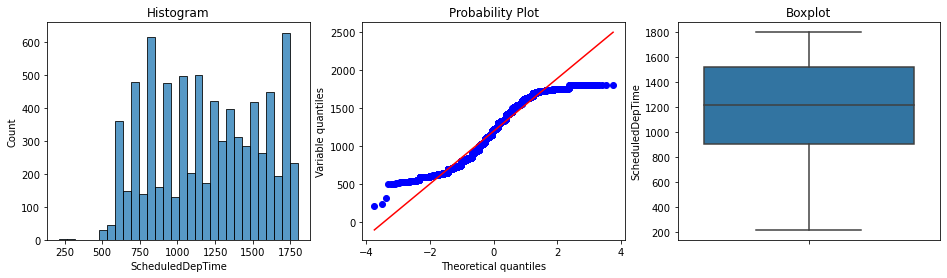

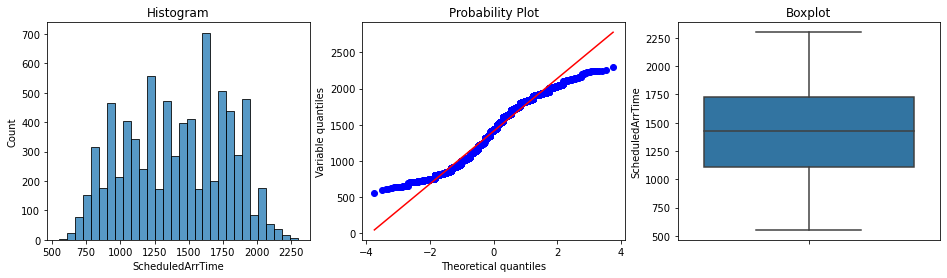

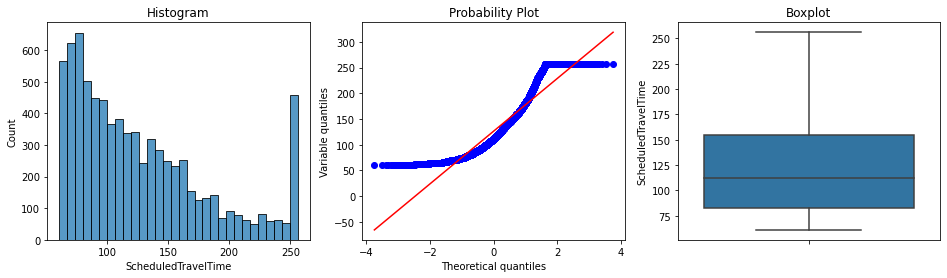

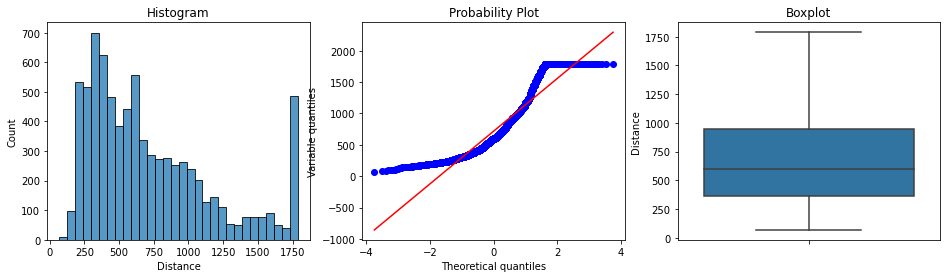

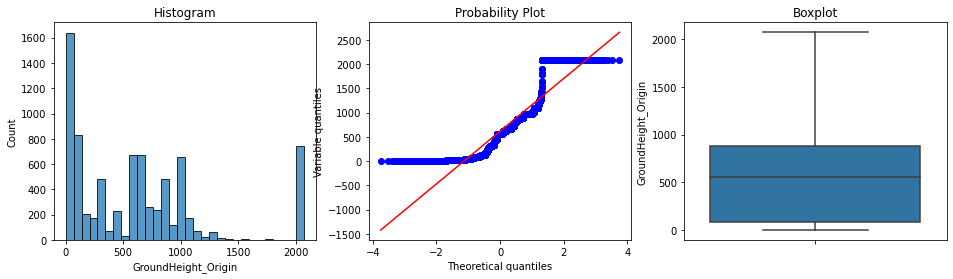

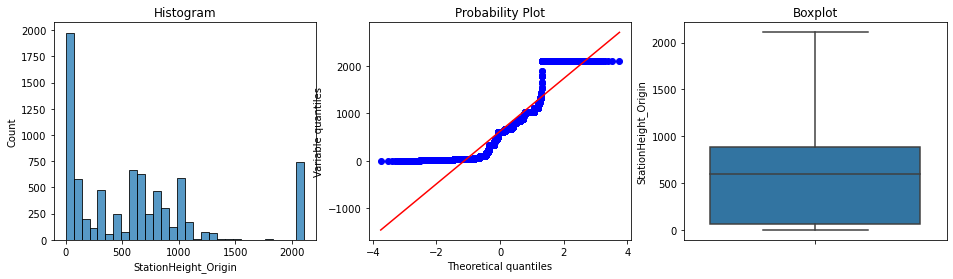

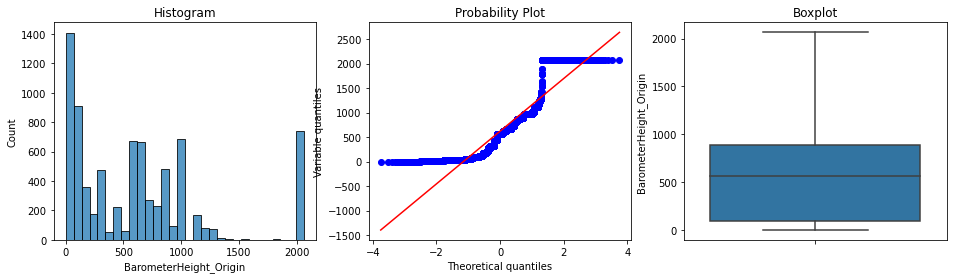

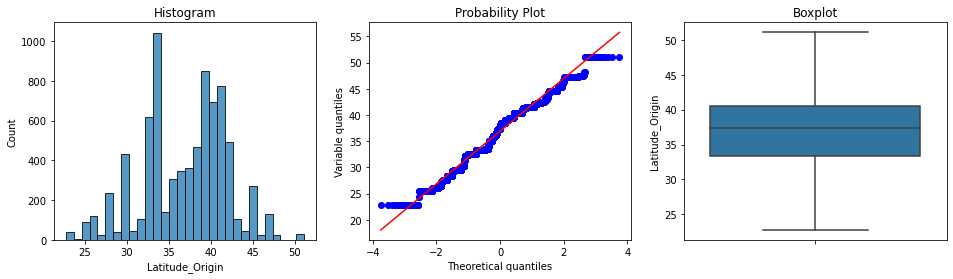

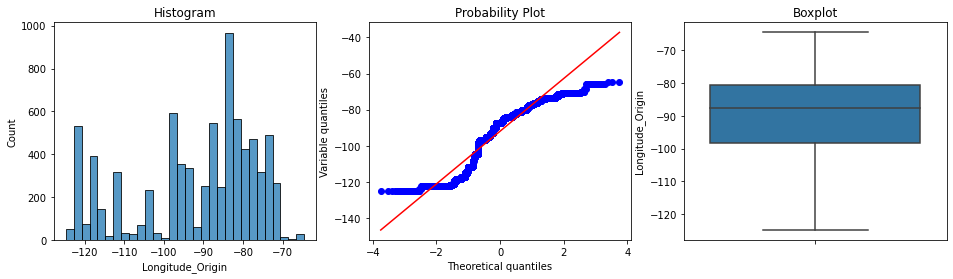

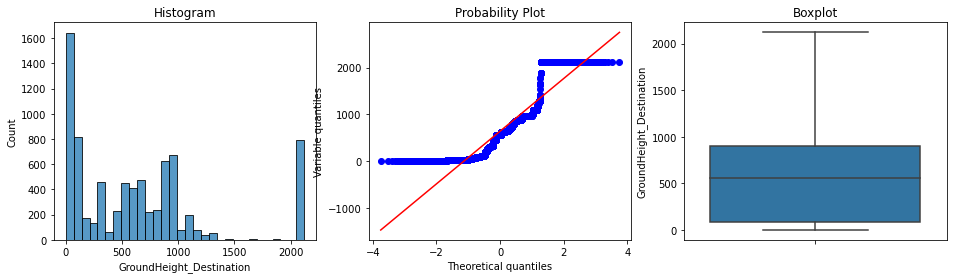

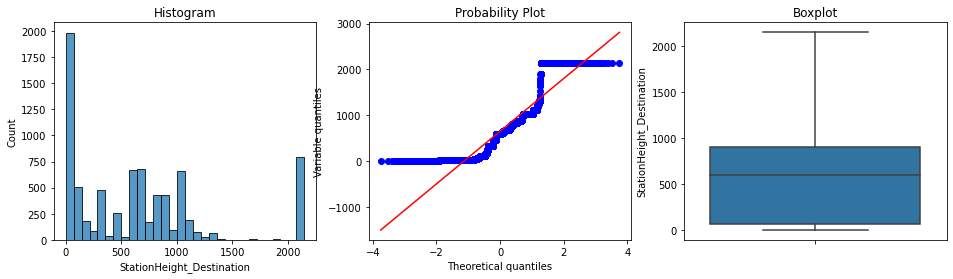

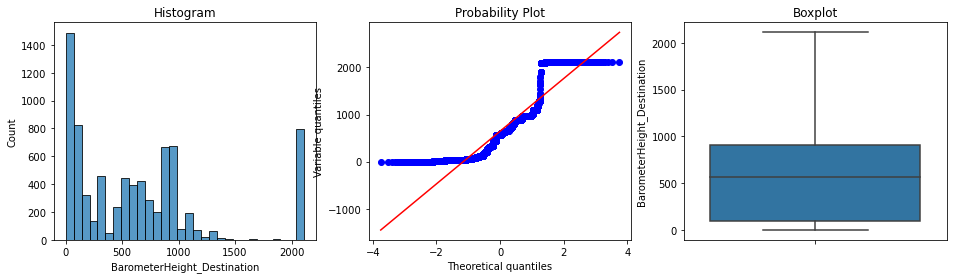

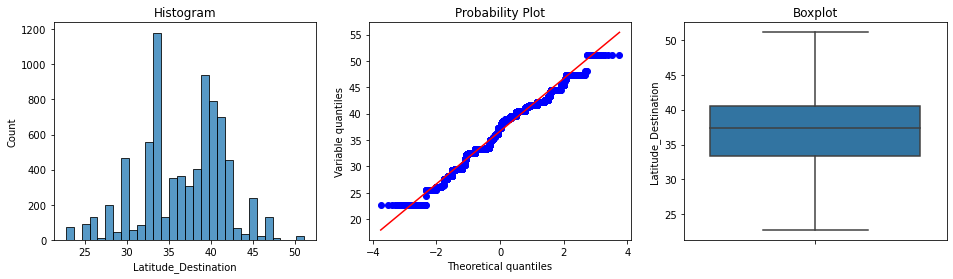

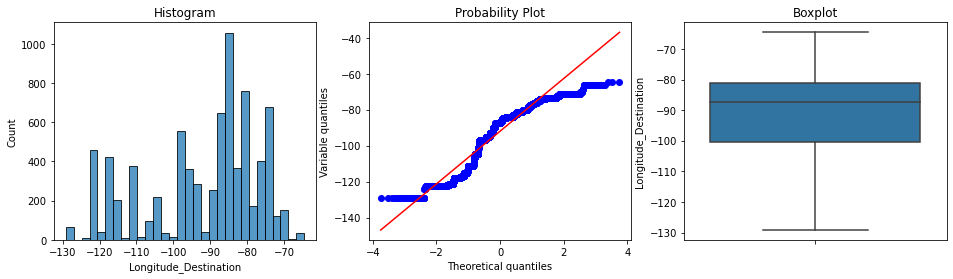

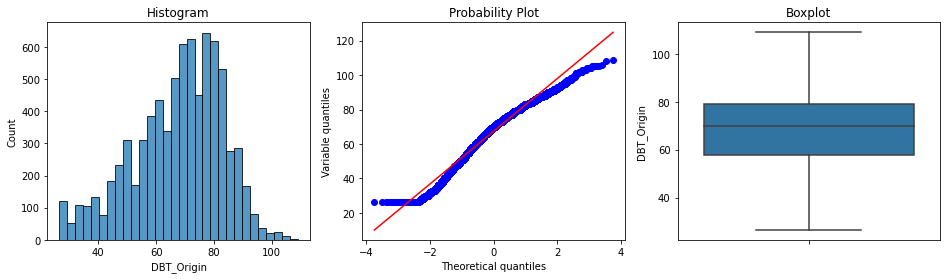

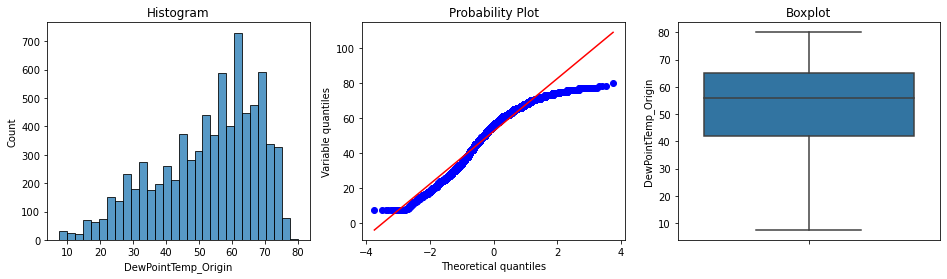

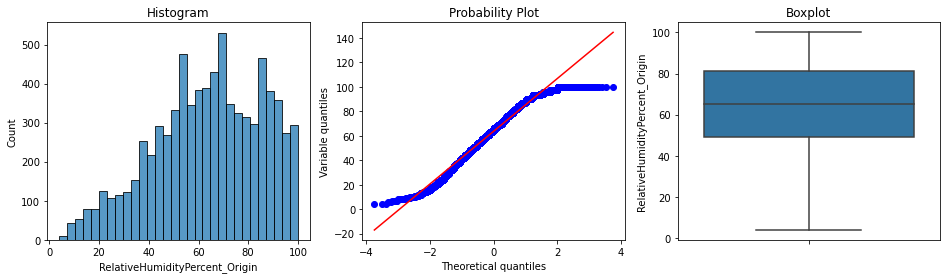

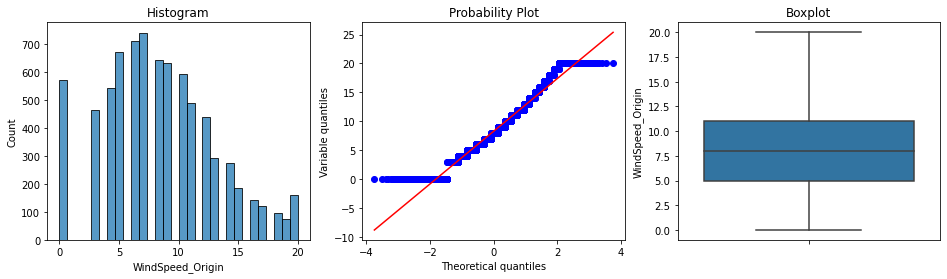

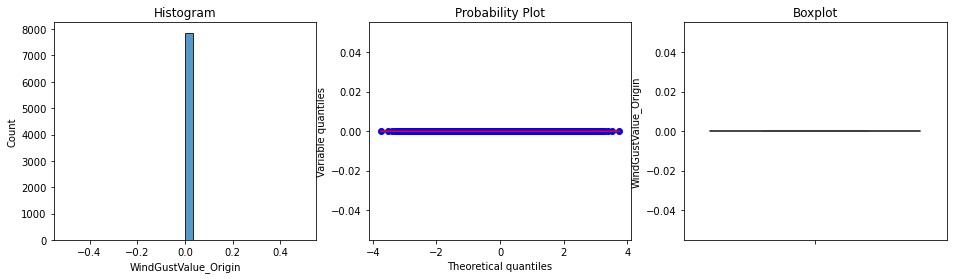

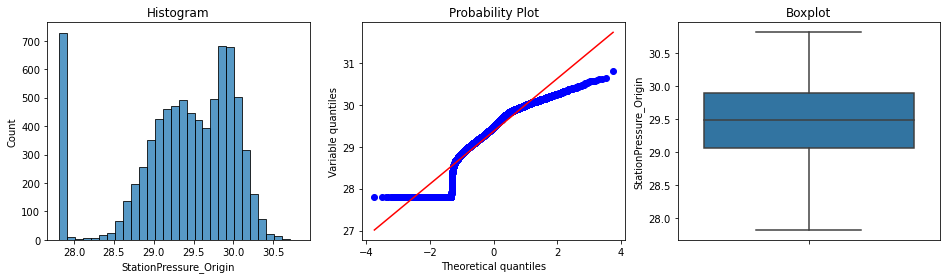

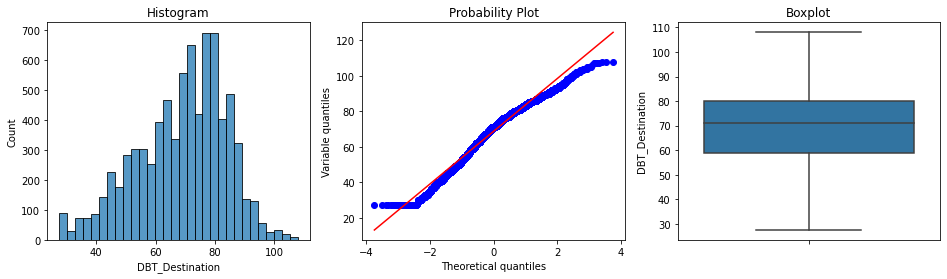

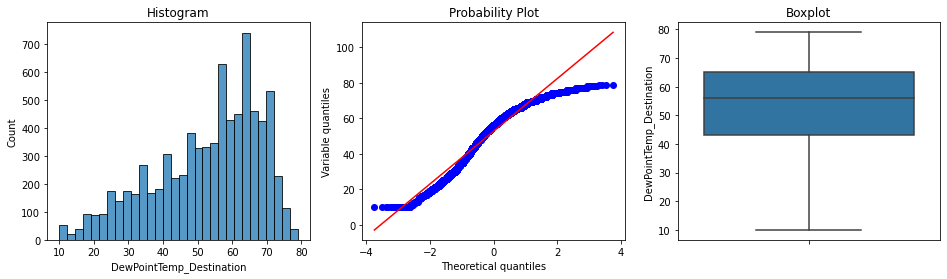

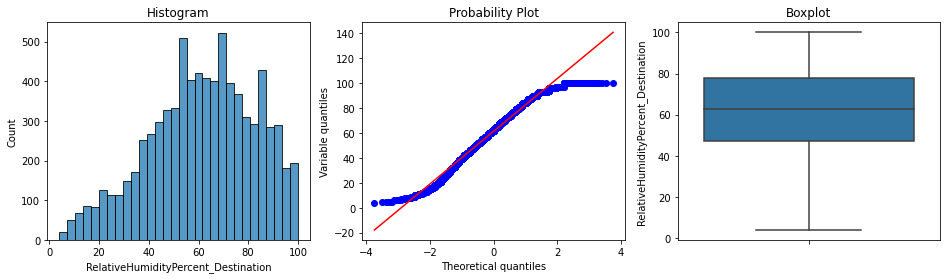

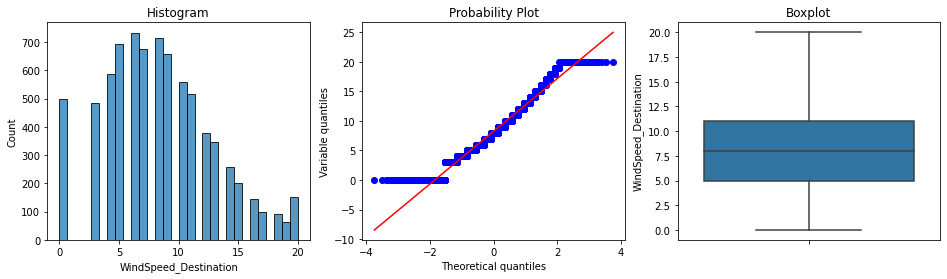

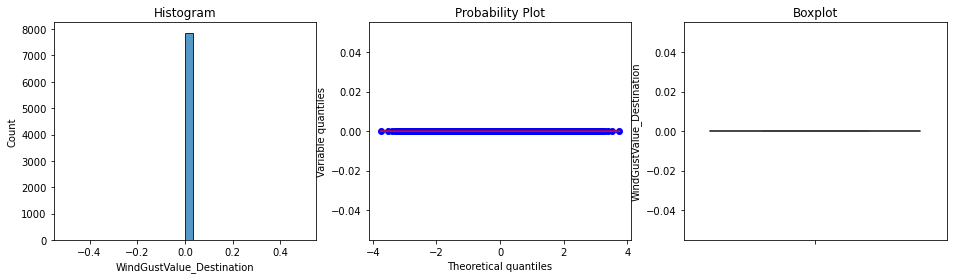

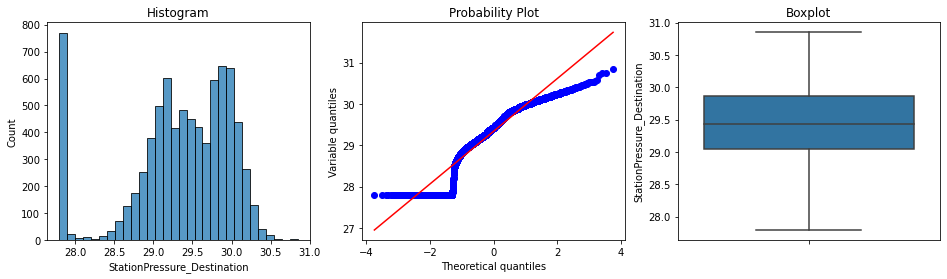

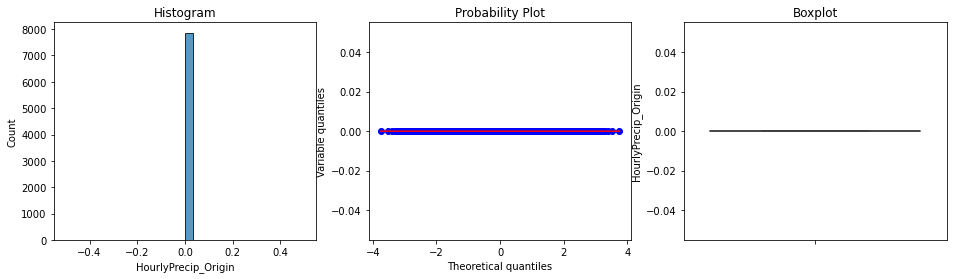

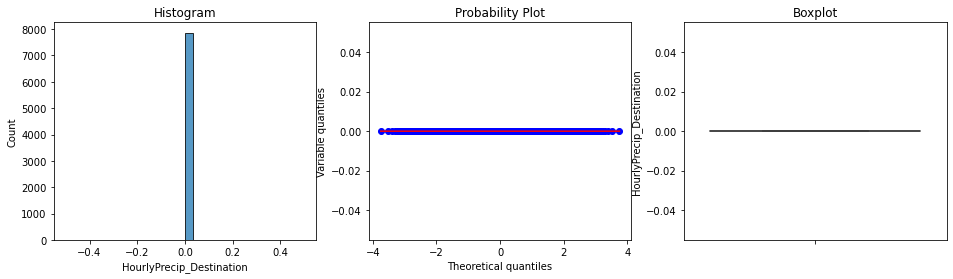

In [49]:
for feature in  continuous_feature:

    diagnostic_plots(train1, feature)

# Feature Selection

## DropCorrelatedFeatures


* Correlation is calculated with pandas.corr()


* The correlation threshold above which a feature will be deemed correlated with another one and removed from the dataset.

In [50]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns , set does not allow duplicates
    corr_matrix = dataset.corr()
    print('Highly correlated features are listed below')
    print()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):

            if (corr_matrix.iloc[i, j]) > threshold: 
                colnamei = corr_matrix.columns[i]  # getting the name of column
                colnamej = corr_matrix.columns[j] 
                print(colnamei, ':',  colnamej, ':',corr_matrix.iloc[i, j] )
                col_corr.add(colnamei)
    print()
    print('Total number of columns :', len(col_corr))
    print()
    return col_corr

Source : [Link](https://www.kaggle.com/code/tanmayunhale/feature-selection-pearson-correlation/notebook)

In [51]:
corr_features= correlation(train1, 0.90)
print(corr_features)

Highly correlated features are listed below

ScheduledArrTime : ScheduledDepTime : 0.9289156733046
Distance : ScheduledTravelTime : 0.9840885968602445
StationHeight_Origin : GroundHeight_Origin : 0.9977816069938251
BarometerHeight_Origin : GroundHeight_Origin : 0.9992972705053966
BarometerHeight_Origin : StationHeight_Origin : 0.997217753585753
StationHeight_Destination : GroundHeight_Destination : 0.9978856205799523
BarometerHeight_Destination : GroundHeight_Destination : 0.9993840174704818
BarometerHeight_Destination : StationHeight_Destination : 0.9973838918304351
MonthDay : Month : 0.9994933040728146

Total number of columns : 7

{'Distance', 'BarometerHeight_Origin', 'StationHeight_Destination', 'MonthDay', 'ScheduledArrTime', 'StationHeight_Origin', 'BarometerHeight_Destination'}


### Dropping Correlated Features from the datasets

In [52]:
train2= train1.drop(corr_features,axis=1)

test2 = test.drop(corr_features,axis=1)

In [53]:
print(train2.shape,test2.shape)
train2.head()

(7861, 37) (6566, 37)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
0,1,1,4,815,107.0,DEN,LAS,3017,2074.5,39.5,-104.4,7,23169,2122.0,36.05,-115.10,8,FEW100 SCT150,10SM,37.0,12.0,36.0,6.0,170,0.0,27.815,BKN140 OVC200,10SM,47.0,24.0,41.0,11.0,170,0.0,27.860,0.0,0.0
1,1,1,4,1115,68.0,DEN,GJT,3017,2074.5,39.5,-104.4,7,23066,2122.0,39.08,-108.32,7,FEW090 SCT140 BKN220,10SM,50.0,7.5,17.0,6.0,190,0.0,27.815,OVC095,8SM,36.0,31.0,82.0,8.0,290,0.0,27.795,0.0,0.0
2,1,1,4,1245,197.0,DEN,MCO,3017,2074.5,39.5,-104.4,7,12815,95.0,28.26,-81.19,5,FEW090 SCT140 BKN200,10SM,50.0,8.0,18.0,8.0,100,0.0,27.815,FEW038,10SM,69.0,63.0,81.0,11.0,080,0.0,30.240,0.0,0.0
3,1,3,6,610,85.0,DEN,SLC,3017,2074.5,39.5,-104.4,7,24127,2122.0,40.47,-111.58,7,BKN020 BKN034 OVC049,2SM,26.5,22.0,96.0,11.0,120,0.0,27.815,BKN031 BKN044 OVC055,9SM,27.5,18.0,77.0,9.0,330,0.0,27.795,0.0,0.0
4,1,3,6,1115,65.0,DEN,RAP,3017,2074.5,39.5,-104.4,7,24090,2122.0,44.03,-103.03,7,SCT009 BKN015 OVC026,1SM,26.5,20.0,84.0,14.0,140,0.0,27.815,FEW010 BKN014 OVC033,8SM,27.5,10.0,80.0,5.0,110,0.0,27.795,0.0,0.0


## Removing features with low variance (***Constant variables***)

*  Constant variables show the same value across all the observations in the dataset.


* ***threshold*** :  Features with a training-set variance lower than this threshold will be removed. 


Source : [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

In [54]:
num_var = [feature for feature in train2.columns if train2[feature].dtypes != 'O']
print('Total number of Numerical variables', len(num_var))

Total number of Numerical variables 27


In [55]:
### It will show zero variance features
from sklearn.feature_selection import VarianceThreshold # Feature selector that removes all low-variance features.
var_thres=VarianceThreshold(threshold = 0)
var_thres.fit(train2[num_var])

VarianceThreshold(threshold=0)

In [56]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False])

In [57]:
len(train2[num_var].columns[var_thres.get_support()])

23

In [58]:
print(train2['HourlyPrecip_Origin'].value_counts())
print(train2['HourlyPrecip_Destination'].value_counts())
print(train2['WindGustValue_Origin'].value_counts())
print(train2['WindGustValue_Destination'].value_counts())

0.0    7861
Name: HourlyPrecip_Origin, dtype: int64
0.0    7861
Name: HourlyPrecip_Destination, dtype: int64
0.0    7861
Name: WindGustValue_Origin, dtype: int64
0.0    7861
Name: WindGustValue_Destination, dtype: int64


In [59]:
constant_columns = [column for column in train2[num_var].columns
                    if column not in train2[num_var].columns[var_thres.get_support()]]

print(len(constant_columns))
print(constant_columns)

4
['WindGustValue_Origin', 'WindGustValue_Destination', 'HourlyPrecip_Origin', 'HourlyPrecip_Destination']


In [60]:
train3 = train2.drop(constant_columns,axis=1)

test3 = test2.drop(constant_columns,axis=1)

print(train3.shape,test3.shape)

(7861, 33) (6566, 33)


## StandardScaler

In [61]:
num_var = [feature for feature in train3.columns if train3[feature].dtypes != 'O' and feature not in ['FlightDelayStatus']] 
#train3[num_var].head()

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train3[num_var])

train3[num_var] = scaler.transform(train3[num_var])

test3[num_var] = scaler.transform(test3[num_var])

In [63]:
train3.head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
0,-2.16886,-1.595997,0.019716,-1.079811,-0.362153,DEN,LAS,-0.850974,2.462441,0.509088,-0.815021,7,-0.226448,2.402981,-0.124873,-1.507739,8,FEW100 SCT150,10SM,-1.966686,-2.630911,-1.274651,-0.492778,170,-2.357689,BKN140 OVC200,10SM,-1.454620,-1.884047,-0.960457,0.607611,170,-2.206872
1,-2.16886,-1.595997,0.019716,-0.234504,-1.080953,DEN,GJT,-0.850974,2.462441,0.509088,-0.815021,7,-0.229697,2.402981,0.474144,-1.066418,7,FEW090 SCT140 BKN220,10SM,-1.126859,-2.923028,-2.146700,-0.492778,190,-2.357689,OVC095,8SM,-2.188144,-1.425236,0.960964,-0.056674,290,-2.303695
2,-2.16886,-1.595997,0.019716,0.131796,1.296618,DEN,MCO,-0.850974,2.462441,0.509088,-0.815021,7,-0.553094,-0.890982,-1.664920,0.699515,5,FEW090 SCT140 BKN200,10SM,-1.126859,-2.890570,-2.100803,-0.059717,100,-2.357689,FEW038,10SM,0.012427,0.672187,0.914100,0.607611,080,1.338340
3,-2.16886,-1.374965,1.029412,-1.657438,-0.767630,DEN,SLC,-0.850974,2.462441,0.509088,-0.815021,7,-0.196225,2.402981,0.748941,-1.278617,7,BKN020 BKN034 OVC049,2SM,-2.645007,-1.981763,1.479189,0.589874,120,-2.357689,BKN031 BKN044 OVC055,9SM,-2.754958,-2.277314,0.726644,0.164754,330,-2.303695
4,-2.16886,-1.374965,1.029412,-0.234504,-1.136245,DEN,RAP,-0.850974,2.462441,0.509088,-0.815021,7,-0.197392,2.402981,1.452737,-0.722084,7,SCT009 BKN015 OVC026,1SM,-2.645007,-2.111593,0.928421,1.239465,140,-2.357689,FEW010 BKN014 OVC033,8SM,-2.754958,-2.801669,0.867236,-0.720958,110,-2.303695


## Categorical Variable Encoding

In [64]:
train3['WeatherStationID_Origin'].dtypes

dtype('float64')

In [65]:
train3['WeatherStationID_Origin'].nunique()

223

In [66]:
train3['WeatherStationID_Origin'] = train3['WeatherStationID_Origin'].astype(str)
train3['WeatherStationID_Destination'] = train3['WeatherStationID_Destination'].astype(str)


test3['WeatherStationID_Origin'] = test3['WeatherStationID_Origin'].astype(str)
test3['WeatherStationID_Destination'] = test3['WeatherStationID_Destination'].astype(str)

In [67]:
cat_cols = ['Origin', 'Destination', 'WeatherStationID_Origin', 'WeatherStationID_Destination']

# OrdinalEncoder

*  Encode categorical features as an integer array


*  First the categories are sorted then numbers are applied. For strings, this means the labels are sorted alphabetically,   (ex : blue=0, green=1 and red=2.) 



* **unknown_value** : int or np.nan
    When the parameter handle_unknown is set to 'use_encoded_value', this
    parameter is required and will set the encoded value of unknown
    categories. It has to be distinct from the values used to encode any of
    the categories in **fit**.



source : [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#:~:text=Encode%20categorical%20features%20as%20an,are%20converted%20to%20ordinal%20integers.)

In [68]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown  = 'use_encoded_value', unknown_value = -1 )
encoder.fit(train3[cat_cols])

# transform the data
train3[cat_cols] = encoder.transform(train3[cat_cols])

test3[cat_cols] = encoder.transform(test3[cat_cols])

In [71]:
train3.head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
0,-2.16886,-1.595997,0.019716,-1.079811,-0.362153,59.0,115.0,185.0,2.462441,0.509088,-0.815021,7,43.0,2.402981,-0.124873,-1.507739,8,FEW100 SCT150,10SM,-1.966686,-2.630911,-1.274651,-0.492778,170,-2.357689,BKN140 OVC200,10SM,-1.454620,-1.884047,-0.960457,0.607611,170,-2.206872
1,-2.16886,-1.595997,0.019716,-0.234504,-1.080953,59.0,82.0,185.0,2.462441,0.509088,-0.815021,7,47.0,2.402981,0.474144,-1.066418,7,FEW090 SCT140 BKN220,10SM,-1.126859,-2.923028,-2.146700,-0.492778,190,-2.357689,OVC095,8SM,-2.188144,-1.425236,0.960964,-0.056674,290,-2.303695
2,-2.16886,-1.595997,0.019716,0.131796,1.296618,59.0,128.0,185.0,2.462441,0.509088,-0.815021,7,161.0,-0.890982,-1.664920,0.699515,5,FEW090 SCT140 BKN200,10SM,-1.126859,-2.890570,-2.100803,-0.059717,100,-2.357689,FEW038,10SM,0.012427,0.672187,0.914100,0.607611,080,1.338340
3,-2.16886,-1.374965,1.029412,-1.657438,-0.767630,59.0,198.0,185.0,2.462441,0.509088,-0.815021,7,25.0,2.402981,0.748941,-1.278617,7,BKN020 BKN034 OVC049,2SM,-2.645007,-1.981763,1.479189,0.589874,120,-2.357689,BKN031 BKN044 OVC055,9SM,-2.754958,-2.277314,0.726644,0.164754,330,-2.303695
4,-2.16886,-1.374965,1.029412,-0.234504,-1.136245,59.0,172.0,185.0,2.462441,0.509088,-0.815021,7,27.0,2.402981,1.452737,-0.722084,7,SCT009 BKN015 OVC026,1SM,-2.645007,-2.111593,0.928421,1.239465,140,-2.357689,FEW010 BKN014 OVC033,8SM,-2.754958,-2.801669,0.867236,-0.720958,110,-2.303695


In [72]:
train3['Origin'].nunique()

223

In [73]:
train3[train3['Origin'] == 0]

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
3879,-1.460181,-0.932900,1.534260,1.484288,0.117048,0.0,13.0,89.0,-0.40649,0.684115,1.088185,5,126.0,0.532556,-0.652720,0.499684,5,SCT120,10SM,-1.062257,-1.462445,-0.861575,-0.709309,160,-0.079788,SCT080 SCT095,10SM,-0.454360,-1.097513,-1.101049,2.600464,290,-0.538537
3880,-1.460181,1.719490,-0.485132,1.484288,0.117048,0.0,13.0,89.0,-0.40649,0.684115,1.088185,5,126.0,0.532556,-0.652720,0.499684,5,OVC008,7SM,-1.320665,-0.618553,1.020216,0.373343,060,0.071567,FEW020 BKN029 BKN085,9SM,-1.587988,-1.031969,0.586052,0.607611,300,-0.717287
3881,-0.751501,1.166909,-0.485132,1.484288,0.135479,0.0,13.0,89.0,-0.40649,0.684115,1.088185,5,126.0,0.532556,-0.652720,0.499684,5,OVC012,8SM,-0.093226,0.549914,0.928421,-0.492778,110,-0.064653,FEW048 SCT150 SCT200,10SM,0.745951,0.737732,-0.163770,0.386182,240,-0.672599
3882,1.374537,0.945876,-0.485132,0.041630,-0.380583,0.0,52.0,89.0,-0.40649,0.684115,1.088185,5,199.0,0.387927,0.462283,0.490572,5,OVC005,2SM,-0.868450,-0.034320,1.341497,-0.276248,100,0.086703,BKN012 BKN017 OVC044,10SM,-0.521044,0.278920,1.195283,0.829039,160,-1.417392


In [74]:
train2.loc[3879:3879]

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
3879,3,7,7,1725,133.0,ABE,ATL,14737,375.0,40.39,-75.27,5,13874,971.0,33.38,-84.26,5,SCT120,10SM,51.0,30.0,45.0,5.0,160,0.0,29.32,SCT080 SCT095,10SM,62.0,36.0,38.0,20.0,290,0.0,28.98,0.0,0.0


In [75]:
train3[train3['Origin'] == 219].head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
3325,-0.751501,1.608974,1.534260,0.977104,-1.136245,219.0,100.0,101.0,-0.148211,-0.924557,-0.216553,6,142.0,-0.853606,-1.401985,-0.213719,6,FEW032 SCT045,10SM,1.198816,1.523636,0.377653,0.589874,190,-0.427906,SCT038 BKN055 OVC250,10SM,1.279423,1.393176,0.070549,0.607611,190,0.310527
3326,1.374537,0.393295,0.524564,0.963015,-1.136245,219.0,100.0,101.0,-0.148211,-0.924557,-0.216553,6,142.0,-0.853606,-1.401985,-0.213719,6,SCT027 BKN034 OVC050,10SM,-0.093226,0.225340,0.285858,-1.791961,000,0.071567,FEW035 SCT070 BKN080 OVC250,10SM,0.145795,0.672187,0.679780,-0.720958,120,0.742506
3327,1.374537,0.724844,-1.494827,-0.276769,-1.117815,219.0,100.0,101.0,-0.148211,-0.924557,-0.216553,6,142.0,-0.853606,-1.401985,-0.213719,6,BKN005 OVC020,5SM,-0.287032,0.549914,1.341497,-0.925839,070,0.207787,SCT005 SCT034 BKN090,10SM,0.012427,0.934365,1.476467,-0.499530,040,0.697819


In [76]:
train2.loc[6403:6403]

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,WindGustValue_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,WindGustValue_Destination,StationPressure_Destination,HourlyPrecip_Origin,HourlyPrecip_Destination
6403,11,16,2,1527,118.0,XNA,DEN,53922,1269.0,36.17,-94.19,6,3017,2122.0,39.5,-104.4,7,OVC040,10SM,67.0,58.0,73.0,4.0,190,0.0,28.95,FEW150 BKN250,10SM,48.0,30.0,50.0,8.0,110,0.0,27.795,0.0,0.0


In [77]:
cat_var = [feature for feature in train3.columns if train3[feature].dtypes == 'O']
for cols in cat_var:
    print(cols, train3[cols].nunique())

TimeZone_Origin 7
TimeZone_Destination 7
SkyConditions_Origin 3541
Visibility_Origin 20
WindDirection_Origin 38
SkyConditions_Destination 3484
Visibility_Destination 20
WindDirection_Destination 38


## RareLabelEncoder

* **The RareLabelCategoricalEncoder() groups rare / infrequent categories in a new category called “Rare”, or any other name entered by the user**.


* For example in the variable colour, if the percentage of observations for the categories magenta, cyan and burgundy are < 5 %, all those categories will be replaced by the new label “Rare”.


* ***tol*** : float, default=0.05
  The minimum frequency a label should have to be considered frequent. Categories with frequencies lower than tol will be     grouped.

In [122]:
from feature_engine.encoding import RareLabelEncoder

categories =['SkyConditions_Origin', 'SkyConditions_Destination','WindDirection_Origin', 'WindDirection_Destination']

encoder = RareLabelEncoder(tol=0.0002, n_categories= 2, variables= categories, 
                           replace_with='Rare')

# fit the encoder
encoder.fit(train3)

# transform the data
train4 = encoder.transform(train3)

test4 = encoder.transform(test3)

In [123]:
train4['SkyConditions_Origin'].nunique(), train3['SkyConditions_Origin'].nunique()

(788, 3541)

In [124]:
test4['SkyConditions_Origin'].nunique(), test3['SkyConditions_Origin'].nunique()

(419, 2853)

In [125]:
train4.shape

(7861, 33)

In [126]:
7861*0.0002 

1.2576

In [127]:
train4[train4['SkyConditions_Origin'] == 'Rare'].head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
1,-2.16886,-1.595997,0.019716,-0.234504,-1.080953,59.0,82.0,185.0,2.462441,0.509088,-0.815021,7,47.0,2.402981,0.474144,-1.066418,7,Rare,10SM,-1.126859,-2.923028,-2.146700,-0.492778,190,-2.357689,Rare,8SM,-2.188144,-1.425236,0.960964,-0.056674,290,-2.303695
2,-2.16886,-1.595997,0.019716,0.131796,1.296618,59.0,128.0,185.0,2.462441,0.509088,-0.815021,7,161.0,-0.890982,-1.664920,0.699515,5,Rare,10SM,-1.126859,-2.890570,-2.100803,-0.059717,100,-2.357689,FEW038,10SM,0.012427,0.672187,0.914100,0.607611,080,1.338340
3,-2.16886,-1.374965,1.029412,-1.657438,-0.767630,59.0,198.0,185.0,2.462441,0.509088,-0.815021,7,25.0,2.402981,0.748941,-1.278617,7,Rare,2SM,-2.645007,-1.981763,1.479189,0.589874,120,-2.357689,Rare,9SM,-2.754958,-2.277314,0.726644,0.164754,330,-2.303695
4,-2.16886,-1.374965,1.029412,-0.234504,-1.136245,59.0,172.0,185.0,2.462441,0.509088,-0.815021,7,27.0,2.402981,1.452737,-0.722084,7,Rare,1SM,-2.645007,-2.111593,0.928421,1.239465,140,-2.357689,Rare,8SM,-2.754958,-2.801669,0.867236,-0.720958,110,-2.303695
5,-2.16886,-1.374965,1.029412,0.695335,-0.233137,59.0,210.0,185.0,2.462441,0.509088,-0.815021,7,44.0,2.402981,-0.909724,-1.213525,7,Rare,10SM,-2.645007,-2.046678,0.790729,0.806404,130,-2.357689,CLR,10SM,-0.521044,-0.966424,-0.866729,0.386182,250,-2.303695


In [128]:
train3.loc[3737:3737]

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
3737,-0.751501,0.945876,-1.494827,-1.389757,-0.362153,72.0,45.0,91.0,-0.997326,0.691981,1.164627,5,122.0,0.126295,-0.306753,0.740523,5,FEW010 BKN075,2.5SM,-0.093226,0.420084,0.653037,-1.791961,000,0.661853,FEW150,7SM,0.412531,0.868821,0.586052,-1.163815,VRB,-0.106557


In [129]:
train3[train3['SkyConditions_Origin'] == 'FEW010 BKN075']

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,TimeZone_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,TimeZone_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination
3737,-0.751501,0.945876,-1.494827,-1.389757,-0.362153,72.0,45.0,91.0,-0.997326,0.691981,1.164627,5,122.0,0.126295,-0.306753,0.740523,5,FEW010 BKN075,2.5SM,-0.093226,0.420084,0.653037,-1.791961,000,0.661853,FEW150,7SM,0.412531,0.868821,0.586052,-1.163815,VRB,-0.106557


In [177]:
from feature_engine.encoding import RareLabelEncoder

categories =['Visibility_Origin', 'Visibility_Destination',]
encoder = RareLabelEncoder(tol=0.002, n_categories= 2, variables= categories, 
                           replace_with='Rare')

# fit the encoder
encoder.fit(train4)

# transform the data
train5 = encoder.transform(train4)

test5 = encoder.transform(test4)

In [178]:
6288*0.002 

12.576

In [179]:

train5['Visibility_Origin'].nunique(), train4['Visibility_Origin'].nunique()

(18, 20)

In [180]:
test5['Visibility_Origin'].nunique(), test5['Visibility_Origin'].nunique()

(18, 18)

## OrdinalEncoder from feature_engine


* The OrdinalCategoricalEncoder() replaces categories by ordinal numbers (0, 1, 2, 3, etc). The numbers can be ordered based on the **mean of the target per category**, or assigned arbitrarily.


* NAN are introduced when encoding categories that were not present in the training dataset. If this happens, try grouping infrequent categories using the RareLabelEncoder().


* Desired method of encoding.

***ordered***: the categories are numbered in ascending order according to the target mean value per category.

***arbitrary*** : categories are numbered arbitrarily.on a first seen first served basis.


Source : [Link](https://feature-engine.readthedocs.io/en/1.0.x/encoding/OrdinalEncoder.html)

In [181]:
categories =['SkyConditions_Origin', 'SkyConditions_Destination', 'Visibility_Origin', 'Visibility_Destination',
            'WindDirection_Origin', 'WindDirection_Destination']

In [182]:
from feature_engine.encoding import OrdinalEncoder
encoder = OrdinalEncoder(variables = categories,  encoding_method = 'ordered')
encoder.fit(train5, y)

# transform the data
train6 = encoder.transform(train5)

test6 = encoder.transform(test5)


In [183]:
null = test6.isnull().sum()
null[null>0]

Series([], dtype: int64)

In [184]:
encoder.encoder_dict_

{'SkyConditions_Origin': {'BKN017': 0,
  'FEW075 SCT160 BKN250': 1,
  'BKN029 BKN055': 2,
  'FEW009 SCT036 BKN060': 3,
  'FEW009 OVC019': 4,
  'BKN015 BKN040 OVC150': 5,
  'BKN015 BKN040 OVC080': 6,
  'BKN014 BKN025 OVC035': 7,
  'BKN014 BKN021 OVC055': 8,
  'SCT030 BKN110 BKN150': 9,
  'SCT009 SCT037 OVC055': 10,
  'FEW017 SCT027CB BKN042 OVC130': 11,
  'FEW007 OVC011': 12,
  'SCT009 BKN019 OVC037': 13,
  'FEW017 SCT032 OVC060': 14,
  'FEW018 SCT035 BKN065': 15,
  'FEW013 SCT034 BKN070': 16,
  'BKN012 OVC017': 17,
  'BKN016 OVC022': 18,
  'FEW045 BKN150': 19,
  'SCT012 BKN030 OVC140': 20,
  'FEW011 BKN021CB OVC060': 21,
  'BKN024 OVC030': 22,
  'SCT045 BKN055 BKN070': 23,
  'BKN065 BKN140': 24,
  'FEW014 SCT024 OVC080': 25,
  'SCT023 BKN031 BKN150': 26,
  'BKN023 OVC031': 27,
  'FEW036 BKN150 OVC250': 28,
  'FEW012 BKN036 OVC044': 29,
  'BKN021 BKN028 OVC075': 30,
  'SCT020 SCT090 BKN150': 31,
  'FEW060 SCT085 BKN120': 32,
  'SCT020 BKN050 OVC070': 33,
  'SCT019CB OVC039': 34,
  'SCT0

In [185]:
trainwind1 = train5.copy()
trainwind2 = train6.copy()

In [186]:
trainwind1['y'] = y
trainwind2['y'] = y

In [187]:
wind2 =  trainwind2.groupby('WindDirection_Destination',as_index=False).agg({'y': 'mean' })
wind2.head()

,WindDirection_Destination,y
0,0,1.725806
1,1,1.739130
2,2,1.740506
3,3,1.764000
4,4,1.773234


In [188]:
order = wind2['WindDirection_Destination'].values

In [189]:
wind1 =  trainwind1.groupby('WindDirection_Destination',as_index=False).agg({ 'y': 'mean'}).sort_values('y')
wind1['order'] = order

wind1.head()

,WindDirection_Destination,y,order
16,160,1.725806,0
1,010,1.739130,1
2,020,1.740506,2
0,000,1.764000,3
19,190,1.773234,4


In [190]:
{'WindDirection_Destination': {'160': 0,
  '010': 1,
  '020': 2,
  '210': 3,
  '000': 4 }}

{'WindDirection_Destination': {'160': 0,
  '010': 1,
  '020': 2,
  '210': 3,
  '000': 4}}

In [191]:
sky2 =  trainwind2.groupby('SkyConditions_Origin',as_index=False).agg({'y': 'mean' })

sky2.head()

,SkyConditions_Origin,y
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [192]:
sky1 =  trainwind1.groupby('SkyConditions_Origin',as_index=False).agg({ 'y': 'mean'}).sort_values('y')

In [193]:
sky1.shape, sky2.shape

((788, 2), (788, 2))

In [194]:
order1 = sky2['SkyConditions_Origin'].values
mean1 = sky2['y'].values
sky1['order'] = order1
sky1.head()

,SkyConditions_Origin,y,order
66,BKN017,1.0,0
451,FEW075 SCT160 BKN250,1.0,1
102,BKN029 BKN055,1.0,2
215,FEW009 SCT036 BKN060,1.0,3
214,FEW009 OVC019,1.0,4


In [195]:
{'SkyConditions_Origin': {'SCT001 OVC006': 0,
  'SCT009 BKN019 OVC037': 1,
  'BKN012 BKN022 OVC029': 2,
  'FEW013 SCT034 BKN070': 3,
  'BKN012 OVC017': 4}}

{'SkyConditions_Origin': {'SCT001 OVC006': 0,
  'SCT009 BKN019 OVC037': 1,
  'BKN012 BKN022 OVC029': 2,
  'FEW013 SCT034 BKN070': 3,
  'BKN012 OVC017': 4}}

In [196]:
sky1[sky1['SkyConditions_Origin'] == 'Rare' ]

,SkyConditions_Origin,y,order
605,Rare,1.771242,328


In [197]:
var = [feature for feature in train6.columns if train6[feature].dtypes == 'O']

In [198]:
for cols in var:
    print(cols, train6[cols].nunique())

TimeZone_Origin 7
TimeZone_Destination 7


In [199]:
train6['TimeZone_Origin'].value_counts(), test6['TimeZone_Destination'].value_counts()

(5     3612
 6     2328
 8     1134
 7      717
 9       30
 4       27
 10      13
 Name: TimeZone_Origin, dtype: int64,
 5     3125
 6     1851
 8      907
 7      605
 4       33
 10      26
 9       19
 Name: TimeZone_Destination, dtype: int64)

## OneHotEncoder


* One hot encoding consists in replacing the categorical variable by a combination of binary variables which take value 0 or 1, to indicate if a certain category is present in an observation. The binary variables are also known as dummy variables.


* ***top_categories*** : If None, a dummy variable will be created for each category of the variable. Alternatively, we can indicate in top_categories the number of most frequent categories to encode. In this case, dummy variables will be created only for those popular categories and the rest will be ignored, i.e., they will show the value 0 in all the binary variables.

In [200]:

from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder( top_categories= 4 , variables= ['TimeZone_Origin', 'TimeZone_Destination'], drop_last=False)

encoder.fit(train6)
train7 = encoder.transform(train6)

test7 = encoder.transform(test6)

In [201]:
print(train7.shape)
train7.head()

(7861, 39)


,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledTravelTime,Origin,Destination,WeatherStationID_Origin,GroundHeight_Origin,Latitude_Origin,Longitude_Origin,WeatherStationID_Destination,GroundHeight_Destination,Latitude_Destination,Longitude_Destination,SkyConditions_Origin,Visibility_Origin,DBT_Origin,DewPointTemp_Origin,RelativeHumidityPercent_Origin,WindSpeed_Origin,WindDirection_Origin,StationPressure_Origin,SkyConditions_Destination,Visibility_Destination,DBT_Destination,DewPointTemp_Destination,RelativeHumidityPercent_Destination,WindSpeed_Destination,WindDirection_Destination,StationPressure_Destination,TimeZone_Origin_5,TimeZone_Origin_6,TimeZone_Origin_8,TimeZone_Origin_7,TimeZone_Destination_5,TimeZone_Destination_6,TimeZone_Destination_8,TimeZone_Destination_7
0,-2.16886,-1.595997,0.019716,-1.079811,-0.362153,59.0,115.0,185.0,2.462441,0.509088,-0.815021,43.0,2.402981,-0.124873,-1.507739,708,17,-1.966686,-2.630911,-1.274651,-0.492778,16,-2.357689,259,14,-1.454620,-1.884047,-0.960457,0.607611,25,-2.206872,0,0,0,1,0,0,1,0
1,-2.16886,-1.595997,0.019716,-0.234504,-1.080953,59.0,82.0,185.0,2.462441,0.509088,-0.815021,47.0,2.402981,0.474144,-1.066418,328,17,-1.126859,-2.923028,-2.146700,-0.492778,25,-2.357689,259,11,-2.188144,-1.425236,0.960964,-0.056674,33,-2.303695,0,0,0,1,0,0,0,1
2,-2.16886,-1.595997,0.019716,0.131796,1.296618,59.0,128.0,185.0,2.462441,0.509088,-0.815021,161.0,-0.890982,-1.664920,0.699515,328,17,-1.126859,-2.890570,-2.100803,-0.059717,11,-2.357689,323,14,0.012427,0.672187,0.914100,0.607611,20,1.338340,0,0,0,1,1,0,0,0
3,-2.16886,-1.374965,1.029412,-1.657438,-0.767630,59.0,198.0,185.0,2.462441,0.509088,-0.815021,25.0,2.402981,0.748941,-1.278617,328,3,-2.645007,-1.981763,1.479189,0.589874,2,-2.357689,259,13,-2.754958,-2.277314,0.726644,0.164754,34,-2.303695,0,0,0,1,0,0,0,1
4,-2.16886,-1.374965,1.029412,-0.234504,-1.136245,59.0,172.0,185.0,2.462441,0.509088,-0.815021,27.0,2.402981,1.452737,-0.722084,328,0,-2.645007,-2.111593,0.928421,1.239465,12,-2.357689,259,11,-2.754958,-2.801669,0.867236,-0.720958,11,-2.303695,0,0,0,1,0,0,0,1


## Mutual information 

### mutual_info_classif

* Estimate mutual information for a **discrete target variable.**


* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Source : [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

In [202]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(train7, y, random_state = 1234)
a = mutual_info
len(a[a>0])

32

In [203]:
mutual_info = pd.Series(mutual_info)
#print(mutual_info)
mutual_info.index = train7.columns
mutual_info.sort_values(ascending=False)

SkyConditions_Origin                   0.106488
SkyConditions_Destination              0.066702
RelativeHumidityPercent_Origin         0.060133
Visibility_Origin                      0.047929
RelativeHumidityPercent_Destination    0.045840
Visibility_Destination                 0.037597
WeatherStationID_Origin                0.033038
Latitude_Origin                        0.031990
GroundHeight_Origin                    0.030449
Longitude_Origin                       0.028223
Origin                                 0.026904
Longitude_Destination                  0.018542
GroundHeight_Destination               0.018047
Destination                            0.016146
StationPressure_Origin                 0.014865
TimeZone_Destination_8                 0.012518
DayofMonth                             0.012284
DBT_Origin                             0.012073
TimeZone_Origin_5                      0.011864
Latitude_Destination                   0.010947
WeatherStationID_Destination           0

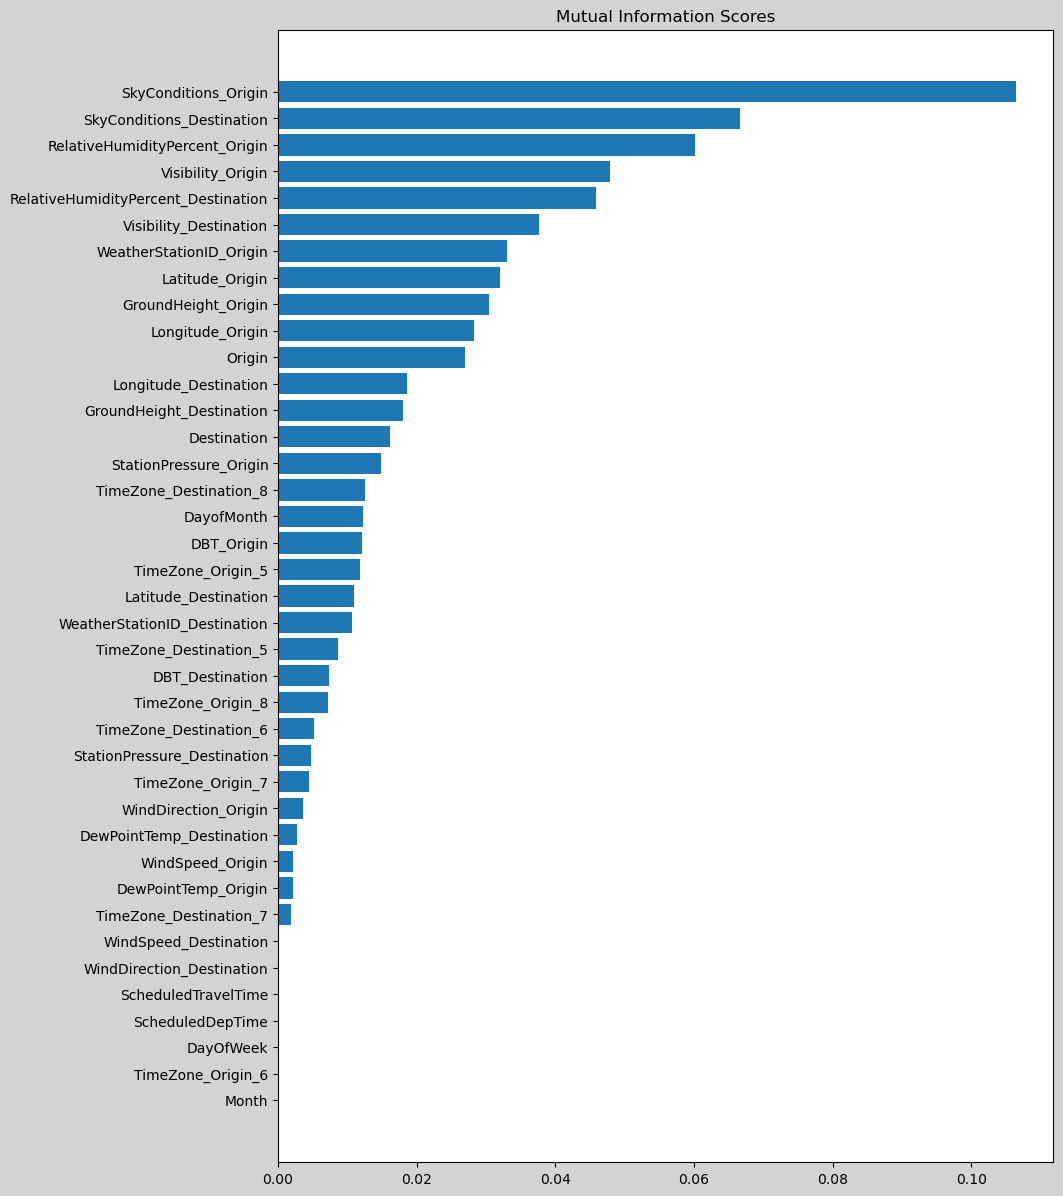

In [204]:
def fig_MI_scores(sco):
    sco = sco.sort_values(ascending=True)
    width = np.arange(len(sco))
    ticks = list(sco.index)
    
    plt.barh(width,sco, height = 0.8)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100, facecolor='lightgray', figsize=(10,15))
fig_MI_scores(mutual_info)

In [205]:
cols = mutual_info[mutual_info>0].index
len(cols)

32

In [342]:
train8 = train7[cols]
test8 = test7[cols]

In [343]:
train8.shape, y.shape, test8.shape

((7861, 32), (7861,), (6566, 32))

# train_test_split

In [344]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train8, y,test_size = 0.2, stratify = y, random_state= 1000)

In [345]:
print('Shape of X_train :',X_train.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (6288, 32)
Shape of y_train : (6288,)
Shape of X_test : (1573, 32)
Shape of y_test : (1573,)


In [346]:
X_train10 = X_train.copy()
X_test10 =  X_test.copy()
test10 = test8.copy()

In [347]:
X_train10.shape, X_test10.shape, test10.shape

((6288, 32), (1573, 32), (6566, 32))

# All metrics

In [348]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

# LogisticRegression

* The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [349]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression( penalty = 'l2', class_weight= 'balanced')

logistic.fit(X_train10, y_train)

train_pred_log = logistic.predict(X_train10)
test_pred_log = logistic.predict(X_test10)

C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [350]:
from sklearn.metrics import classification_report

print('Train classification report for LogisticRegression')
print()
print(classification_report(y_train,train_pred_log ))
print()
print('Test classification report for LogisticRegression')
print()
print(classification_report(y_test,test_pred_log ))

Train classification report for LogisticRegression

              precision    recall  f1-score   support

           1       0.46      0.77      0.58      1215
           2       0.94      0.78      0.85      5073

    accuracy                           0.78      6288
   macro avg       0.70      0.78      0.72      6288
weighted avg       0.84      0.78      0.80      6288


Test classification report for LogisticRegression

              precision    recall  f1-score   support

           1       0.47      0.79      0.59       304
           2       0.94      0.78      0.85      1269

    accuracy                           0.79      1573
   macro avg       0.70      0.79      0.72      1573
weighted avg       0.85      0.79      0.80      1573



In [351]:
scores = get_metrics(y_train,train_pred_log,y_test,test_pred_log,"LogisticRegression",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246


* Able to achive Averege f1-score  72%

# DecisionTreeClassifier

In [352]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=5000, criterion ='entropy',
                                ccp_alpha = 0.001, max_features = 'sqrt',random_state= 1000 )
clf_dt.fit(X_train10, y_train)

y_pred_train = clf_dt.predict(X_train10)
y_pred_test = clf_dt.predict(X_test10)

print('Train classification report for DecisionTreeClassifier')
print()
print(classification_report(y_train,y_pred_train))
print()
print('Train classification report for DecisionTreeClassifier')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for DecisionTreeClassifier

              precision    recall  f1-score   support

           1       0.70      0.55      0.61      1215
           2       0.90      0.94      0.92      5073

    accuracy                           0.87      6288
   macro avg       0.80      0.74      0.77      6288
weighted avg       0.86      0.87      0.86      6288


Train classification report for DecisionTreeClassifier

              precision    recall  f1-score   support

           1       0.64      0.44      0.52       304
           2       0.88      0.94      0.91      1269

    accuracy                           0.84      1573
   macro avg       0.76      0.69      0.71      1573
weighted avg       0.83      0.84      0.83      1573



In [353]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTreeClassifier",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684


# RandomForestClassifier

In [354]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=5000, random_state= 1000, ccp_alpha = 0.00025,max_samples = 0.9
                                ,max_depth = 6000, criterion = 'entropy', class_weight= {1 : 100, 2 : 0.8})

clf_rf.fit(X_train10, y_train)

y_pred_train = clf_rf.predict(X_train10)
y_pred_test = clf_rf.predict(X_test10)

print('Train classification report for RandomForestClassifier ')
print()
print(classification_report(y_train,y_pred_train))
print()
print('Train classification report for RandomForestClassifier')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for RandomForestClassifier 

              precision    recall  f1-score   support

           1       0.61      1.00      0.76      1215
           2       1.00      0.85      0.92      5073

    accuracy                           0.88      6288
   macro avg       0.81      0.92      0.84      6288
weighted avg       0.93      0.88      0.89      6288


Train classification report for RandomForestClassifier

              precision    recall  f1-score   support

           1       0.55      0.86      0.67       304
           2       0.96      0.83      0.89      1269

    accuracy                           0.84      1573
   macro avg       0.76      0.85      0.78      1573
weighted avg       0.88      0.84      0.85      1573



In [355]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForestClassifier",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754


# confusion_matrix

In [356]:
from sklearn.metrics import confusion_matrix
print('Train confusion matrix  for RandomForestClassifier')
print(confusion_matrix(y_train,y_pred_train))
print('Test confusion matrix  for RandomForestClassifier')
print(confusion_matrix(y_test,y_pred_test))

Train confusion matrix  for RandomForestClassifier
[[1215    0]
 [ 762 4311]]
Test confusion matrix  for RandomForestClassifier
[[ 261   43]
 [ 211 1058]]


 ## Prediction on test

In [357]:
pred_test = y_pred_test = clf_rf.predict(test10)

In [358]:
samplesub = pd.read_csv('samplesubmission.csv')
print(samplesub.shape)
samplesub.head()

(6566, 2)


,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2


In [359]:
my_submission = pd.DataFrame({'FlightNumber': samplesub.FlightNumber, 'FlightDelayStatus': pred_test })
my_submission.to_csv('submission17_RandomForest.csv', index=False)

## Submission File

In [360]:
sub = pd.read_csv('submission17_RandomForest.csv')
sub.head()

,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2


In [361]:
sub['FlightDelayStatus'].value_counts()

2    4930
1    1636
Name: FlightDelayStatus, dtype: int64

# AdaBoostClassifier

In [362]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators = 5000, learning_rate= 0.8)

adaboost.fit(X_train10, y_train)


y_pred_train = adaboost.predict(X_train10)
y_pred_test = adaboost.predict(X_test10)

print('Train classification report for KNeighborsClassifier With SMOTE ')
print()
print(classification_report(y_train,y_pred_train))
print()
print('Train classification report for KNeighborsClassifier With SMOTE')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for KNeighborsClassifier With SMOTE 

              precision    recall  f1-score   support

           1       0.81      0.67      0.74      1215
           2       0.92      0.96      0.94      5073

    accuracy                           0.91      6288
   macro avg       0.87      0.82      0.84      6288
weighted avg       0.90      0.91      0.90      6288


Train classification report for KNeighborsClassifier With SMOTE

              precision    recall  f1-score   support

           1       0.71      0.59      0.64       304
           2       0.90      0.94      0.92      1269

    accuracy                           0.87      1573
   macro avg       0.81      0.76      0.78      1573
weighted avg       0.87      0.87      0.87      1573



In [363]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"AdaBoostClassifier",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105


# GradientBoostingClassifier

In [364]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.8, max_depth = 1000, 
                                   ccp_alpha= 0.001,max_features = 'sqrt',  random_state = 1234, subsample = 0.9)
boost.fit(X_train10, y_train)


y_pred_train = boost.predict(X_train10)
y_pred_test = boost.predict(X_test10)

print('Train classification report for GradientBoostingClassifier')
print()
print(classification_report(y_train,y_pred_train))
print()
print('Train classification report for GradientBoostingClassifier')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for GradientBoostingClassifier

              precision    recall  f1-score   support

           1       0.71      0.47      0.57      1215
           2       0.88      0.95      0.92      5073

    accuracy                           0.86      6288
   macro avg       0.80      0.71      0.74      6288
weighted avg       0.85      0.86      0.85      6288


Train classification report for GradientBoostingClassifier

              precision    recall  f1-score   support

           1       0.69      0.46      0.55       304
           2       0.88      0.95      0.91      1269

    accuracy                           0.86      1573
   macro avg       0.79      0.70      0.73      1573
weighted avg       0.84      0.86      0.84      1573



In [365]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GradientBoostingClassifier",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023


In [366]:
y_train1 = y_train.replace({1:0, 2:1})
y_test1 = y_test.replace({1:0, 2:1})

# XGBClassifier

In [367]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=1000 ,learning_rate= 0.1 , random_state = 1000, reg_alpha = 0.001,
                          max_depth = 2000)
XGB_model.fit(X_train10, y_train1)

y_pred_train = XGB_model.predict(X_train10)
y_pred_test = XGB_model.predict(X_test10)

print('Train classification report for XGBClassifier With SMOTE ')
print()
print(classification_report(y_train1,y_pred_train))
print()
print('Train classification report for XGBClassifier With SMOTE')
print()
print(classification_report(y_test1,y_pred_test))

Train classification report for XGBClassifier With SMOTE 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1215
           1       1.00      1.00      1.00      5073

    accuracy                           1.00      6288
   macro avg       1.00      1.00      1.00      6288
weighted avg       1.00      1.00      1.00      6288


Train classification report for XGBClassifier With SMOTE

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       304
           1       0.90      0.95      0.93      1269

    accuracy                           0.88      1573
   macro avg       0.82      0.76      0.78      1573
weighted avg       0.87      0.88      0.87      1573



In [368]:
scores = get_metrics(y_train1,y_pred_train,y_test1,y_pred_test,"XGBClassifier",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023
5,XGBClassifier,0.999841,0.999588,0.999901,0.999745,0.876669,0.759717,0.817535,0.783149


# KNeighborsClassifier

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15 , p = 1)
knn.fit(X_train10, y_train)

y_pred_train = clf_rf.predict(X_train10)
y_pred_test = clf_rf.predict(X_test10)


print('Train classification report for KNeighborsClassifier With SMOTE ')
print()
print(classification_report(y_train,y_pred_train))
print()
print('Train classification report for KNeighborsClassifier With SMOTE')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for KNeighborsClassifier With SMOTE 

              precision    recall  f1-score   support

           1       0.61      1.00      0.76      1215
           2       1.00      0.85      0.92      5073

    accuracy                           0.88      6288
   macro avg       0.81      0.92      0.84      6288
weighted avg       0.93      0.88      0.89      6288


Train classification report for KNeighborsClassifier With SMOTE

              precision    recall  f1-score   support

           1       0.55      0.86      0.67       304
           2       0.96      0.83      0.89      1269

    accuracy                           0.84      1573
   macro avg       0.76      0.85      0.78      1573
weighted avg       0.88      0.84      0.85      1573



In [370]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"KNeighborsClassifier",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023
5,XGBClassifier,0.999841,0.999588,0.999901,0.999745,0.876669,0.759717,0.817535,0.783149
6,KNeighborsClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754


## SMOTE for oversampling imbalanced classification datasets

* A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.


* One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply **duplicating examples from the minority class** in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.


source : [Link](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [371]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train10, y_train)

In [372]:
print(X_train10.shape)
print(y_train.shape)

(6288, 32)
(6288,)


In [373]:
y_train.value_counts()

2    5073
1    1215
Name: FlightDelayStatus, dtype: int64

In [374]:
5073*2

10146

In [375]:
print(X_smote.shape)
print(y_smote.shape)

(10146, 32)
(10146,)


In [376]:
y_smote.value_counts()

2    5073
1    5073
Name: FlightDelayStatus, dtype: int64

In [377]:
y_train1 = y_train.replace({1:0, 2:1})
y_test1 = y_test.replace({1:0, 2:1})
y_smote1 = y_smote.replace({1:0, 2:1})

In [378]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators= 5000, random_state= 1000, ccp_alpha = 0.001,max_samples = 0.9, 
                                max_depth = 60000, criterion = 'gini', max_features = 'sqrt')

clf_rf.fit(X_smote, y_smote)

y_pred_train = clf_rf.predict(X_smote)
y_pred_test = clf_rf.predict(X_test10)

print('Train classification report for RandomForestClassifier With SMOTE ')
print()
print(classification_report(y_smote,y_pred_train))
print()
print('Train classification report for RandomForestClassifier With SMOTE')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for RandomForestClassifier With SMOTE 

              precision    recall  f1-score   support

           1       0.88      0.91      0.90      5073
           2       0.91      0.88      0.89      5073

    accuracy                           0.89     10146
   macro avg       0.89      0.89      0.89     10146
weighted avg       0.89      0.89      0.89     10146


Train classification report for RandomForestClassifier With SMOTE

              precision    recall  f1-score   support

           1       0.61      0.76      0.68       304
           2       0.94      0.89      0.91      1269

    accuracy                           0.86      1573
   macro avg       0.78      0.82      0.80      1573
weighted avg       0.88      0.86      0.87      1573



In [379]:
scores = get_metrics(y_smote,y_pred_train,y_test,y_pred_test,"RandomForest_SMOTE",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023
5,XGBClassifier,0.999841,0.999588,0.999901,0.999745,0.876669,0.759717,0.817535,0.783149
6,KNeighborsClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
7,RandomForest_SMOTE,0.893653,0.893653,0.894143,0.893620,0.861411,0.821552,0.776628,0.795068


# ANN

In [380]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [381]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 800, kernel_initializer = 'he_normal',activation='relu',input_dim = 32)) 

classifier.add(Dropout(0.3)) # Dropout layer

classifier.add(Dense(units = 600,  kernel_initializer = 'he_normal',activation='relu')) # second hidden layer

classifier.add(Dense(units = 700,  kernel_initializer = 'he_normal',activation='relu')) # Third hidden layer

classifier.add(Dense(units = 300,  kernel_initializer = 'he_normal',activation='relu')) # Fourth hidden layer

classifier.add(Dropout(0.3)) # Dropout layer

classifier.add(Dense(units = 200,  kernel_initializer = 'he_normal',activation='relu')) # 5th hidden layer

classifier.add(Dense(units = 100,  kernel_initializer = 'he_normal',activation='relu')) # Sixth hidden layer

classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # output layer 


# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy']) # reducing loss by optimizer 

In [382]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 800)               26400     
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 600)               480600    
                                                                 
 dense_9 (Dense)             (None, 700)               420700    
                                                                 
 dense_10 (Dense)            (None, 300)               210300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 200)              

In [383]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_smote, y_smote1,validation_split=0.33, batch_size = 200, epochs = 500)

Epoch 1/500
34/34 [==============================] - 4s 99ms/step - loss: 28.5220 - accuracy: 0.6953 - val_loss: 7.7478 - val_accuracy: 0.3873
Epoch 2/500
34/34 [==============================] - 4s 118ms/step - loss: 5.7009 - accuracy: 0.7183 - val_loss: 4.8078 - val_accuracy: 0.4010
Epoch 3/500
34/34 [==============================] - 3s 90ms/step - loss: 4.0657 - accuracy: 0.7188 - val_loss: 1.8579 - val_accuracy: 0.5151
Epoch 4/500
34/34 [==============================] - 3s 85ms/step - loss: 3.0912 - accuracy: 0.7237 - val_loss: 5.1088 - val_accuracy: 0.3049
Epoch 5/500
34/34 [==============================] - 3s 103ms/step - loss: 2.4568 - accuracy: 0.7172 - val_loss: 2.4681 - val_accuracy: 0.2935
Epoch 6/500
34/34 [==============================] - 4s 123ms/step - loss: 2.0608 - accuracy: 0.7140 - val_loss: 2.7719 - val_accuracy: 0.2986
Epoch 7/500
34/34 [==============================] - 4s 112ms/step - loss: 1.5855 - accuracy: 0.7213 - val_loss: 2.2476 - val_accuracy: 0.3270
E

In [384]:
pre_train = classifier.predict(X_smote)
pre_test = classifier.predict(X_test10)

50/50 [==============================] - 1s 12ms/step


In [385]:
pre_train = np.round(pre_train)

pre_test = np.round(pre_test)

In [386]:
print('Train classification report for ANN With SMOTE')
print()
print(classification_report(y_smote1,pre_train ))
print()
print('Train classification report for ANN With SMOTE')
print()
print(classification_report(y_test1,pre_test ))

Train classification report for ANN With SMOTE

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      5073
           1       0.98      0.67      0.79      5073

    accuracy                           0.83     10146
   macro avg       0.86      0.83      0.82     10146
weighted avg       0.86      0.83      0.82     10146


Train classification report for ANN With SMOTE

              precision    recall  f1-score   support

           0       0.40      0.94      0.56       304
           1       0.98      0.66      0.79      1269

    accuracy                           0.71      1573
   macro avg       0.69      0.80      0.67      1573
weighted avg       0.87      0.71      0.74      1573



In [387]:
scores = get_metrics(y_smote1,pre_train,y_test1,pre_test,"ANN_SMOTE",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023
5,XGBClassifier,0.999841,0.999588,0.999901,0.999745,0.876669,0.759717,0.817535,0.783149
6,KNeighborsClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
7,RandomForest_SMOTE,0.893653,0.893653,0.894143,0.893620,0.861411,0.821552,0.776628,0.795068
8,ANN_SMOTE,0.825350,0.825350,0.861790,0.820839,0.711380,0.797355,0.686780,0.671346


## Random Oversampling Imbalanced Datasets


* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.

* Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. 


* ***sampling_strategy*** : Sampling information to resample the data set.it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.


In [388]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy = 0.67, random_state = 1000) #0.67
X_train_res, y_train_res = os.fit_resample(X_train10, y_train)

In [389]:
print(X_train_res.shape)

(8471, 32)


In [390]:
y_train.value_counts()

2    5073
1    1215
Name: FlightDelayStatus, dtype: int64

In [391]:
5073*0.67

3398.9100000000003

In [392]:
y_train_res.value_counts()

2    5073
1    3398
Name: FlightDelayStatus, dtype: int64

In [393]:
y_train_res.value_counts(normalize = True)

2    0.598867
1    0.401133
Name: FlightDelayStatus, dtype: float64

In [394]:
y_train_res1 = y_train_res.replace({1:0, 2:1})

In [395]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=5000, random_state= 1000, ccp_alpha = 0.001,max_samples = 0.9
                                ,max_depth = 60000, criterion = 'entropy', max_features = 'sqrt')

clf_rf.fit(X=X_train_res, y=y_train_res)

y_pred_train = clf_rf.predict(X_train_res)
y_pred_test = clf_rf.predict(X_test10)


In [396]:
print('Train classification report for RandomForestClassifier With RandomOverSampler')
print()
print(classification_report(y_train_res,y_pred_train))
print()
print('Train classification report for RandomForestClassifier With RandomOverSampler')
print()
print(classification_report(y_test,y_pred_test))


from sklearn.metrics import confusion_matrix
print('Train confusion matrix  for RandomForestClassifier With RandomOverSampler')
print(confusion_matrix(y_train_res,y_pred_train))
print('Test confusion matrix  for RandomForestClassifier With RandomOverSampler')
print(confusion_matrix(y_test,y_pred_test))

Train classification report for RandomForestClassifier With RandomOverSampler

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      3398
           2       0.99      0.97      0.98      5073

    accuracy                           0.98      8471
   macro avg       0.97      0.98      0.97      8471
weighted avg       0.98      0.98      0.98      8471


Train classification report for RandomForestClassifier With RandomOverSampler

              precision    recall  f1-score   support

           1       0.68      0.70      0.69       304
           2       0.93      0.92      0.92      1269

    accuracy                           0.88      1573
   macro avg       0.80      0.81      0.81      1573
weighted avg       0.88      0.88      0.88      1573

Train confusion matrix  for RandomForestClassifier With RandomOverSampler
[[3335   63]
 [ 145 4928]]
Test confusion matrix  for RandomForestClassifier With RandomOverSampler
[[ 214   90]


In [398]:
scores = get_metrics(y_train_res,y_pred_train,y_test,y_pred_test,"RandomForest_RanOverSam",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023
5,XGBClassifier,0.999841,0.999588,0.999901,0.999745,0.876669,0.759717,0.817535,0.783149
6,KNeighborsClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
7,RandomForest_SMOTE,0.893653,0.893653,0.894143,0.893620,0.861411,0.821552,0.776628,0.795068
8,ANN_SMOTE,0.825350,0.825350,0.861790,0.820839,0.711380,0.797355,0.686780,0.671346
9,RandomForest_RanOverSam,0.975446,0.976438,0.972855,0.974545,0.878576,0.812179,0.803911,0.807927


In [404]:
pred_test2 = clf_rf.predict(test10)
(pred_test2)
print(len(pred_test2[pred_test2 ==1]))
print(len(pred_test2[pred_test2==2]))

926
5640


In [405]:
samplesub = pd.read_csv('samplesubmission.csv')
print(samplesub.shape)
samplesub.head()

(6566, 2)


,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2


In [401]:
my_submission = pd.DataFrame({'FlightNumber': samplesub.FlightNumber, 'FlightDelayStatus': pred_test2 })
my_submission.to_csv('submission16_69.csv', index=False)

df = pd.read_csv('submission16_69.csv')
df.head()

,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2


In [402]:
df['FlightDelayStatus'].value_counts(), df.shape

(2    5640
 1     926
 Name: FlightDelayStatus, dtype: int64,
 (6566, 2))

In [403]:
np.linspace(start = 5000, stop = 20000, num = 5)

array([ 5000.,  8750., 12500., 16250., 20000.])

## Random Forest tuning | RandomizedSearchCV

In [269]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
randomfor = RandomForestClassifier()

# Create the param grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 5000, stop = 20000, num = 5)],
               'max_features':  ['log2', 'sqrt'],
               'max_depth':[50000,60000, 80000, 90000],
               'min_samples_split': [1,2, 3],
               'min_samples_leaf':[1, 2, 3],
               'max_samples' : [ 0.9, 0.99],
               'criterion' : ["gini", "entropy"],
               'ccp_alpha' : [0.001, 0.0001]}
print(param_grid)

{'n_estimators': [5000, 8750, 12500, 16250, 20000], 'max_features': ['log2', 'sqrt'], 'max_depth': [50000, 60000, 80000, 90000], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1, 2, 3], 'max_samples': [0.9, 0.99], 'criterion': ['gini', 'entropy'], 'ccp_alpha': [0.001, 0.0001]}


In [270]:

randomcvrf = RandomizedSearchCV(estimator = randomfor,
                             param_distributions= param_grid,
                             scoring ='f1',
                             n_iter= 30,
                             cv = 5, 
                             verbose=1)

In [271]:
randomcvrf.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\pramod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pramod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pramod\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\pramod\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pramod\anaconda3\lib\site-packa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'ccp_alpha': [0.001, 0.0001],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [50000, 60000, 80000,
                                                      90000],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_samples': [0.9, 0.99],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [5000, 8750, 12500,
                                                         16250, 20000]},
                   scoring='f1', verbose=1)

In [272]:
randomcvrf.best_params_

{'n_estimators': 8750,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_samples': 0.99,
 'max_features': 'sqrt',
 'max_depth': 90000,
 'criterion': 'gini',
 'ccp_alpha': 0.0001}

In [406]:
y_pred_train = randomcvrf.predict(X_train_res)
y_pred_test = randomcvrf.predict(X_test10)

In [407]:
print('Train classification report for RandomForestClassifier With RandomOverSampler  ')
print()
print(classification_report(y_train_res,y_pred_train))
print()
print('Train classification report for RandomForestClassifier With RandomOverSampler')
print()
print(classification_report(y_test,y_pred_test))

Train classification report for RandomForestClassifier With RandomOverSampler  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3398
           2       1.00      1.00      1.00      5073

    accuracy                           1.00      8471
   macro avg       1.00      1.00      1.00      8471
weighted avg       1.00      1.00      1.00      8471


Train classification report for RandomForestClassifier With RandomOverSampler

              precision    recall  f1-score   support

           1       0.75      0.63      0.68       304
           2       0.91      0.95      0.93      1269

    accuracy                           0.89      1573
   macro avg       0.83      0.79      0.81      1573
weighted avg       0.88      0.89      0.88      1573



In [408]:
scores = get_metrics(y_train_res,y_pred_train,y_test,y_pred_test,"RF_after_tunning",scores)
scores

C:\Users\pramod\AppData\Local\Temp/ipykernel_25800/22480847.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.782284,0.778693,0.698628,0.715817,0.785124,0.788029,0.703726,0.721246
1,DecisionTreeClassifier,0.866571,0.744552,0.797243,0.765942,0.844247,0.690844,0.758257,0.714684
2,RandomForestClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
3,AdaBoostClassifier,0.906807,0.817685,0.868800,0.839725,0.874126,0.764394,0.808381,0.783105
4,GradientBoostingClassifier,0.861005,0.712623,0.797550,0.742059,0.856325,0.704584,0.787413,0.733023
5,XGBClassifier,0.999841,0.999588,0.999901,0.999745,0.876669,0.759717,0.817535,0.783149
6,KNeighborsClassifier,0.878817,0.924897,0.807284,0.840038,0.838525,0.846140,0.756955,0.782754
7,RandomForest_SMOTE,0.893653,0.893653,0.894143,0.893620,0.861411,0.821552,0.776628,0.795068
8,ANN_SMOTE,0.825350,0.825350,0.861790,0.820839,0.711380,0.797355,0.686780,0.671346
9,RandomForest_RanOverSam,0.975446,0.976438,0.972855,0.974545,0.878576,0.812179,0.803911,0.807927


# Save the model with joblib

In [274]:
import joblib
joblib.dump(randomcvrf, 'RandomOver_tunning_joblib')

joblib_model = joblib.load('RandomOver_tunning_joblib')


array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [279]:
pred_test = randomcvrf.predict(test10)

In [277]:
pred_test = joblib_model.predict(test10)

In [280]:
print(len(pred_test[pred_test ==1]))
print(len(pred_test[pred_test==2]))

682
5884


In [282]:

my_submission = pd.DataFrame({'FlightNumber': samplesub.FlightNumber, 'FlightDelayStatus': pred_test })
my_submission.to_csv('submission17.csv', index=False)

df = pd.read_csv('submission17.csv')
df.head()

,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2


In [283]:
df['FlightDelayStatus'].value_counts()

2    5884
1     682
Name: FlightDelayStatus, dtype: int64